<a href="https://colab.research.google.com/github/GitHub-Harshita/MachineLearning/blob/main/s%26p500predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/100
117/117 [==============================] - 3s 8ms/step - loss: 5.8128e-04
Epoch 2/100
117/117 [==============================] - 1s 6ms/step - loss: 1.5050e-04
Epoch 3/100
117/117 [==============================] - 1s 4ms/step - loss: 1.4014e-04
Epoch 4/100
117/117 [==============================] - 1s 4ms/step - loss: 9.7453e-05
Epoch 5/100
117/117 [==============================] - 0s 2ms/step - loss: 1.0420e-04
Epoch 6/100
117/117 [==============================] - 0s 2ms/step - loss: 9.3148e-05
Epoch 7/100
117/117 [==============================] - 0s 2ms/step - loss: 8.0345e-05
Epoch 8/100
117/117 [==============================] - 0s 2ms/step - loss: 9.2906e-05
Epoch 9/100
117/117 [==============================] - 0s 2ms/step - loss: 7.7101e-05
Epoch 10/100
117/117 [==============================] - 0s 2ms/step - loss: 9.0559e-05
Epoch 11/100
117/117 [==============================] - 0s 2ms/step - loss: 7.5392e-05
Epoch 12/100
117/117 [==============================

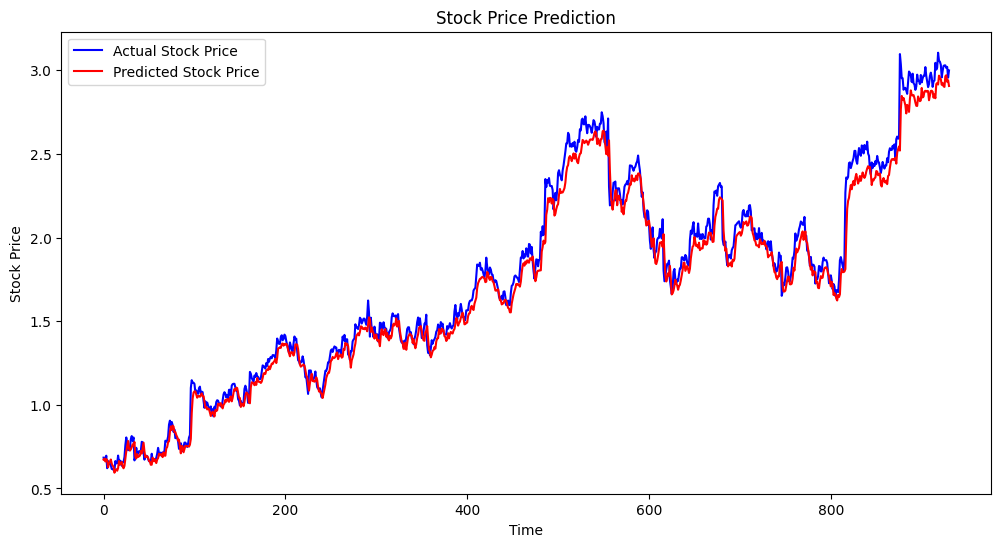

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load the data
data = pd.read_csv("s&p500filtered.csv")

# Preprocess the data
def preprocess_data(data):
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data['RETURN 1'].values.reshape(-1, 1))
    return scaled_data, scaler

# Create the dataset
def create_dataset(data, look_back=1):
    X, y = [], []
    for i in range(len(data) - look_back - 1):
        X.append(data[i:(i + look_back), 0])
        y.append(data[i + look_back, 0])
    return np.array(X), np.array(y)

# Define the model
def build_model(look_back):
    model = Sequential()
    model.add(Dense(units=64, activation='relu', input_dim=look_back))
    model.add(Dense(units=32, activation='relu'))
    model.add(Dense(units=1))

    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Train the model
def train_model(model, X_train, y_train, epochs=100, batch_size=32):
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1)

# Make predictions
def make_predictions(model, X_test):
    predictions = model.predict(X_test)
    return predictions

# Plot the results
def plot_results(actual, predicted):
    plt.figure(figsize=(12, 6))
    plt.plot(actual, color='blue', label='Actual Stock Price')
    plt.plot(predicted, color='red', label='Predicted Stock Price')
    plt.title('Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()
def main():
    # Load data
    data = pd.read_csv("s&p500filtered.csv")

    # Preprocess data
    scaled_data, scaler = preprocess_data(data)

    # Define look-back period
    look_back = 60

    # Create dataset
    X, y = create_dataset(scaled_data, look_back)

    # Split data into training and testing sets
    train_size = int(len(X) * 0.8)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    # Build model
    model = build_model(look_back)

    # Train model
    train_model(model, X_train, y_train)

    # Make predictions
    predictions = make_predictions(model, X_test)

    # Inverse scaling for predictions
    predictions = scaler.inverse_transform(predictions)

    # Inverse scaling for actual values
    actual = scaler.inverse_transform(y_test.reshape(-1, 1))
    # Calculate test loss
    test_loss = model.evaluate(X_test, y_test)
    print(f'Test Loss: {test_loss}')

    # Plot results
    plot_results(actual, predictions)

if __name__ == "__main__":
    main()


Epoch 1/100
117/117 [==============================] - 1s 2ms/step - loss: 9.4501e-04
Epoch 2/100
117/117 [==============================] - 0s 2ms/step - loss: 2.9389e-04
Epoch 3/100
117/117 [==============================] - 0s 2ms/step - loss: 2.5629e-04
Epoch 4/100
117/117 [==============================] - 0s 2ms/step - loss: 2.1417e-04
Epoch 5/100
117/117 [==============================] - 0s 2ms/step - loss: 1.9277e-04
Epoch 6/100
117/117 [==============================] - 0s 2ms/step - loss: 1.9169e-04
Epoch 7/100
117/117 [==============================] - 0s 2ms/step - loss: 1.7339e-04
Epoch 8/100
117/117 [==============================] - 0s 2ms/step - loss: 1.6202e-04
Epoch 9/100
117/117 [==============================] - 0s 2ms/step - loss: 1.6502e-04
Epoch 10/100
117/117 [==============================] - 0s 2ms/step - loss: 1.8295e-04
Epoch 11/100
117/117 [==============================] - 0s 2ms/step - loss: 1.5570e-04
Epoch 12/100
117/117 [==============================

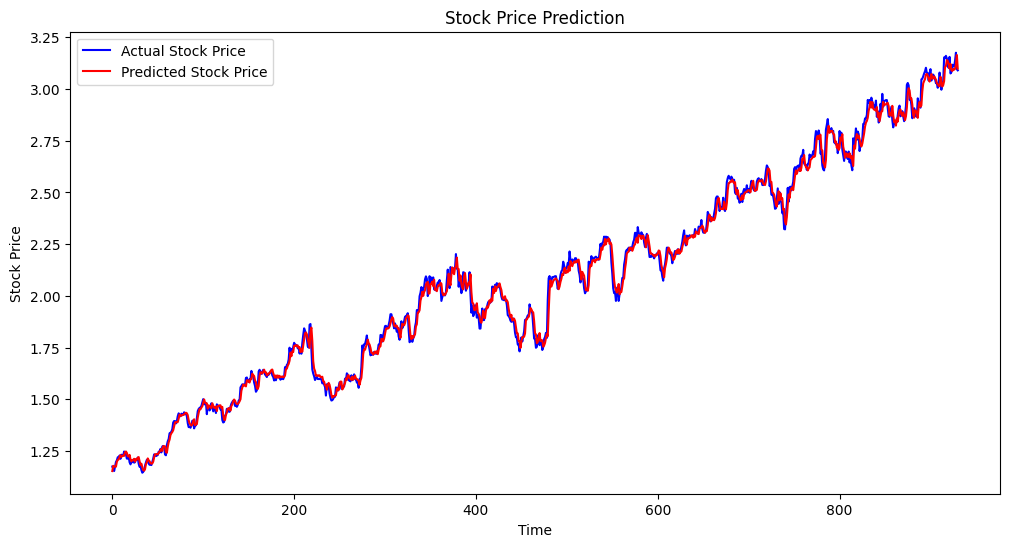

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load the data
data = pd.read_csv("s&p500filtered.csv")

# Preprocess the data
def preprocess_data(data):
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data['RETURN 2'].values.reshape(-1, 1))
    return scaled_data, scaler

# Create the dataset
def create_dataset(data, look_back=1):
    X, y = [], []
    for i in range(len(data) - look_back - 1):
        X.append(data[i:(i + look_back), 0])
        y.append(data[i + look_back, 0])
    return np.array(X), np.array(y)

# Define the model
def build_model(look_back):
    model = Sequential()
    model.add(Dense(units=64, activation='relu', input_dim=look_back))
    model.add(Dense(units=32, activation='relu'))
    model.add(Dense(units=1))

    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Train the model
def train_model(model, X_train, y_train, epochs=100, batch_size=32):
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1)

# Make predictions
def make_predictions(model, X_test):
    predictions = model.predict(X_test)
    return predictions

# Plot the results
def plot_results(actual, predicted):
    plt.figure(figsize=(12, 6))
    plt.plot(actual, color='blue', label='Actual Stock Price')
    plt.plot(predicted, color='red', label='Predicted Stock Price')
    plt.title('Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()
def main():
    # Load data
    data = pd.read_csv("s&p500filtered.csv")

    # Preprocess data
    scaled_data, scaler = preprocess_data(data)

    # Define look-back period
    look_back = 60

    # Create dataset
    X, y = create_dataset(scaled_data, look_back)

    # Split data into training and testing sets
    train_size = int(len(X) * 0.8)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    # Build model
    model = build_model(look_back)

    # Train model
    train_model(model, X_train, y_train)

    # Make predictions
    predictions = make_predictions(model, X_test)

    # Inverse scaling for predictions
    predictions = scaler.inverse_transform(predictions)

    # Inverse scaling for actual values
    actual = scaler.inverse_transform(y_test.reshape(-1, 1))
    # Calculate test loss
    test_loss = model.evaluate(X_test, y_test)
    print(f'Test Loss: {test_loss}')

    # Plot results
    plot_results(actual, predictions)

if __name__ == "__main__":
    main()


Epoch 1/100
117/117 [==============================] - 1s 2ms/step - loss: 0.0060
Epoch 2/100
117/117 [==============================] - 0s 2ms/step - loss: 4.2567e-04
Epoch 3/100
117/117 [==============================] - 0s 2ms/step - loss: 3.2742e-04
Epoch 4/100
117/117 [==============================] - 0s 2ms/step - loss: 3.5371e-04
Epoch 5/100
117/117 [==============================] - 0s 2ms/step - loss: 3.1079e-04
Epoch 6/100
117/117 [==============================] - 0s 2ms/step - loss: 2.9829e-04
Epoch 7/100
117/117 [==============================] - 0s 2ms/step - loss: 2.6938e-04
Epoch 8/100
117/117 [==============================] - 0s 2ms/step - loss: 2.7308e-04
Epoch 9/100
117/117 [==============================] - 0s 2ms/step - loss: 2.3655e-04
Epoch 10/100
117/117 [==============================] - 0s 2ms/step - loss: 2.3124e-04
Epoch 11/100
117/117 [==============================] - 0s 2ms/step - loss: 2.6996e-04
Epoch 12/100
117/117 [==============================] - 

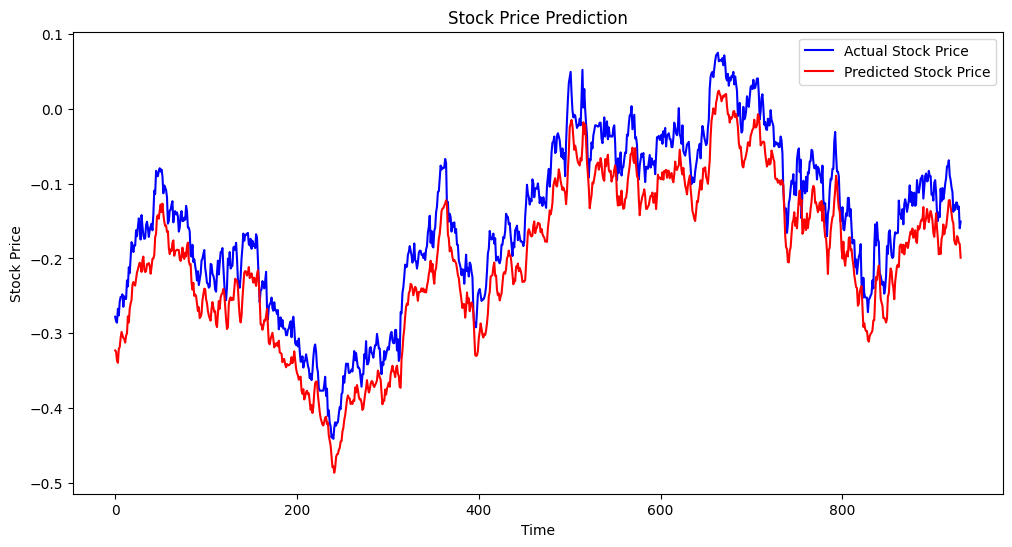

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load the data
data = pd.read_csv("s&p500filtered.csv")

# Preprocess the data
def preprocess_data(data):
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data['RETURN 3'].values.reshape(-1, 1))
    return scaled_data, scaler

# Create the dataset
def create_dataset(data, look_back=1):
    X, y = [], []
    for i in range(len(data) - look_back - 1):
        X.append(data[i:(i + look_back), 0])
        y.append(data[i + look_back, 0])
    return np.array(X), np.array(y)

# Define the model
def build_model(look_back):
    model = Sequential()
    model.add(Dense(units=64, activation='relu', input_dim=look_back))
    model.add(Dense(units=32, activation='relu'))
    model.add(Dense(units=1))

    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Train the model
def train_model(model, X_train, y_train, epochs=100, batch_size=32):
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1)

# Make predictions
def make_predictions(model, X_test):
    predictions = model.predict(X_test)
    return predictions

# Plot the results
def plot_results(actual, predicted):
    plt.figure(figsize=(12, 6))
    plt.plot(actual, color='blue', label='Actual Stock Price')
    plt.plot(predicted, color='red', label='Predicted Stock Price')
    plt.title('Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()
def main():
    # Load data
    data = pd.read_csv("s&p500filtered.csv")

    # Preprocess data
    scaled_data, scaler = preprocess_data(data)

    # Define look-back period
    look_back = 60

    # Create dataset
    X, y = create_dataset(scaled_data, look_back)

    # Split data into training and testing sets
    train_size = int(len(X) * 0.8)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    # Build model
    model = build_model(look_back)

    # Train model
    train_model(model, X_train, y_train)

    # Make predictions
    predictions = make_predictions(model, X_test)

    # Inverse scaling for predictions
    predictions = scaler.inverse_transform(predictions)

    # Inverse scaling for actual values
    actual = scaler.inverse_transform(y_test.reshape(-1, 1))
    # Calculate test loss
    test_loss = model.evaluate(X_test, y_test)
    print(f'Test Loss: {test_loss}')

    # Plot results
    plot_results(actual, predictions)

if __name__ == "__main__":
    main()


Epoch 1/100
117/117 [==============================] - 1s 2ms/step - loss: 0.0062
Epoch 2/100
117/117 [==============================] - 0s 2ms/step - loss: 6.8299e-04
Epoch 3/100
117/117 [==============================] - 0s 2ms/step - loss: 5.8832e-04
Epoch 4/100
117/117 [==============================] - 0s 2ms/step - loss: 5.2643e-04
Epoch 5/100
117/117 [==============================] - 0s 2ms/step - loss: 4.9422e-04
Epoch 6/100
117/117 [==============================] - 0s 2ms/step - loss: 4.4807e-04
Epoch 7/100
117/117 [==============================] - 0s 2ms/step - loss: 4.3642e-04
Epoch 8/100
117/117 [==============================] - 0s 2ms/step - loss: 3.7970e-04
Epoch 9/100
117/117 [==============================] - 0s 2ms/step - loss: 3.6705e-04
Epoch 10/100
117/117 [==============================] - 0s 2ms/step - loss: 3.5455e-04
Epoch 11/100
117/117 [==============================] - 0s 2ms/step - loss: 3.9317e-04
Epoch 12/100
117/117 [==============================] - 

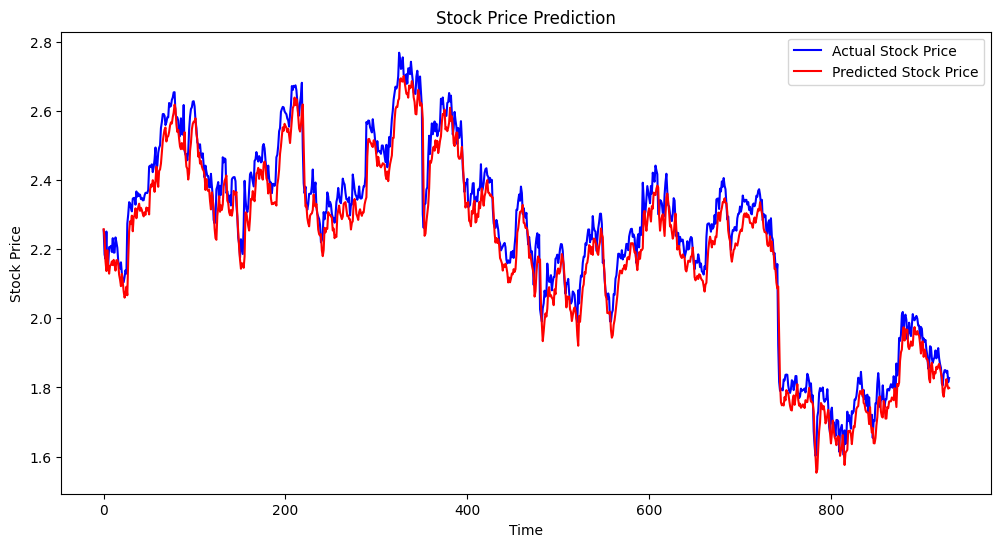

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load the data
data = pd.read_csv("s&p500filtered.csv")

# Preprocess the data
def preprocess_data(data):
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data['REURN 4'].values.reshape(-1, 1))
    return scaled_data, scaler

# Create the dataset
def create_dataset(data, look_back=1):
    X, y = [], []
    for i in range(len(data) - look_back - 1):
        X.append(data[i:(i + look_back), 0])
        y.append(data[i + look_back, 0])
    return np.array(X), np.array(y)

# Define the model
def build_model(look_back):
    model = Sequential()
    model.add(Dense(units=64, activation='relu', input_dim=look_back))
    model.add(Dense(units=32, activation='relu'))
    model.add(Dense(units=1))

    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Train the model
def train_model(model, X_train, y_train, epochs=100, batch_size=32):
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1)

# Make predictions
def make_predictions(model, X_test):
    predictions = model.predict(X_test)
    return predictions

# Plot the results
def plot_results(actual, predicted):
    plt.figure(figsize=(12, 6))
    plt.plot(actual, color='blue', label='Actual Stock Price')
    plt.plot(predicted, color='red', label='Predicted Stock Price')
    plt.title('Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()
def main():
    # Load data
    data = pd.read_csv("s&p500filtered.csv")

    # Preprocess data
    scaled_data, scaler = preprocess_data(data)

    # Define look-back period
    look_back = 60

    # Create dataset
    X, y = create_dataset(scaled_data, look_back)

    # Split data into training and testing sets
    train_size = int(len(X) * 0.8)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    # Build model
    model = build_model(look_back)

    # Train model
    train_model(model, X_train, y_train)

    # Make predictions
    predictions = make_predictions(model, X_test)

    # Inverse scaling for predictions
    predictions = scaler.inverse_transform(predictions)

    # Inverse scaling for actual values
    actual = scaler.inverse_transform(y_test.reshape(-1, 1))
    # Calculate test loss
    test_loss = model.evaluate(X_test, y_test)
    print(f'Test Loss: {test_loss}')

    # Plot results
    plot_results(actual, predictions)

if __name__ == "__main__":
    main()


Epoch 1/100
117/117 [==============================] - 1s 2ms/step - loss: 0.0033
Epoch 2/100
117/117 [==============================] - 0s 2ms/step - loss: 4.6011e-04
Epoch 3/100
117/117 [==============================] - 0s 2ms/step - loss: 3.2823e-04
Epoch 4/100
117/117 [==============================] - 0s 2ms/step - loss: 2.8013e-04
Epoch 5/100
117/117 [==============================] - 0s 3ms/step - loss: 2.3998e-04
Epoch 6/100
117/117 [==============================] - 0s 3ms/step - loss: 2.2796e-04
Epoch 7/100
117/117 [==============================] - 0s 3ms/step - loss: 2.0608e-04
Epoch 8/100
117/117 [==============================] - 0s 3ms/step - loss: 1.8661e-04
Epoch 9/100
117/117 [==============================] - 0s 4ms/step - loss: 1.7949e-04
Epoch 10/100
117/117 [==============================] - 0s 4ms/step - loss: 1.7944e-04
Epoch 11/100
117/117 [==============================] - 0s 4ms/step - loss: 1.7904e-04
Epoch 12/100
117/117 [==============================] - 

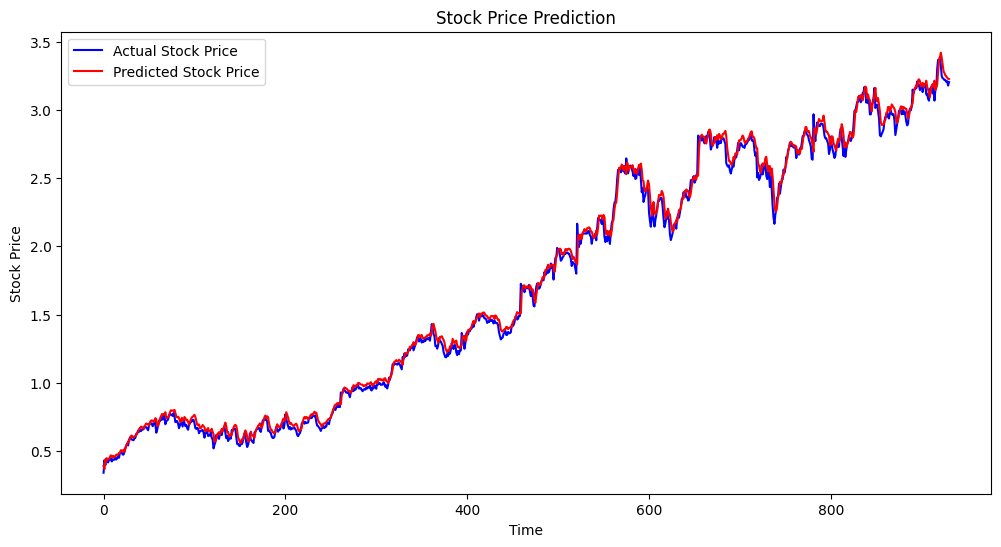

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load the data
data = pd.read_csv("s&p500filtered.csv")

# Preprocess the data
def preprocess_data(data):
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data['RETURN 5'].values.reshape(-1, 1))
    return scaled_data, scaler

# Create the dataset
def create_dataset(data, look_back=1):
    X, y = [], []
    for i in range(len(data) - look_back - 1):
        X.append(data[i:(i + look_back), 0])
        y.append(data[i + look_back, 0])
    return np.array(X), np.array(y)

# Define the model
def build_model(look_back):
    model = Sequential()
    model.add(Dense(units=64, activation='relu', input_dim=look_back))
    model.add(Dense(units=32, activation='relu'))
    model.add(Dense(units=1))

    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Train the model
def train_model(model, X_train, y_train, epochs=100, batch_size=32):
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1)

# Make predictions
def make_predictions(model, X_test):
    predictions = model.predict(X_test)
    return predictions

# Plot the results
def plot_results(actual, predicted):
    plt.figure(figsize=(12, 6))
    plt.plot(actual, color='blue', label='Actual Stock Price')
    plt.plot(predicted, color='red', label='Predicted Stock Price')
    plt.title('Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()
def main():
    # Load data
    data = pd.read_csv("s&p500filtered.csv")

    # Preprocess data
    scaled_data, scaler = preprocess_data(data)

    # Define look-back period
    look_back = 60

    # Create dataset
    X, y = create_dataset(scaled_data, look_back)

    # Split data into training and testing sets
    train_size = int(len(X) * 0.8)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    # Build model
    model = build_model(look_back)

    # Train model
    train_model(model, X_train, y_train)

    # Make predictions
    predictions = make_predictions(model, X_test)

    # Inverse scaling for predictions
    predictions = scaler.inverse_transform(predictions)

    # Inverse scaling for actual values
    actual = scaler.inverse_transform(y_test.reshape(-1, 1))
    # Calculate test loss
    test_loss = model.evaluate(X_test, y_test)
    print(f'Test Loss: {test_loss}')

    # Plot results
    plot_results(actual, predictions)

if __name__ == "__main__":
    main()


Epoch 1/100
117/117 [==============================] - 1s 3ms/step - loss: 0.0036
Epoch 2/100
117/117 [==============================] - 0s 2ms/step - loss: 2.0142e-04
Epoch 3/100
117/117 [==============================] - 0s 2ms/step - loss: 1.5862e-04
Epoch 4/100
117/117 [==============================] - 0s 2ms/step - loss: 1.4850e-04
Epoch 5/100
117/117 [==============================] - 0s 2ms/step - loss: 1.4294e-04
Epoch 6/100
117/117 [==============================] - 0s 3ms/step - loss: 1.3693e-04
Epoch 7/100
117/117 [==============================] - 0s 3ms/step - loss: 1.3539e-04
Epoch 8/100
117/117 [==============================] - 0s 2ms/step - loss: 1.1951e-04
Epoch 9/100
117/117 [==============================] - 0s 2ms/step - loss: 1.0934e-04
Epoch 10/100
117/117 [==============================] - 0s 2ms/step - loss: 1.3817e-04
Epoch 11/100
117/117 [==============================] - 0s 2ms/step - loss: 1.6689e-04
Epoch 12/100
117/117 [==============================] - 

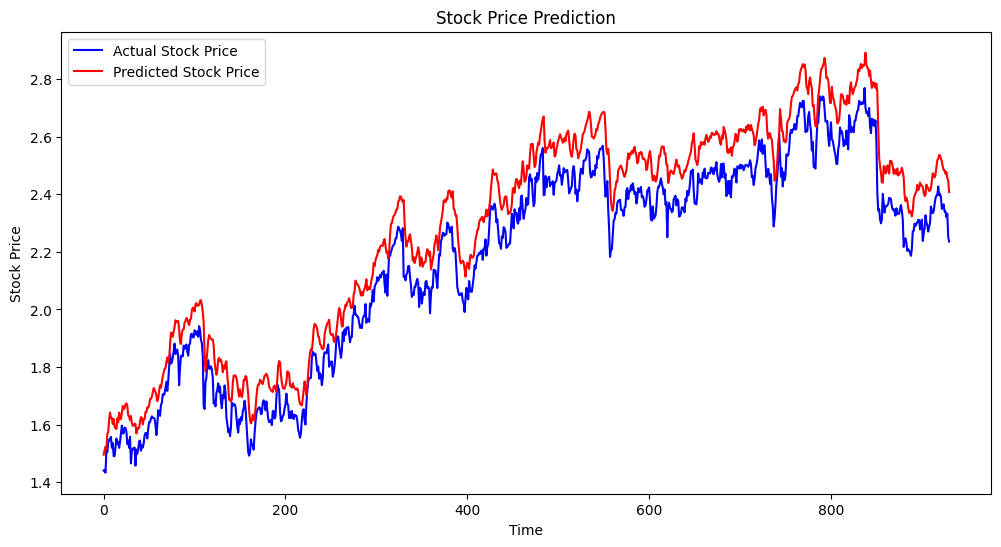

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load the data
data = pd.read_csv("s&p500filtered.csv")

# Preprocess the data
def preprocess_data(data):
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data['RETURN 6'].values.reshape(-1, 1))
    return scaled_data, scaler

# Create the dataset
def create_dataset(data, look_back=1):
    X, y = [], []
    for i in range(len(data) - look_back - 1):
        X.append(data[i:(i + look_back), 0])
        y.append(data[i + look_back, 0])
    return np.array(X), np.array(y)

# Define the model
def build_model(look_back):
    model = Sequential()
    model.add(Dense(units=64, activation='relu', input_dim=look_back))
    model.add(Dense(units=32, activation='relu'))
    model.add(Dense(units=1))

    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Train the model
def train_model(model, X_train, y_train, epochs=100, batch_size=32):
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1)

# Make predictions
def make_predictions(model, X_test):
    predictions = model.predict(X_test)
    return predictions

# Plot the results
def plot_results(actual, predicted):
    plt.figure(figsize=(12, 6))
    plt.plot(actual, color='blue', label='Actual Stock Price')
    plt.plot(predicted, color='red', label='Predicted Stock Price')
    plt.title('Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()
def main():
    # Load data
    data = pd.read_csv("s&p500filtered.csv")

    # Preprocess data
    scaled_data, scaler = preprocess_data(data)

    # Define look-back period
    look_back = 60

    # Create dataset
    X, y = create_dataset(scaled_data, look_back)

    # Split data into training and testing sets
    train_size = int(len(X) * 0.8)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    # Build model
    model = build_model(look_back)

    # Train model
    train_model(model, X_train, y_train)

    # Make predictions
    predictions = make_predictions(model, X_test)

    # Inverse scaling for predictions
    predictions = scaler.inverse_transform(predictions)

    # Inverse scaling for actual values
    actual = scaler.inverse_transform(y_test.reshape(-1, 1))
    # Calculate test loss
    test_loss = model.evaluate(X_test, y_test)
    print(f'Test Loss: {test_loss}')

    # Plot results
    plot_results(actual, predictions)

if __name__ == "__main__":
    main()


Epoch 1/100
117/117 [==============================] - 1s 2ms/step - loss: 0.0014
Epoch 2/100
117/117 [==============================] - 0s 2ms/step - loss: 3.1945e-04
Epoch 3/100
117/117 [==============================] - 0s 2ms/step - loss: 2.9140e-04
Epoch 4/100
117/117 [==============================] - 0s 2ms/step - loss: 2.4053e-04
Epoch 5/100
117/117 [==============================] - 0s 2ms/step - loss: 2.4953e-04
Epoch 6/100
117/117 [==============================] - 0s 2ms/step - loss: 2.2499e-04
Epoch 7/100
117/117 [==============================] - 0s 3ms/step - loss: 2.0698e-04
Epoch 8/100
117/117 [==============================] - 0s 3ms/step - loss: 1.9634e-04
Epoch 9/100
117/117 [==============================] - 0s 3ms/step - loss: 1.9492e-04
Epoch 10/100
117/117 [==============================] - 0s 3ms/step - loss: 1.8442e-04
Epoch 11/100
117/117 [==============================] - 0s 3ms/step - loss: 2.0623e-04
Epoch 12/100
117/117 [==============================] - 

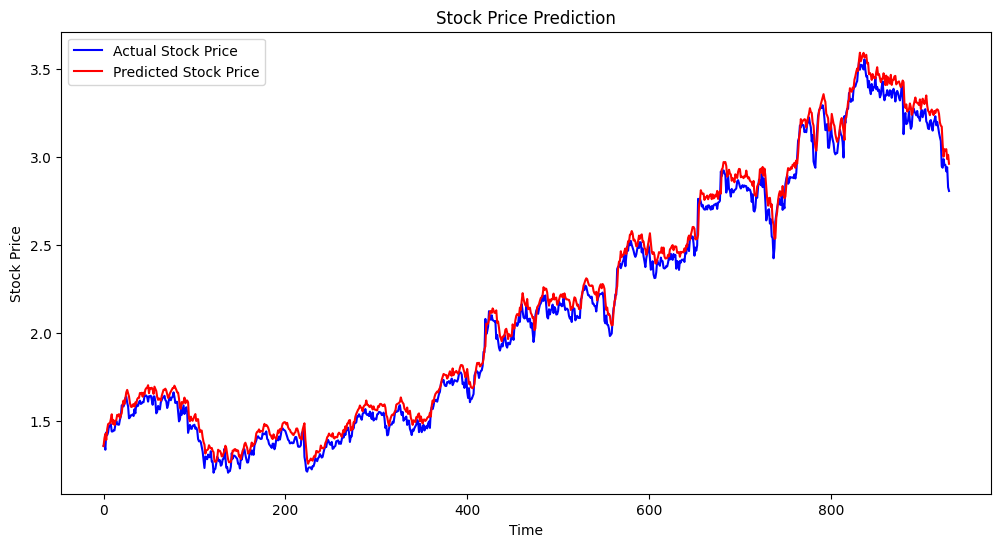

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load the data
data = pd.read_csv("s&p500filtered.csv")

# Preprocess the data
def preprocess_data(data):
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data['RETURN 7'].values.reshape(-1, 1))
    return scaled_data, scaler

# Create the dataset
def create_dataset(data, look_back=1):
    X, y = [], []
    for i in range(len(data) - look_back - 1):
        X.append(data[i:(i + look_back), 0])
        y.append(data[i + look_back, 0])
    return np.array(X), np.array(y)

# Define the model
def build_model(look_back):
    model = Sequential()
    model.add(Dense(units=64, activation='relu', input_dim=look_back))
    model.add(Dense(units=32, activation='relu'))
    model.add(Dense(units=1))

    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Train the model
def train_model(model, X_train, y_train, epochs=100, batch_size=32):
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1)

# Make predictions
def make_predictions(model, X_test):
    predictions = model.predict(X_test)
    return predictions

# Plot the results
def plot_results(actual, predicted):
    plt.figure(figsize=(12, 6))
    plt.plot(actual, color='blue', label='Actual Stock Price')
    plt.plot(predicted, color='red', label='Predicted Stock Price')
    plt.title('Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()
def main():
    # Load data
    data = pd.read_csv("s&p500filtered.csv")

    # Preprocess data
    scaled_data, scaler = preprocess_data(data)

    # Define look-back period
    look_back = 60

    # Create dataset
    X, y = create_dataset(scaled_data, look_back)

    # Split data into training and testing sets
    train_size = int(len(X) * 0.8)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    # Build model
    model = build_model(look_back)

    # Train model
    train_model(model, X_train, y_train)

    # Make predictions
    predictions = make_predictions(model, X_test)

    # Inverse scaling for predictions
    predictions = scaler.inverse_transform(predictions)

    # Inverse scaling for actual values
    actual = scaler.inverse_transform(y_test.reshape(-1, 1))
    # Calculate test loss
    test_loss = model.evaluate(X_test, y_test)
    print(f'Test Loss: {test_loss}')

    # Plot results
    plot_results(actual, predictions)

if __name__ == "__main__":
    main()


Epoch 1/100
117/117 [==============================] - 2s 4ms/step - loss: 0.0052
Epoch 2/100
117/117 [==============================] - 0s 2ms/step - loss: 8.4218e-04
Epoch 3/100
117/117 [==============================] - 0s 2ms/step - loss: 7.6293e-04
Epoch 4/100
117/117 [==============================] - 0s 2ms/step - loss: 6.4077e-04
Epoch 5/100
117/117 [==============================] - 0s 2ms/step - loss: 6.2084e-04
Epoch 6/100
117/117 [==============================] - 0s 2ms/step - loss: 5.5008e-04
Epoch 7/100
117/117 [==============================] - 0s 2ms/step - loss: 4.9899e-04
Epoch 8/100
117/117 [==============================] - 0s 2ms/step - loss: 5.0259e-04
Epoch 9/100
117/117 [==============================] - 0s 2ms/step - loss: 4.6147e-04
Epoch 10/100
117/117 [==============================] - 0s 2ms/step - loss: 4.4171e-04
Epoch 11/100
117/117 [==============================] - 0s 2ms/step - loss: 4.2617e-04
Epoch 12/100
117/117 [==============================] - 

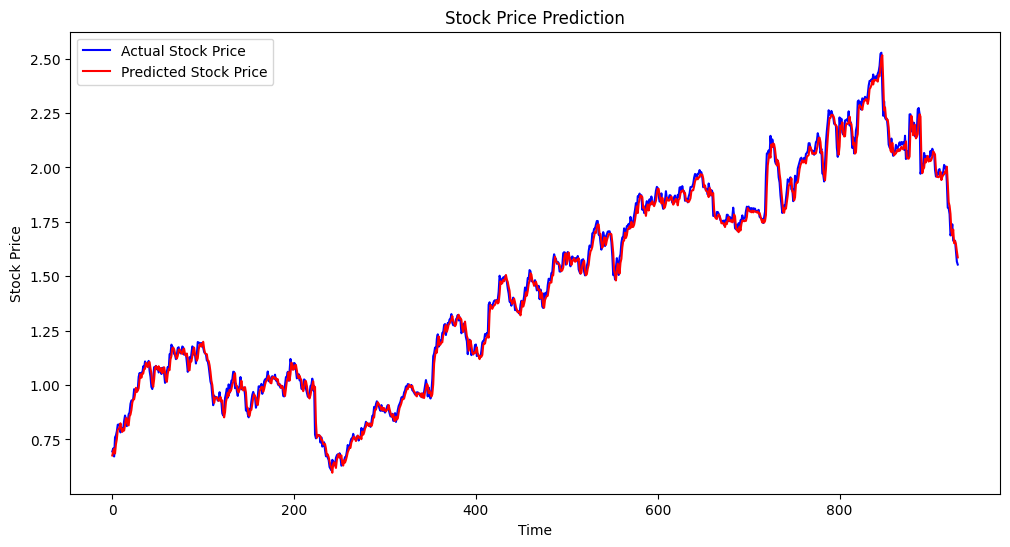

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load the data
data = pd.read_csv("s&p500filtered.csv")

# Preprocess the data
def preprocess_data(data):
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data['RETURN 8'].values.reshape(-1, 1))
    return scaled_data, scaler

# Create the dataset
def create_dataset(data, look_back=1):
    X, y = [], []
    for i in range(len(data) - look_back - 1):
        X.append(data[i:(i + look_back), 0])
        y.append(data[i + look_back, 0])
    return np.array(X), np.array(y)

# Define the model
def build_model(look_back):
    model = Sequential()
    model.add(Dense(units=64, activation='relu', input_dim=look_back))
    model.add(Dense(units=32, activation='relu'))
    model.add(Dense(units=1))

    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Train the model
def train_model(model, X_train, y_train, epochs=100, batch_size=32):
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1)

# Make predictions
def make_predictions(model, X_test):
    predictions = model.predict(X_test)
    return predictions

# Plot the results
def plot_results(actual, predicted):
    plt.figure(figsize=(12, 6))
    plt.plot(actual, color='blue', label='Actual Stock Price')
    plt.plot(predicted, color='red', label='Predicted Stock Price')
    plt.title('Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()
def main():
    # Load data
    data = pd.read_csv("s&p500filtered.csv")

    # Preprocess data
    scaled_data, scaler = preprocess_data(data)

    # Define look-back period
    look_back = 60

    # Create dataset
    X, y = create_dataset(scaled_data, look_back)

    # Split data into training and testing sets
    train_size = int(len(X) * 0.8)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    # Build model
    model = build_model(look_back)

    # Train model
    train_model(model, X_train, y_train)

    # Make predictions
    predictions = make_predictions(model, X_test)

    # Inverse scaling for predictions
    predictions = scaler.inverse_transform(predictions)

    # Inverse scaling for actual values
    actual = scaler.inverse_transform(y_test.reshape(-1, 1))
    # Calculate test loss
    test_loss = model.evaluate(X_test, y_test)
    print(f'Test Loss: {test_loss}')

    # Plot results
    plot_results(actual, predictions)

if __name__ == "__main__":
    main()


Epoch 1/100
117/117 [==============================] - 1s 2ms/step - loss: 0.0033
Epoch 2/100
117/117 [==============================] - 0s 2ms/step - loss: 5.6168e-04
Epoch 3/100
117/117 [==============================] - 0s 2ms/step - loss: 4.6977e-04
Epoch 4/100
117/117 [==============================] - 0s 2ms/step - loss: 5.7261e-04
Epoch 5/100
117/117 [==============================] - 0s 2ms/step - loss: 5.2916e-04
Epoch 6/100
117/117 [==============================] - 0s 2ms/step - loss: 4.1516e-04
Epoch 7/100
117/117 [==============================] - 0s 2ms/step - loss: 3.9011e-04
Epoch 8/100
117/117 [==============================] - 0s 2ms/step - loss: 3.4487e-04
Epoch 9/100
117/117 [==============================] - 0s 2ms/step - loss: 4.1352e-04
Epoch 10/100
117/117 [==============================] - 0s 2ms/step - loss: 3.3109e-04
Epoch 11/100
117/117 [==============================] - 0s 3ms/step - loss: 3.0554e-04
Epoch 12/100
117/117 [==============================] - 

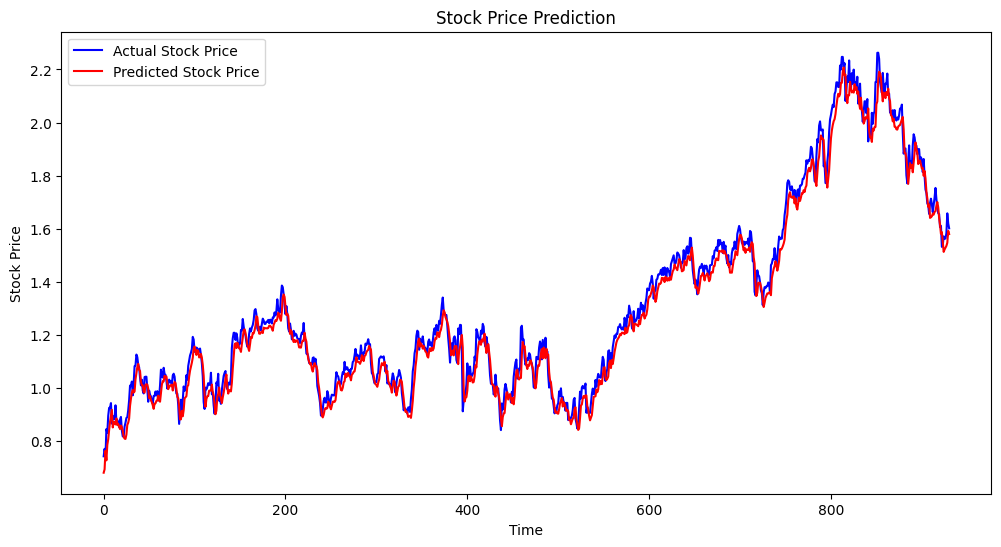

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load the data
data = pd.read_csv("s&p500filtered.csv")

# Preprocess the data
def preprocess_data(data):
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data['RETURN 9'].values.reshape(-1, 1))
    return scaled_data, scaler

# Create the dataset
def create_dataset(data, look_back=1):
    X, y = [], []
    for i in range(len(data) - look_back - 1):
        X.append(data[i:(i + look_back), 0])
        y.append(data[i + look_back, 0])
    return np.array(X), np.array(y)

# Define the model
def build_model(look_back):
    model = Sequential()
    model.add(Dense(units=64, activation='relu', input_dim=look_back))
    model.add(Dense(units=32, activation='relu'))
    model.add(Dense(units=1))

    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Train the model
def train_model(model, X_train, y_train, epochs=100, batch_size=32):
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1)

# Make predictions
def make_predictions(model, X_test):
    predictions = model.predict(X_test)
    return predictions

# Plot the results
def plot_results(actual, predicted):
    plt.figure(figsize=(12, 6))
    plt.plot(actual, color='blue', label='Actual Stock Price')
    plt.plot(predicted, color='red', label='Predicted Stock Price')
    plt.title('Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()
def main():
    # Load data
    data = pd.read_csv("s&p500filtered.csv")

    # Preprocess data
    scaled_data, scaler = preprocess_data(data)

    # Define look-back period
    look_back = 60

    # Create dataset
    X, y = create_dataset(scaled_data, look_back)

    # Split data into training and testing sets
    train_size = int(len(X) * 0.8)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    # Build model
    model = build_model(look_back)

    # Train model
    train_model(model, X_train, y_train)

    # Make predictions
    predictions = make_predictions(model, X_test)

    # Inverse scaling for predictions
    predictions = scaler.inverse_transform(predictions)

    # Inverse scaling for actual values
    actual = scaler.inverse_transform(y_test.reshape(-1, 1))
    # Calculate test loss
    test_loss = model.evaluate(X_test, y_test)
    print(f'Test Loss: {test_loss}')

    # Plot results
    plot_results(actual, predictions)

if __name__ == "__main__":
    main()


LSTM

Epoch 1/50
118/118 [==============================] - 8s 32ms/step - loss: 0.0039
Epoch 2/50
118/118 [==============================] - 5s 47ms/step - loss: 1.5502e-04
Epoch 3/50
118/118 [==============================] - 4s 34ms/step - loss: 1.6645e-04
Epoch 4/50
118/118 [==============================] - 4s 31ms/step - loss: 1.5171e-04
Epoch 5/50
118/118 [==============================] - 5s 43ms/step - loss: 1.5427e-04
Epoch 6/50
118/118 [==============================] - 4s 31ms/step - loss: 1.5785e-04
Epoch 7/50
118/118 [==============================] - 3s 22ms/step - loss: 1.4682e-04
Epoch 8/50
118/118 [==============================] - 3s 29ms/step - loss: 1.4442e-04
Epoch 9/50
118/118 [==============================] - 4s 34ms/step - loss: 1.4729e-04
Epoch 10/50
118/118 [==============================] - 4s 31ms/step - loss: 1.4876e-04
Epoch 11/50
118/118 [==============================] - 3s 25ms/step - loss: 1.4971e-04
Epoch 12/50
118/118 [==============================] - 5

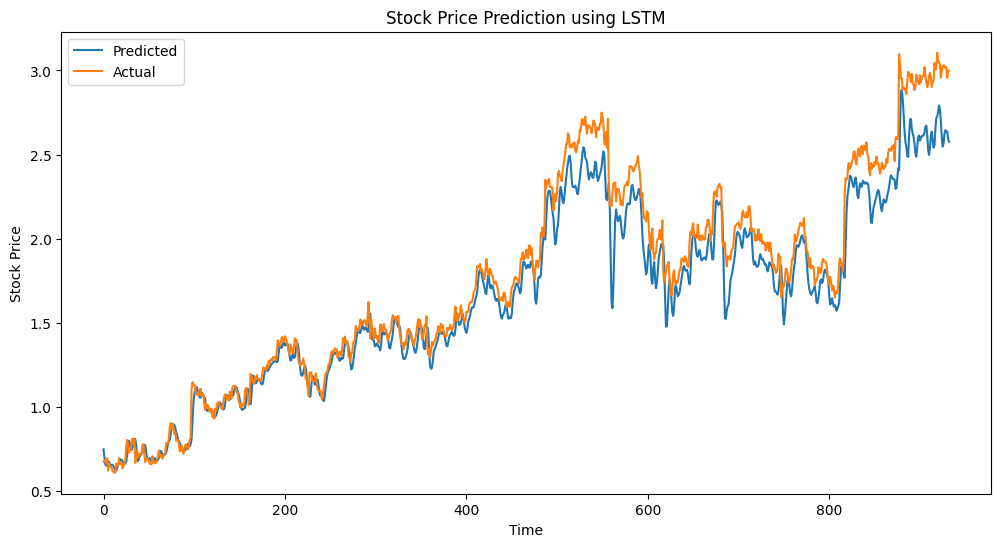

1/1 [==============================] - 0s 23ms/step
Additional Predictions:
Day 934: Predicted Price = 2.57625675201416
Day 935: Predicted Price = 2.320020914077759


In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load historical stock data
data = pd.read_csv('s&p500filtered.csv')
data = data['RETURN 1'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_normalized = scaler.fit_transform(data)

# Split the data into training and testing sets
train_size = int(len(data_normalized) * 0.8)
train_data, test_data = data_normalized[:train_size], data_normalized[train_size:]

# Create sequences for training the LSTM model
def create_sequences(data, sequence_length):
    sequences = []
    targets = []
    for i in range(len(data) - sequence_length):
        sequence = data[i:i+sequence_length]
        target = data[i+sequence_length]
        sequences.append(sequence)
        targets.append(target)
    return np.array(sequences), np.array(targets)

sequence_length = 10  # You can adjust this parameter
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)

# Build the LSTM model with LSTM output layer
model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(sequence_length, 1)))
model.add(LSTM(units=50, activation='relu', return_sequences=True))  # Second LSTM layer returns sequences
model.add(LSTM(units=1, activation=None))  # LSTM output layer directly
model.compile(optimizer='adam', loss='mean_squared_error')


# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Evaluate the model on the test data
test_loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')

# Make predictions on the test data
predictions = model.predict(X_test)

# Inverse transform the predictions to get actual stock prices
predictions_actual = scaler.inverse_transform(predictions)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(predictions_actual, label='Predicted')
plt.plot(y_test_actual, label='Actual')
plt.title('Stock Price Prediction using LSTM')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Number of additional days to predict
additional_days = 2

# Last sequence from the test data
last_sequence = X_test[-1]

# List to store the predicted values
additional_predictions = []

# Iterate to predict additional days
for _ in range(additional_days):
    # Reshape the last sequence to match model input shape
    last_sequence = last_sequence.reshape((1, sequence_length, 1))

    # Predict the next day
    next_prediction = model.predict(last_sequence)[0][0]

    # Append the prediction to the list of predictions
    additional_predictions.append(next_prediction)

    # Update the last sequence by removing the first element and appending the prediction
    last_sequence = np.roll(last_sequence, -1, axis=1)
    last_sequence[-1][-1] = next_prediction

# Inverse transform the additional predictions to get actual stock prices
additional_predictions_actual = scaler.inverse_transform(np.array(additional_predictions).reshape(-1, 1))

# Print the additional predictions
print("Additional Predictions:")
for i, pred in enumerate(additional_predictions_actual, 1):
    print(f"Day {len(predictions_actual) + i}: Predicted Price = {pred[0]}")


Epoch 1/50
118/118 [==============================] - 7s 28ms/step - loss: 0.0091
Epoch 2/50
118/118 [==============================] - 2s 21ms/step - loss: 3.7169e-04
Epoch 3/50
118/118 [==============================] - 2s 16ms/step - loss: 3.6843e-04
Epoch 4/50
118/118 [==============================] - 2s 16ms/step - loss: 3.4896e-04
Epoch 5/50
118/118 [==============================] - 2s 16ms/step - loss: 3.3344e-04
Epoch 6/50
118/118 [==============================] - 2s 17ms/step - loss: 3.2934e-04
Epoch 7/50
118/118 [==============================] - 3s 21ms/step - loss: 2.9893e-04
Epoch 8/50
118/118 [==============================] - 2s 21ms/step - loss: 2.8224e-04
Epoch 9/50
118/118 [==============================] - 2s 16ms/step - loss: 2.7849e-04
Epoch 10/50
118/118 [==============================] - 2s 16ms/step - loss: 2.5814e-04
Epoch 11/50
118/118 [==============================] - 2s 16ms/step - loss: 2.3951e-04
Epoch 12/50
118/118 [==============================] - 2

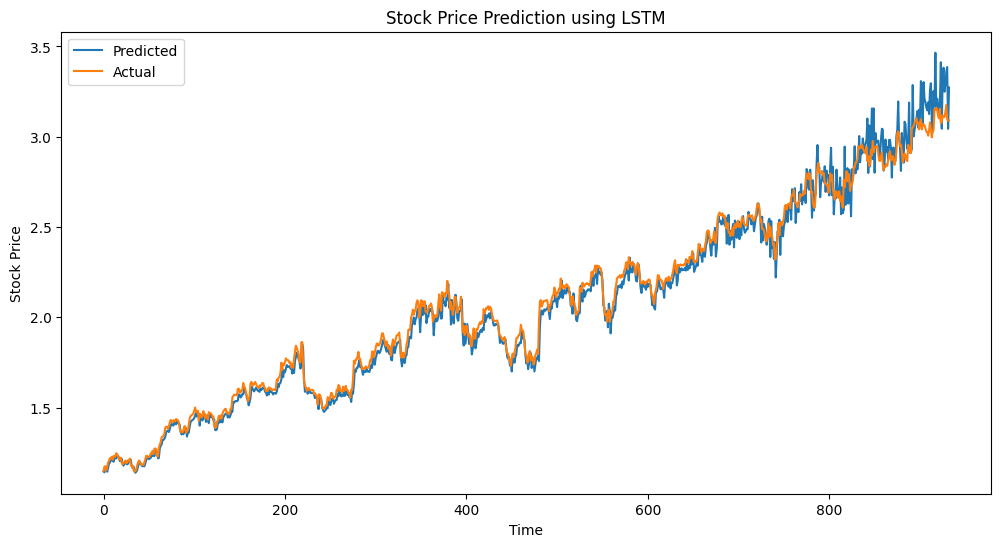

1/1 [==============================] - 0s 25ms/step
Additional Predictions:
Day 934: Predicted Price = 3.272193670272827
Day 935: Predicted Price = 3.762922763824463


In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load historical stock data
data = pd.read_csv('s&p500filtered.csv')
data = data['RETURN 2'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_normalized = scaler.fit_transform(data)

# Split the data into training and testing sets
train_size = int(len(data_normalized) * 0.8)
train_data, test_data = data_normalized[:train_size], data_normalized[train_size:]

# Create sequences for training the LSTM model
def create_sequences(data, sequence_length):
    sequences = []
    targets = []
    for i in range(len(data) - sequence_length):
        sequence = data[i:i+sequence_length]
        target = data[i+sequence_length]
        sequences.append(sequence)
        targets.append(target)
    return np.array(sequences), np.array(targets)

sequence_length = 10  # You can adjust this parameter
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)

# Build the LSTM model with LSTM output layer
model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(sequence_length, 1)))
model.add(LSTM(units=50, activation='relu', return_sequences=True))  # Second LSTM layer returns sequences
model.add(LSTM(units=1, activation=None))  # LSTM output layer directly
model.compile(optimizer='adam', loss='mean_squared_error')


# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Evaluate the model on the test data
test_loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')

# Make predictions on the test data
predictions = model.predict(X_test)

# Inverse transform the predictions to get actual stock prices
predictions_actual = scaler.inverse_transform(predictions)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(predictions_actual, label='Predicted')
plt.plot(y_test_actual, label='Actual')
plt.title('Stock Price Prediction using LSTM')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Number of additional days to predict
additional_days = 2

# Last sequence from the test data
last_sequence = X_test[-1]

# List to store the predicted values
additional_predictions = []

# Iterate to predict additional days
for _ in range(additional_days):
    # Reshape the last sequence to match model input shape
    last_sequence = last_sequence.reshape((1, sequence_length, 1))

    # Predict the next day
    next_prediction = model.predict(last_sequence)[0][0]

    # Append the prediction to the list of predictions
    additional_predictions.append(next_prediction)

    # Update the last sequence by removing the first element and appending the prediction
    last_sequence = np.roll(last_sequence, -1, axis=1)
    last_sequence[-1][-1] = next_prediction

# Inverse transform the additional predictions to get actual stock prices
additional_predictions_actual = scaler.inverse_transform(np.array(additional_predictions).reshape(-1, 1))

# Print the additional predictions
print("Additional Predictions:")
for i, pred in enumerate(additional_predictions_actual, 1):
    print(f"Day {len(predictions_actual) + i}: Predicted Price = {pred[0]}")


Epoch 1/50
118/118 [==============================] - 6s 17ms/step - loss: 0.0140
Epoch 2/50
118/118 [==============================] - 2s 21ms/step - loss: 5.8917e-04
Epoch 3/50
118/118 [==============================] - 3s 22ms/step - loss: 5.8090e-04
Epoch 4/50
118/118 [==============================] - 2s 16ms/step - loss: 5.5623e-04
Epoch 5/50
118/118 [==============================] - 2s 16ms/step - loss: 5.3699e-04
Epoch 6/50
118/118 [==============================] - 2s 16ms/step - loss: 5.3815e-04
Epoch 7/50
118/118 [==============================] - 2s 16ms/step - loss: 5.6492e-04
Epoch 8/50
118/118 [==============================] - 2s 19ms/step - loss: 4.8725e-04
Epoch 9/50
118/118 [==============================] - 3s 22ms/step - loss: 4.8330e-04
Epoch 10/50
118/118 [==============================] - 2s 16ms/step - loss: 4.7806e-04
Epoch 11/50
118/118 [==============================] - 2s 15ms/step - loss: 4.8082e-04
Epoch 12/50
118/118 [==============================] - 2

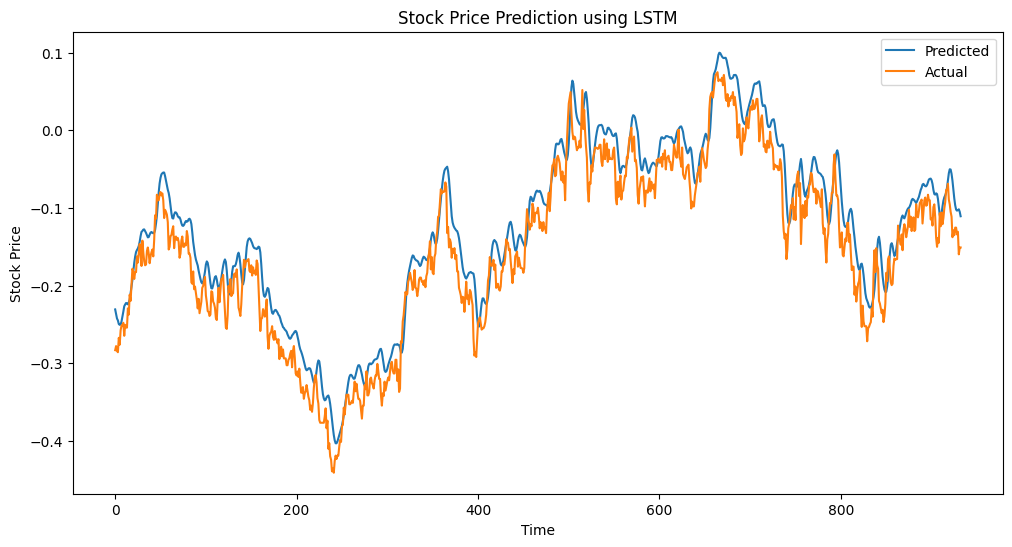

1/1 [==============================] - 0s 26ms/step
Additional Predictions:
Day 934: Predicted Price = -0.11064740270376205
Day 935: Predicted Price = -0.11199134588241577


In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load historical stock data
data = pd.read_csv('s&p500filtered.csv')
data = data['RETURN 3'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_normalized = scaler.fit_transform(data)

# Split the data into training and testing sets
train_size = int(len(data_normalized) * 0.8)
train_data, test_data = data_normalized[:train_size], data_normalized[train_size:]

# Create sequences for training the LSTM model
def create_sequences(data, sequence_length):
    sequences = []
    targets = []
    for i in range(len(data) - sequence_length):
        sequence = data[i:i+sequence_length]
        target = data[i+sequence_length]
        sequences.append(sequence)
        targets.append(target)
    return np.array(sequences), np.array(targets)

sequence_length = 10  # You can adjust this parameter
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)

# Build the LSTM model with LSTM output layer
model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(sequence_length, 1)))
model.add(LSTM(units=50, activation='relu', return_sequences=True))  # Second LSTM layer returns sequences
model.add(LSTM(units=1, activation=None))  # LSTM output layer directly
model.compile(optimizer='adam', loss='mean_squared_error')


# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Evaluate the model on the test data
test_loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')

# Make predictions on the test data
predictions = model.predict(X_test)

# Inverse transform the predictions to get actual stock prices
predictions_actual = scaler.inverse_transform(predictions)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(predictions_actual, label='Predicted')
plt.plot(y_test_actual, label='Actual')
plt.title('Stock Price Prediction using LSTM')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Number of additional days to predict
additional_days = 2

# Last sequence from the test data
last_sequence = X_test[-1]

# List to store the predicted values
additional_predictions = []

# Iterate to predict additional days
for _ in range(additional_days):
    # Reshape the last sequence to match model input shape
    last_sequence = last_sequence.reshape((1, sequence_length, 1))

    # Predict the next day
    next_prediction = model.predict(last_sequence)[0][0]

    # Append the prediction to the list of predictions
    additional_predictions.append(next_prediction)

    # Update the last sequence by removing the first element and appending the prediction
    last_sequence = np.roll(last_sequence, -1, axis=1)
    last_sequence[-1][-1] = next_prediction

# Inverse transform the additional predictions to get actual stock prices
additional_predictions_actual = scaler.inverse_transform(np.array(additional_predictions).reshape(-1, 1))

# Print the additional predictions
print("Additional Predictions:")
for i, pred in enumerate(additional_predictions_actual, 1):
    print(f"Day {len(predictions_actual) + i}: Predicted Price = {pred[0]}")


Epoch 1/50
118/118 [==============================] - 8s 21ms/step - loss: 0.0216
Epoch 2/50
118/118 [==============================] - 2s 17ms/step - loss: 6.6574e-04
Epoch 3/50
118/118 [==============================] - 3s 22ms/step - loss: 6.3968e-04
Epoch 4/50
118/118 [==============================] - 2s 19ms/step - loss: 6.4852e-04
Epoch 5/50
118/118 [==============================] - 2s 15ms/step - loss: 6.1573e-04
Epoch 6/50
118/118 [==============================] - 2s 17ms/step - loss: 5.8988e-04
Epoch 7/50
118/118 [==============================] - 2s 15ms/step - loss: 6.3899e-04
Epoch 8/50
118/118 [==============================] - 2s 15ms/step - loss: 5.5906e-04
Epoch 9/50
118/118 [==============================] - 2s 18ms/step - loss: 5.2486e-04
Epoch 10/50
118/118 [==============================] - 3s 24ms/step - loss: 5.5087e-04
Epoch 11/50
118/118 [==============================] - 2s 17ms/step - loss: 4.8101e-04
Epoch 12/50
118/118 [==============================] - 2

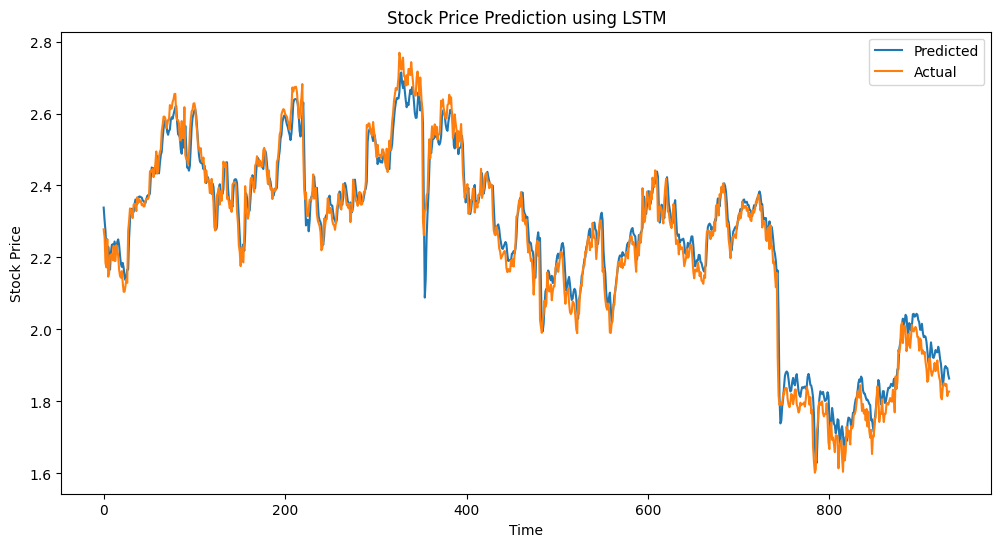

1/1 [==============================] - 0s 25ms/step
Additional Predictions:
Day 934: Predicted Price = 1.863634705543518
Day 935: Predicted Price = 1.892102599143982


In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load historical stock data
data = pd.read_csv('s&p500filtered.csv')
data = data['REURN 4'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_normalized = scaler.fit_transform(data)

# Split the data into training and testing sets
train_size = int(len(data_normalized) * 0.8)
train_data, test_data = data_normalized[:train_size], data_normalized[train_size:]

# Create sequences for training the LSTM model
def create_sequences(data, sequence_length):
    sequences = []
    targets = []
    for i in range(len(data) - sequence_length):
        sequence = data[i:i+sequence_length]
        target = data[i+sequence_length]
        sequences.append(sequence)
        targets.append(target)
    return np.array(sequences), np.array(targets)

sequence_length = 10  # You can adjust this parameter
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)

# Build the LSTM model with LSTM output layer
model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(sequence_length, 1)))
model.add(LSTM(units=50, activation='relu', return_sequences=True))  # Second LSTM layer returns sequences
model.add(LSTM(units=1, activation=None))  # LSTM output layer directly
model.compile(optimizer='adam', loss='mean_squared_error')


# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Evaluate the model on the test data
test_loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')

# Make predictions on the test data
predictions = model.predict(X_test)

# Inverse transform the predictions to get actual stock prices
predictions_actual = scaler.inverse_transform(predictions)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(predictions_actual, label='Predicted')
plt.plot(y_test_actual, label='Actual')
plt.title('Stock Price Prediction using LSTM')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Number of additional days to predict
additional_days = 2

# Last sequence from the test data
last_sequence = X_test[-1]

# List to store the predicted values
additional_predictions = []

# Iterate to predict additional days
for _ in range(additional_days):
    # Reshape the last sequence to match model input shape
    last_sequence = last_sequence.reshape((1, sequence_length, 1))

    # Predict the next day
    next_prediction = model.predict(last_sequence)[0][0]

    # Append the prediction to the list of predictions
    additional_predictions.append(next_prediction)

    # Update the last sequence by removing the first element and appending the prediction
    last_sequence = np.roll(last_sequence, -1, axis=1)
    last_sequence[-1][-1] = next_prediction

# Inverse transform the additional predictions to get actual stock prices
additional_predictions_actual = scaler.inverse_transform(np.array(additional_predictions).reshape(-1, 1))

# Print the additional predictions
print("Additional Predictions:")
for i, pred in enumerate(additional_predictions_actual, 1):
    print(f"Day {len(predictions_actual) + i}: Predicted Price = {pred[0]}")


Epoch 1/50
118/118 [==============================] - 6s 17ms/step - loss: 0.0099
Epoch 2/50
118/118 [==============================] - 2s 16ms/step - loss: 3.9738e-04
Epoch 3/50
118/118 [==============================] - 2s 17ms/step - loss: 4.0601e-04
Epoch 4/50
118/118 [==============================] - 3s 26ms/step - loss: 3.8374e-04
Epoch 5/50
118/118 [==============================] - 2s 16ms/step - loss: 3.8249e-04
Epoch 6/50
118/118 [==============================] - 2s 16ms/step - loss: 3.7556e-04
Epoch 7/50
118/118 [==============================] - 2s 15ms/step - loss: 3.6473e-04
Epoch 8/50
118/118 [==============================] - 2s 16ms/step - loss: 3.5377e-04
Epoch 9/50
118/118 [==============================] - 2s 15ms/step - loss: 3.5731e-04
Epoch 10/50
118/118 [==============================] - 3s 25ms/step - loss: 3.1784e-04
Epoch 11/50
118/118 [==============================] - 2s 19ms/step - loss: 3.1947e-04
Epoch 12/50
118/118 [==============================] - 2

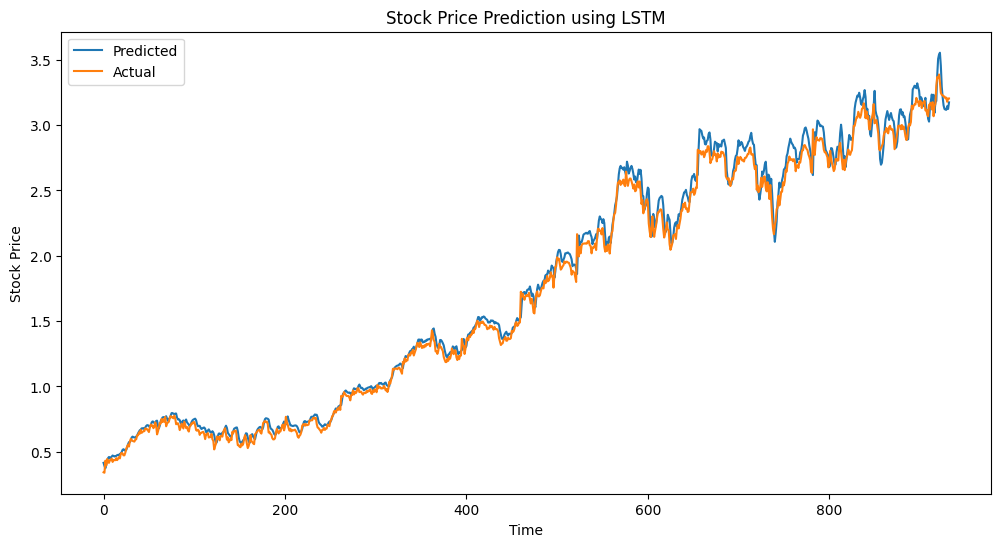

1/1 [==============================] - 0s 29ms/step
Additional Predictions:
Day 934: Predicted Price = 3.1741983890533447
Day 935: Predicted Price = 3.1504323482513428


In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load historical stock data
data = pd.read_csv('s&p500filtered.csv')
data = data['RETURN 5'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_normalized = scaler.fit_transform(data)

# Split the data into training and testing sets
train_size = int(len(data_normalized) * 0.8)
train_data, test_data = data_normalized[:train_size], data_normalized[train_size:]

# Create sequences for training the LSTM model
def create_sequences(data, sequence_length):
    sequences = []
    targets = []
    for i in range(len(data) - sequence_length):
        sequence = data[i:i+sequence_length]
        target = data[i+sequence_length]
        sequences.append(sequence)
        targets.append(target)
    return np.array(sequences), np.array(targets)

sequence_length = 10  # You can adjust this parameter
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)

# Build the LSTM model with LSTM output layer
model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(sequence_length, 1)))
model.add(LSTM(units=50, activation='relu', return_sequences=True))  # Second LSTM layer returns sequences
model.add(LSTM(units=1, activation=None))  # LSTM output layer directly
model.compile(optimizer='adam', loss='mean_squared_error')


# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Evaluate the model on the test data
test_loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')

# Make predictions on the test data
predictions = model.predict(X_test)

# Inverse transform the predictions to get actual stock prices
predictions_actual = scaler.inverse_transform(predictions)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(predictions_actual, label='Predicted')
plt.plot(y_test_actual, label='Actual')
plt.title('Stock Price Prediction using LSTM')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Number of additional days to predict
additional_days = 2

# Last sequence from the test data
last_sequence = X_test[-1]

# List to store the predicted values
additional_predictions = []

# Iterate to predict additional days
for _ in range(additional_days):
    # Reshape the last sequence to match model input shape
    last_sequence = last_sequence.reshape((1, sequence_length, 1))

    # Predict the next day
    next_prediction = model.predict(last_sequence)[0][0]

    # Append the prediction to the list of predictions
    additional_predictions.append(next_prediction)

    # Update the last sequence by removing the first element and appending the prediction
    last_sequence = np.roll(last_sequence, -1, axis=1)
    last_sequence[-1][-1] = next_prediction

# Inverse transform the additional predictions to get actual stock prices
additional_predictions_actual = scaler.inverse_transform(np.array(additional_predictions).reshape(-1, 1))

# Print the additional predictions
print("Additional Predictions:")
for i, pred in enumerate(additional_predictions_actual, 1):
    print(f"Day {len(predictions_actual) + i}: Predicted Price = {pred[0]}")


Epoch 1/50
118/118 [==============================] - 7s 19ms/step - loss: 0.0133
Epoch 2/50
118/118 [==============================] - 2s 15ms/step - loss: 2.0207e-04
Epoch 3/50
118/118 [==============================] - 2s 15ms/step - loss: 2.0017e-04
Epoch 4/50
118/118 [==============================] - 2s 15ms/step - loss: 1.9640e-04
Epoch 5/50
118/118 [==============================] - 2s 17ms/step - loss: 1.9042e-04
Epoch 6/50
118/118 [==============================] - 3s 21ms/step - loss: 1.9366e-04
Epoch 7/50
118/118 [==============================] - 2s 15ms/step - loss: 1.9009e-04
Epoch 8/50
118/118 [==============================] - 2s 20ms/step - loss: 1.8810e-04
Epoch 9/50
118/118 [==============================] - 2s 21ms/step - loss: 1.8749e-04
Epoch 10/50
118/118 [==============================] - 2s 17ms/step - loss: 1.9076e-04
Epoch 11/50
118/118 [==============================] - 2s 18ms/step - loss: 1.9275e-04
Epoch 12/50
118/118 [==============================] - 3

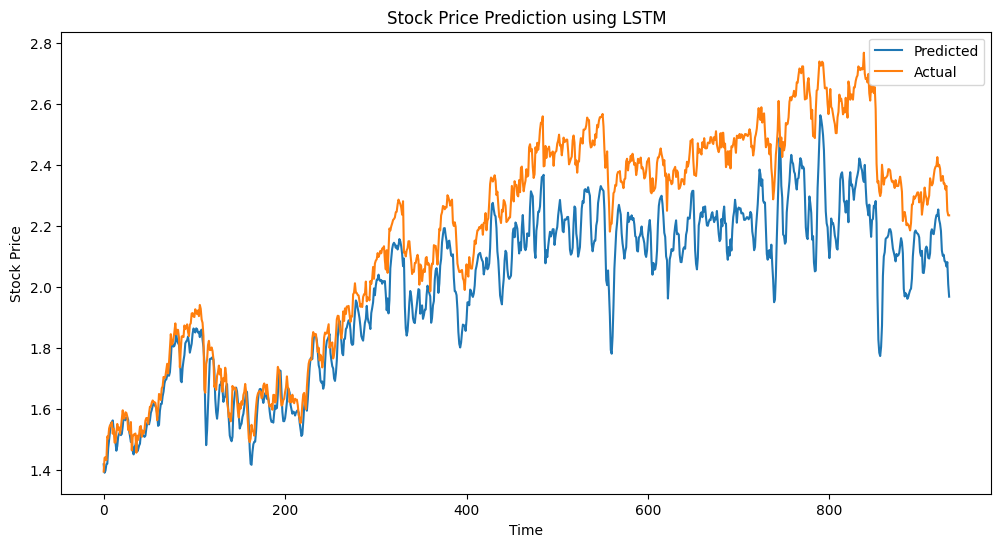

1/1 [==============================] - 0s 22ms/step
Additional Predictions:
Day 934: Predicted Price = 1.969265103340149
Day 935: Predicted Price = 1.7039517164230347


In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load historical stock data
data = pd.read_csv('s&p500filtered.csv')
data = data['RETURN 6'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_normalized = scaler.fit_transform(data)

# Split the data into training and testing sets
train_size = int(len(data_normalized) * 0.8)
train_data, test_data = data_normalized[:train_size], data_normalized[train_size:]

# Create sequences for training the LSTM model
def create_sequences(data, sequence_length):
    sequences = []
    targets = []
    for i in range(len(data) - sequence_length):
        sequence = data[i:i+sequence_length]
        target = data[i+sequence_length]
        sequences.append(sequence)
        targets.append(target)
    return np.array(sequences), np.array(targets)

sequence_length = 10  # You can adjust this parameter
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)

# Build the LSTM model with LSTM output layer
model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(sequence_length, 1)))
model.add(LSTM(units=50, activation='relu', return_sequences=True))  # Second LSTM layer returns sequences
model.add(LSTM(units=1, activation=None))  # LSTM output layer directly
model.compile(optimizer='adam', loss='mean_squared_error')


# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Evaluate the model on the test data
test_loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')

# Make predictions on the test data
predictions = model.predict(X_test)

# Inverse transform the predictions to get actual stock prices
predictions_actual = scaler.inverse_transform(predictions)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(predictions_actual, label='Predicted')
plt.plot(y_test_actual, label='Actual')
plt.title('Stock Price Prediction using LSTM')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Number of additional days to predict
additional_days = 2

# Last sequence from the test data
last_sequence = X_test[-1]

# List to store the predicted values
additional_predictions = []

# Iterate to predict additional days
for _ in range(additional_days):
    # Reshape the last sequence to match model input shape
    last_sequence = last_sequence.reshape((1, sequence_length, 1))

    # Predict the next day
    next_prediction = model.predict(last_sequence)[0][0]

    # Append the prediction to the list of predictions
    additional_predictions.append(next_prediction)

    # Update the last sequence by removing the first element and appending the prediction
    last_sequence = np.roll(last_sequence, -1, axis=1)
    last_sequence[-1][-1] = next_prediction

# Inverse transform the additional predictions to get actual stock prices
additional_predictions_actual = scaler.inverse_transform(np.array(additional_predictions).reshape(-1, 1))

# Print the additional predictions
print("Additional Predictions:")
for i, pred in enumerate(additional_predictions_actual, 1):
    print(f"Day {len(predictions_actual) + i}: Predicted Price = {pred[0]}")


Epoch 1/50
118/118 [==============================] - 7s 23ms/step - loss: 0.0120
Epoch 2/50
118/118 [==============================] - 2s 16ms/step - loss: 4.3709e-04
Epoch 3/50
118/118 [==============================] - 2s 18ms/step - loss: 3.2660e-04
Epoch 4/50
118/118 [==============================] - 2s 17ms/step - loss: 3.0684e-04
Epoch 5/50
118/118 [==============================] - 2s 16ms/step - loss: 3.1655e-04
Epoch 6/50
118/118 [==============================] - 2s 19ms/step - loss: 3.0416e-04
Epoch 7/50
118/118 [==============================] - 3s 21ms/step - loss: 3.0062e-04
Epoch 8/50
118/118 [==============================] - 2s 15ms/step - loss: 2.9109e-04
Epoch 9/50
118/118 [==============================] - 2s 15ms/step - loss: 3.0344e-04
Epoch 10/50
118/118 [==============================] - 2s 15ms/step - loss: 2.8167e-04
Epoch 11/50
118/118 [==============================] - 2s 17ms/step - loss: 2.8869e-04
Epoch 12/50
118/118 [==============================] - 2

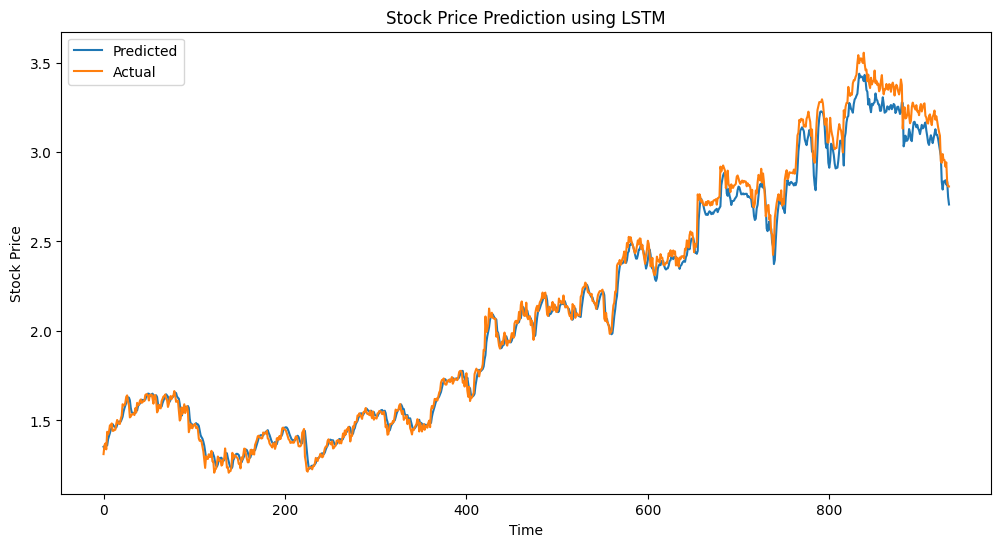

1/1 [==============================] - 0s 28ms/step
Additional Predictions:
Day 934: Predicted Price = 2.7067720890045166
Day 935: Predicted Price = 2.6106557846069336


In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load historical stock data
data = pd.read_csv('s&p500filtered.csv')
data = data['RETURN 7'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_normalized = scaler.fit_transform(data)

# Split the data into training and testing sets
train_size = int(len(data_normalized) * 0.8)
train_data, test_data = data_normalized[:train_size], data_normalized[train_size:]

# Create sequences for training the LSTM model
def create_sequences(data, sequence_length):
    sequences = []
    targets = []
    for i in range(len(data) - sequence_length):
        sequence = data[i:i+sequence_length]
        target = data[i+sequence_length]
        sequences.append(sequence)
        targets.append(target)
    return np.array(sequences), np.array(targets)

sequence_length = 10  # You can adjust this parameter
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)

# Build the LSTM model with LSTM output layer
model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(sequence_length, 1)))
model.add(LSTM(units=50, activation='relu', return_sequences=True))  # Second LSTM layer returns sequences
model.add(LSTM(units=1, activation=None))  # LSTM output layer directly
model.compile(optimizer='adam', loss='mean_squared_error')


# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Evaluate the model on the test data
test_loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')

# Make predictions on the test data
predictions = model.predict(X_test)

# Inverse transform the predictions to get actual stock prices
predictions_actual = scaler.inverse_transform(predictions)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(predictions_actual, label='Predicted')
plt.plot(y_test_actual, label='Actual')
plt.title('Stock Price Prediction using LSTM')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Number of additional days to predict
additional_days = 2

# Last sequence from the test data
last_sequence = X_test[-1]

# List to store the predicted values
additional_predictions = []

# Iterate to predict additional days
for _ in range(additional_days):
    # Reshape the last sequence to match model input shape
    last_sequence = last_sequence.reshape((1, sequence_length, 1))

    # Predict the next day
    next_prediction = model.predict(last_sequence)[0][0]

    # Append the prediction to the list of predictions
    additional_predictions.append(next_prediction)

    # Update the last sequence by removing the first element and appending the prediction
    last_sequence = np.roll(last_sequence, -1, axis=1)
    last_sequence[-1][-1] = next_prediction

# Inverse transform the additional predictions to get actual stock prices
additional_predictions_actual = scaler.inverse_transform(np.array(additional_predictions).reshape(-1, 1))

# Print the additional predictions
print("Additional Predictions:")
for i, pred in enumerate(additional_predictions_actual, 1):
    print(f"Day {len(predictions_actual) + i}: Predicted Price = {pred[0]}")


Epoch 1/50
118/118 [==============================] - 6s 16ms/step - loss: 0.0397
Epoch 2/50
118/118 [==============================] - 3s 24ms/step - loss: 9.0152e-04
Epoch 3/50
118/118 [==============================] - 2s 16ms/step - loss: 8.5161e-04
Epoch 4/50
118/118 [==============================] - 2s 16ms/step - loss: 9.1661e-04
Epoch 5/50
118/118 [==============================] - 2s 18ms/step - loss: 7.9697e-04
Epoch 6/50
118/118 [==============================] - 2s 15ms/step - loss: 7.4559e-04
Epoch 7/50
118/118 [==============================] - 2s 15ms/step - loss: 7.1994e-04
Epoch 8/50
118/118 [==============================] - 3s 21ms/step - loss: 7.2024e-04
Epoch 9/50
118/118 [==============================] - 3s 25ms/step - loss: 6.0754e-04
Epoch 10/50
118/118 [==============================] - 2s 18ms/step - loss: 5.9571e-04
Epoch 11/50
118/118 [==============================] - 2s 16ms/step - loss: 5.3607e-04
Epoch 12/50
118/118 [==============================] - 2

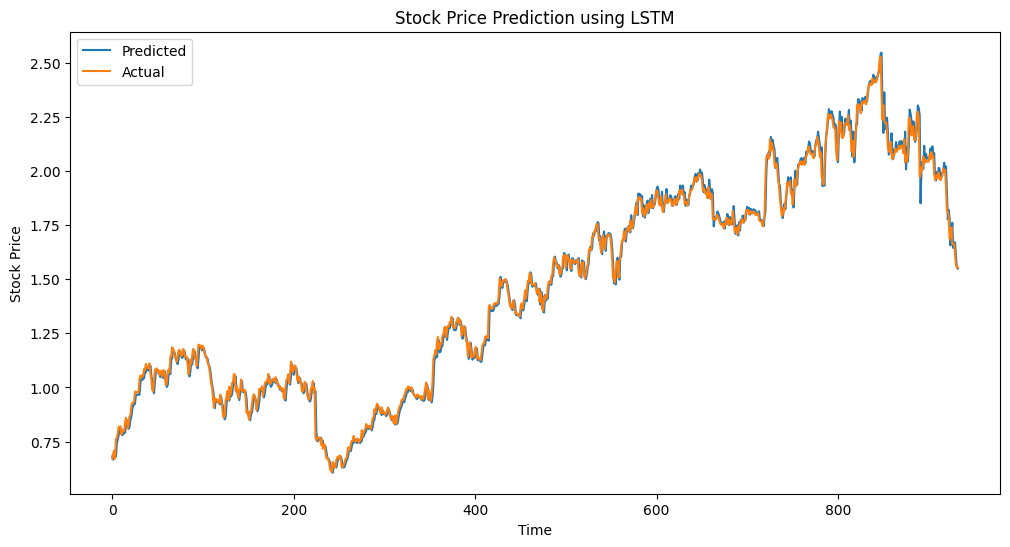

1/1 [==============================] - 0s 27ms/step
Additional Predictions:
Day 934: Predicted Price = 1.5494142770767212
Day 935: Predicted Price = 1.5469247102737427


In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load historical stock data
data = pd.read_csv('s&p500filtered.csv')
data = data['RETURN 8'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_normalized = scaler.fit_transform(data)

# Split the data into training and testing sets
train_size = int(len(data_normalized) * 0.8)
train_data, test_data = data_normalized[:train_size], data_normalized[train_size:]

# Create sequences for training the LSTM model
def create_sequences(data, sequence_length):
    sequences = []
    targets = []
    for i in range(len(data) - sequence_length):
        sequence = data[i:i+sequence_length]
        target = data[i+sequence_length]
        sequences.append(sequence)
        targets.append(target)
    return np.array(sequences), np.array(targets)

sequence_length = 10  # You can adjust this parameter
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)

# Build the LSTM model with LSTM output layer
model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(sequence_length, 1)))
model.add(LSTM(units=50, activation='relu', return_sequences=True))  # Second LSTM layer returns sequences
model.add(LSTM(units=1, activation=None))  # LSTM output layer directly
model.compile(optimizer='adam', loss='mean_squared_error')


# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Evaluate the model on the test data
test_loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')

# Make predictions on the test data
predictions = model.predict(X_test)

# Inverse transform the predictions to get actual stock prices
predictions_actual = scaler.inverse_transform(predictions)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(predictions_actual, label='Predicted')
plt.plot(y_test_actual, label='Actual')
plt.title('Stock Price Prediction using LSTM')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Number of additional days to predict
additional_days = 2

# Last sequence from the test data
last_sequence = X_test[-1]

# List to store the predicted values
additional_predictions = []

# Iterate to predict additional days
for _ in range(additional_days):
    # Reshape the last sequence to match model input shape
    last_sequence = last_sequence.reshape((1, sequence_length, 1))

    # Predict the next day
    next_prediction = model.predict(last_sequence)[0][0]

    # Append the prediction to the list of predictions
    additional_predictions.append(next_prediction)

    # Update the last sequence by removing the first element and appending the prediction
    last_sequence = np.roll(last_sequence, -1, axis=1)
    last_sequence[-1][-1] = next_prediction

# Inverse transform the additional predictions to get actual stock prices
additional_predictions_actual = scaler.inverse_transform(np.array(additional_predictions).reshape(-1, 1))

# Print the additional predictions
print("Additional Predictions:")
for i, pred in enumerate(additional_predictions_actual, 1):
    print(f"Day {len(predictions_actual) + i}: Predicted Price = {pred[0]}")


Epoch 1/50
118/118 [==============================] - 6s 16ms/step - loss: 0.0231
Epoch 2/50
118/118 [==============================] - 2s 16ms/step - loss: 4.9899e-04
Epoch 3/50
118/118 [==============================] - 3s 25ms/step - loss: 4.7550e-04
Epoch 4/50
118/118 [==============================] - 2s 18ms/step - loss: 4.2936e-04
Epoch 5/50
118/118 [==============================] - 2s 16ms/step - loss: 4.1527e-04
Epoch 6/50
118/118 [==============================] - 2s 16ms/step - loss: 4.4428e-04
Epoch 7/50
118/118 [==============================] - 2s 16ms/step - loss: 4.2091e-04
Epoch 8/50
118/118 [==============================] - 2s 15ms/step - loss: 3.6187e-04
Epoch 9/50
118/118 [==============================] - 3s 24ms/step - loss: 3.2715e-04
Epoch 10/50
118/118 [==============================] - 2s 18ms/step - loss: 3.5853e-04
Epoch 11/50
118/118 [==============================] - 2s 16ms/step - loss: 3.3502e-04
Epoch 12/50
118/118 [==============================] - 2

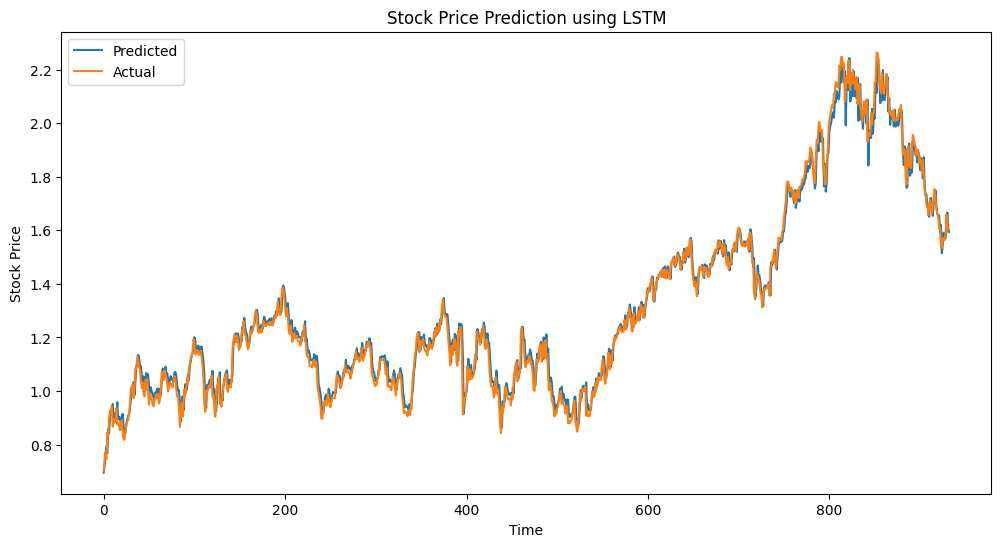

1/1 [==============================] - 0s 30ms/step
Additional Predictions:
Day 934: Predicted Price = 1.5934901237487793
Day 935: Predicted Price = 1.5886975526809692


In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load historical stock data
data = pd.read_csv('s&p500filtered.csv')
data = data['RETURN 9'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_normalized = scaler.fit_transform(data)

# Split the data into training and testing sets
train_size = int(len(data_normalized) * 0.8)
train_data, test_data = data_normalized[:train_size], data_normalized[train_size:]

# Create sequences for training the LSTM model
def create_sequences(data, sequence_length):
    sequences = []
    targets = []
    for i in range(len(data) - sequence_length):
        sequence = data[i:i+sequence_length]
        target = data[i+sequence_length]
        sequences.append(sequence)
        targets.append(target)
    return np.array(sequences), np.array(targets)

sequence_length = 10  # You can adjust this parameter
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)

# Build the LSTM model with LSTM output layer
model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(sequence_length, 1)))
model.add(LSTM(units=50, activation='relu', return_sequences=True))  # Second LSTM layer returns sequences
model.add(LSTM(units=1, activation=None))  # LSTM output layer directly
model.compile(optimizer='adam', loss='mean_squared_error')


# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Evaluate the model on the test data
test_loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')

# Make predictions on the test data
predictions = model.predict(X_test)

# Inverse transform the predictions to get actual stock prices
predictions_actual = scaler.inverse_transform(predictions)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(predictions_actual, label='Predicted')
plt.plot(y_test_actual, label='Actual')
plt.title('Stock Price Prediction using LSTM')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Number of additional days to predict
additional_days = 2

# Last sequence from the test data
last_sequence = X_test[-1]

# List to store the predicted values
additional_predictions = []

# Iterate to predict additional days
for _ in range(additional_days):
    # Reshape the last sequence to match model input shape
    last_sequence = last_sequence.reshape((1, sequence_length, 1))

    # Predict the next day
    next_prediction = model.predict(last_sequence)[0][0]

    # Append the prediction to the list of predictions
    additional_predictions.append(next_prediction)

    # Update the last sequence by removing the first element and appending the prediction
    last_sequence = np.roll(last_sequence, -1, axis=1)
    last_sequence[-1][-1] = next_prediction

# Inverse transform the additional predictions to get actual stock prices
additional_predictions_actual = scaler.inverse_transform(np.array(additional_predictions).reshape(-1, 1))

# Print the additional predictions
print("Additional Predictions:")
for i, pred in enumerate(additional_predictions_actual, 1):
    print(f"Day {len(predictions_actual) + i}: Predicted Price = {pred[0]}")


LSTM AND DNN

Epoch 1/50
118/118 [==============================] - 4s 11ms/step - loss: 0.0028
Epoch 2/50
118/118 [==============================] - 1s 12ms/step - loss: 8.9859e-05
Epoch 3/50
118/118 [==============================] - 2s 15ms/step - loss: 8.6536e-05
Epoch 4/50
118/118 [==============================] - 2s 14ms/step - loss: 8.4332e-05
Epoch 5/50
118/118 [==============================] - 2s 13ms/step - loss: 8.5503e-05
Epoch 6/50
118/118 [==============================] - 1s 13ms/step - loss: 8.7489e-05
Epoch 7/50
118/118 [==============================] - 2s 14ms/step - loss: 7.6650e-05
Epoch 8/50
118/118 [==============================] - 2s 16ms/step - loss: 7.6940e-05
Epoch 9/50
118/118 [==============================] - 2s 19ms/step - loss: 7.2321e-05
Epoch 10/50
118/118 [==============================] - 2s 16ms/step - loss: 6.9561e-05
Epoch 11/50
118/118 [==============================] - 1s 12ms/step - loss: 7.1176e-05
Epoch 12/50
118/118 [==============================] - 2

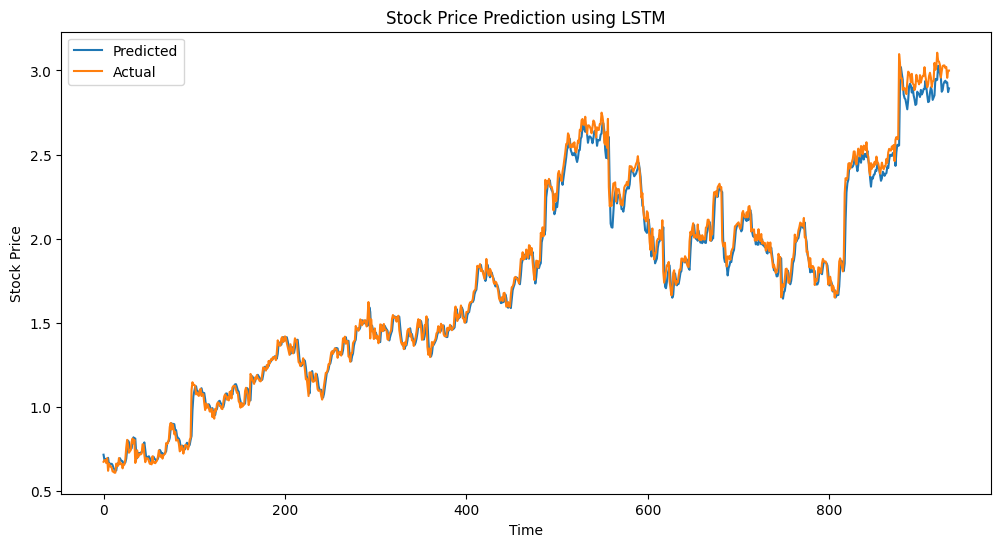

1/1 [==============================] - 0s 31ms/step
Additional Predictions:
Day 934: Predicted Price = 2.8938355445861816
Day 935: Predicted Price = 2.8071937561035156


In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load historical stock data
data = pd.read_csv('s&p500filtered.csv')
data = data['RETURN 1'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_normalized = scaler.fit_transform(data)

# Split the data into training and testing sets
train_size = int(len(data_normalized) * 0.8)
train_data, test_data = data_normalized[:train_size], data_normalized[train_size:]

# Create sequences for training the LSTM model
def create_sequences(data, sequence_length):
    sequences = []
    targets = []
    for i in range(len(data) - sequence_length):
        sequence = data[i:i+sequence_length]
        target = data[i+sequence_length]
        sequences.append(sequence)
        targets.append(target)
    return np.array(sequences), np.array(targets)

sequence_length = 10  # You can adjust this parameter
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Evaluate the model on the test data
test_loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')

# Make predictions on the test data
predictions = model.predict(X_test)

# Inverse transform the predictions to get actual stock prices
predictions_actual = scaler.inverse_transform(predictions)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(predictions_actual, label='Predicted')
plt.plot(y_test_actual, label='Actual')
plt.title('Stock Price Prediction using LSTM')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Number of additional days to predict
additional_days = 2

# Last sequence from the test data
last_sequence = X_test[-1]

# List to store the predicted values
additional_predictions = []

# Iterate to predict additional days
for _ in range(additional_days):
    # Reshape the last sequence to match model input shape
    last_sequence = last_sequence.reshape((1, sequence_length, 1))

    # Predict the next day
    next_prediction = model.predict(last_sequence)[0][0]

    # Append the prediction to the list of predictions
    additional_predictions.append(next_prediction)

    # Update the last sequence by removing the first element and appending the prediction
    last_sequence = np.roll(last_sequence, -1, axis=1)
    last_sequence[-1][-1] = next_prediction

# Inverse transform the additional predictions to get actual stock prices
additional_predictions_actual = scaler.inverse_transform(np.array(additional_predictions).reshape(-1, 1))

# Print the additional predictions
print("Additional Predictions:")
for i, pred in enumerate(additional_predictions_actual, 1):
    print(f"Day {len(predictions_actual) + i}: Predicted Price = {pred[0]}")


Epoch 1/50
118/118 [==============================] - 5s 10ms/step - loss: 0.0044
Epoch 2/50
118/118 [==============================] - 1s 11ms/step - loss: 2.2289e-04
Epoch 3/50
118/118 [==============================] - 2s 15ms/step - loss: 2.1328e-04
Epoch 4/50
118/118 [==============================] - 2s 19ms/step - loss: 2.0620e-04
Epoch 5/50
118/118 [==============================] - 2s 14ms/step - loss: 2.0703e-04
Epoch 6/50
118/118 [==============================] - 1s 12ms/step - loss: 2.0686e-04
Epoch 7/50
118/118 [==============================] - 2s 15ms/step - loss: 1.8389e-04
Epoch 8/50
118/118 [==============================] - 2s 15ms/step - loss: 1.8321e-04
Epoch 9/50
118/118 [==============================] - 2s 16ms/step - loss: 1.7007e-04
Epoch 10/50
118/118 [==============================] - 2s 13ms/step - loss: 1.7420e-04
Epoch 11/50
118/118 [==============================] - 2s 15ms/step - loss: 1.6729e-04
Epoch 12/50
118/118 [==============================] - 2

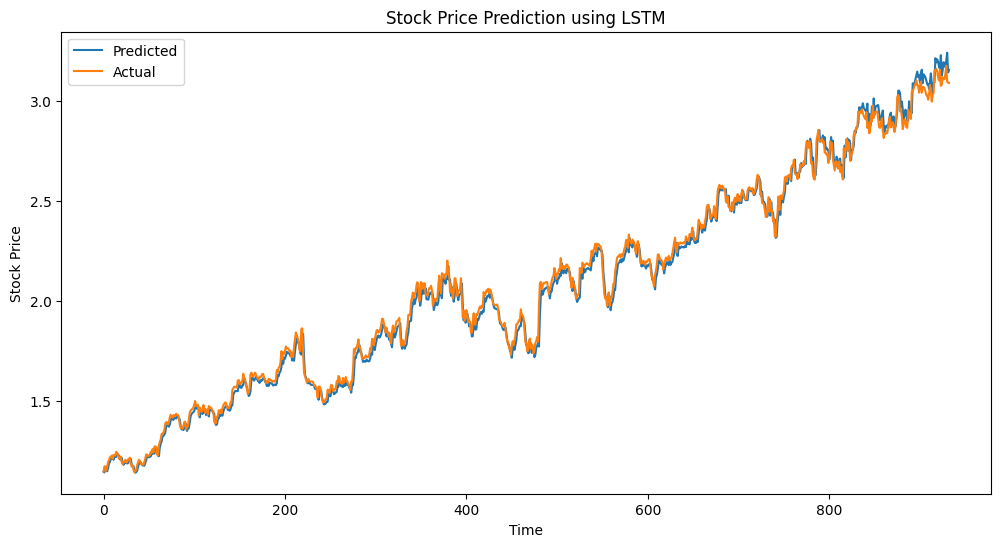

1/1 [==============================] - 0s 30ms/step
Additional Predictions:
Day 934: Predicted Price = 3.1559898853302
Day 935: Predicted Price = 3.232755422592163


In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load historical stock data
data = pd.read_csv('s&p500filtered.csv')
data = data['RETURN 2'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_normalized = scaler.fit_transform(data)

# Split the data into training and testing sets
train_size = int(len(data_normalized) * 0.8)
train_data, test_data = data_normalized[:train_size], data_normalized[train_size:]

# Create sequences for training the LSTM model
def create_sequences(data, sequence_length):
    sequences = []
    targets = []
    for i in range(len(data) - sequence_length):
        sequence = data[i:i+sequence_length]
        target = data[i+sequence_length]
        sequences.append(sequence)
        targets.append(target)
    return np.array(sequences), np.array(targets)

sequence_length = 10  # You can adjust this parameter
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Evaluate the model on the test data
test_loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')

# Make predictions on the test data
predictions = model.predict(X_test)

# Inverse transform the predictions to get actual stock prices
predictions_actual = scaler.inverse_transform(predictions)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(predictions_actual, label='Predicted')
plt.plot(y_test_actual, label='Actual')
plt.title('Stock Price Prediction using LSTM')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Number of additional days to predict
additional_days = 2

# Last sequence from the test data
last_sequence = X_test[-1]

# List to store the predicted values
additional_predictions = []

# Iterate to predict additional days
for _ in range(additional_days):
    # Reshape the last sequence to match model input shape
    last_sequence = last_sequence.reshape((1, sequence_length, 1))

    # Predict the next day
    next_prediction = model.predict(last_sequence)[0][0]

    # Append the prediction to the list of predictions
    additional_predictions.append(next_prediction)

    # Update the last sequence by removing the first element and appending the prediction
    last_sequence = np.roll(last_sequence, -1, axis=1)
    last_sequence[-1][-1] = next_prediction

# Inverse transform the additional predictions to get actual stock prices
additional_predictions_actual = scaler.inverse_transform(np.array(additional_predictions).reshape(-1, 1))

# Print the additional predictions
print("Additional Predictions:")
for i, pred in enumerate(additional_predictions_actual, 1):
    print(f"Day {len(predictions_actual) + i}: Predicted Price = {pred[0]}")


Epoch 1/50
118/118 [==============================] - 4s 7ms/step - loss: 0.0175
Epoch 2/50
118/118 [==============================] - 1s 7ms/step - loss: 3.8072e-04
Epoch 3/50
118/118 [==============================] - 1s 7ms/step - loss: 3.3609e-04
Epoch 4/50
118/118 [==============================] - 1s 7ms/step - loss: 2.9936e-04
Epoch 5/50
118/118 [==============================] - 1s 7ms/step - loss: 2.7922e-04
Epoch 6/50
118/118 [==============================] - 1s 9ms/step - loss: 2.6345e-04
Epoch 7/50
118/118 [==============================] - 1s 7ms/step - loss: 2.4534e-04
Epoch 8/50
118/118 [==============================] - 1s 8ms/step - loss: 2.4306e-04
Epoch 9/50
118/118 [==============================] - 1s 7ms/step - loss: 2.4331e-04
Epoch 10/50
118/118 [==============================] - 1s 7ms/step - loss: 2.5219e-04
Epoch 11/50
118/118 [==============================] - 1s 7ms/step - loss: 2.3223e-04
Epoch 12/50
118/118 [==============================] - 1s 11ms/step

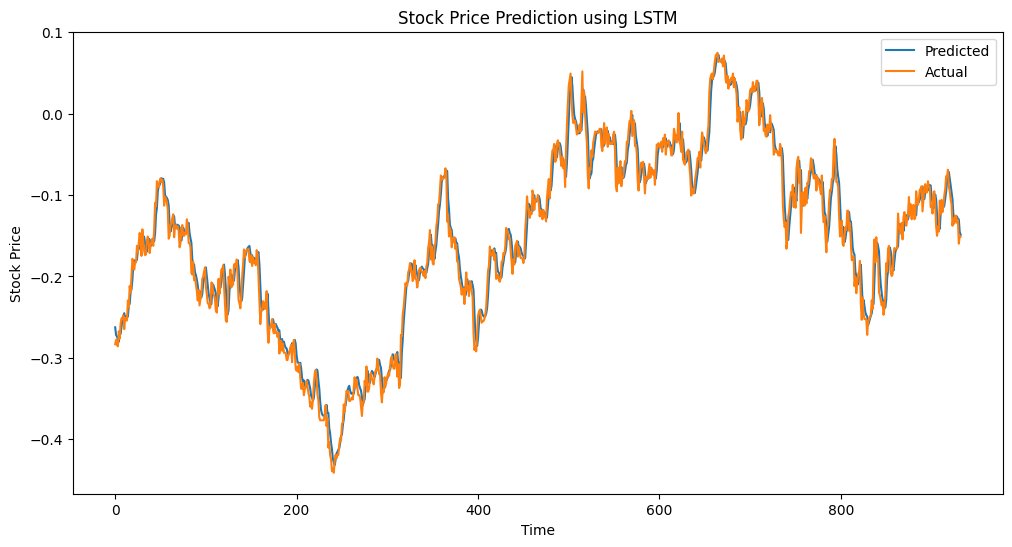

1/1 [==============================] - 0s 31ms/step
Additional Predictions:
Day 934: Predicted Price = -0.14861389994621277
Day 935: Predicted Price = -0.14778059720993042


In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load historical stock data
data = pd.read_csv('s&p500filtered.csv')
data = data['RETURN 3'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_normalized = scaler.fit_transform(data)

# Split the data into training and testing sets
train_size = int(len(data_normalized) * 0.8)
train_data, test_data = data_normalized[:train_size], data_normalized[train_size:]

# Create sequences for training the LSTM model
def create_sequences(data, sequence_length):
    sequences = []
    targets = []
    for i in range(len(data) - sequence_length):
        sequence = data[i:i+sequence_length]
        target = data[i+sequence_length]
        sequences.append(sequence)
        targets.append(target)
    return np.array(sequences), np.array(targets)

sequence_length = 10  # You can adjust this parameter
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Evaluate the model on the test data
test_loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')

# Make predictions on the test data
predictions = model.predict(X_test)

# Inverse transform the predictions to get actual stock prices
predictions_actual = scaler.inverse_transform(predictions)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(predictions_actual, label='Predicted')
plt.plot(y_test_actual, label='Actual')
plt.title('Stock Price Prediction using LSTM')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Number of additional days to predict
additional_days = 2

# Last sequence from the test data
last_sequence = X_test[-1]

# List to store the predicted values
additional_predictions = []

# Iterate to predict additional days
for _ in range(additional_days):
    # Reshape the last sequence to match model input shape
    last_sequence = last_sequence.reshape((1, sequence_length, 1))

    # Predict the next day
    next_prediction = model.predict(last_sequence)[0][0]

    # Append the prediction to the list of predictions
    additional_predictions.append(next_prediction)

    # Update the last sequence by removing the first element and appending the prediction
    last_sequence = np.roll(last_sequence, -1, axis=1)
    last_sequence[-1][-1] = next_prediction

# Inverse transform the additional predictions to get actual stock prices
additional_predictions_actual = scaler.inverse_transform(np.array(additional_predictions).reshape(-1, 1))

# Print the additional predictions
print("Additional Predictions:")
for i, pred in enumerate(additional_predictions_actual, 1):
    print(f"Day {len(predictions_actual) + i}: Predicted Price = {pred[0]}")


Epoch 1/50
118/118 [==============================] - 3s 9ms/step - loss: 0.0109
Epoch 2/50
118/118 [==============================] - 1s 7ms/step - loss: 3.3485e-04
Epoch 3/50
118/118 [==============================] - 1s 7ms/step - loss: 3.1384e-04
Epoch 4/50
118/118 [==============================] - 1s 7ms/step - loss: 2.9873e-04
Epoch 5/50
118/118 [==============================] - 1s 7ms/step - loss: 2.7972e-04
Epoch 6/50
118/118 [==============================] - 1s 7ms/step - loss: 2.6493e-04
Epoch 7/50
118/118 [==============================] - 1s 7ms/step - loss: 2.5482e-04
Epoch 8/50
118/118 [==============================] - 1s 7ms/step - loss: 2.4555e-04
Epoch 9/50
118/118 [==============================] - 1s 7ms/step - loss: 2.3142e-04
Epoch 10/50
118/118 [==============================] - 1s 7ms/step - loss: 2.2483e-04
Epoch 11/50
118/118 [==============================] - 1s 7ms/step - loss: 2.2443e-04
Epoch 12/50
118/118 [==============================] - 1s 12ms/step

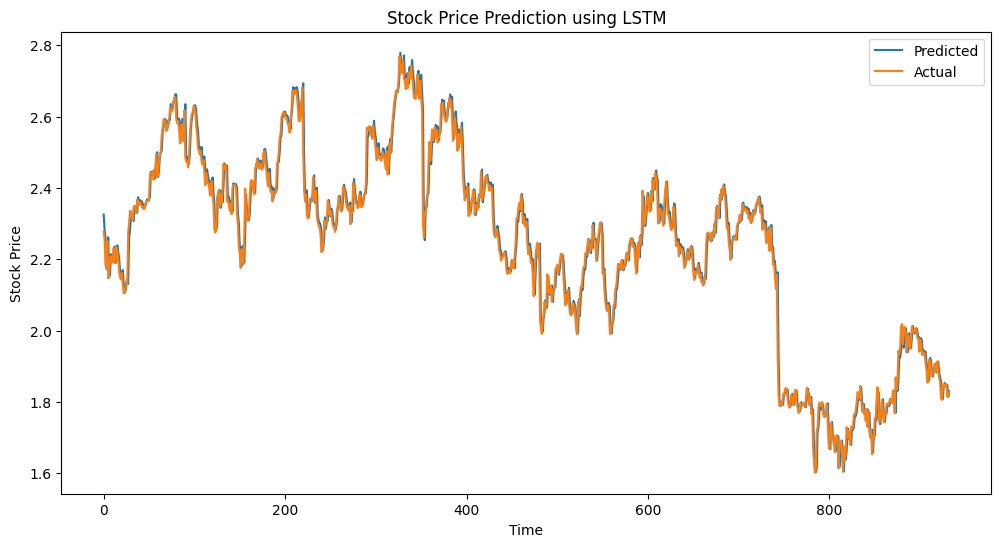

1/1 [==============================] - 0s 32ms/step
Additional Predictions:
Day 934: Predicted Price = 1.8297667503356934
Day 935: Predicted Price = 1.8315457105636597


In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load historical stock data
data = pd.read_csv('s&p500filtered.csv')
data = data['REURN 4'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_normalized = scaler.fit_transform(data)

# Split the data into training and testing sets
train_size = int(len(data_normalized) * 0.8)
train_data, test_data = data_normalized[:train_size], data_normalized[train_size:]

# Create sequences for training the LSTM model
def create_sequences(data, sequence_length):
    sequences = []
    targets = []
    for i in range(len(data) - sequence_length):
        sequence = data[i:i+sequence_length]
        target = data[i+sequence_length]
        sequences.append(sequence)
        targets.append(target)
    return np.array(sequences), np.array(targets)

sequence_length = 10  # You can adjust this parameter
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Evaluate the model on the test data
test_loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')

# Make predictions on the test data
predictions = model.predict(X_test)

# Inverse transform the predictions to get actual stock prices
predictions_actual = scaler.inverse_transform(predictions)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(predictions_actual, label='Predicted')
plt.plot(y_test_actual, label='Actual')
plt.title('Stock Price Prediction using LSTM')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Number of additional days to predict
additional_days = 2

# Last sequence from the test data
last_sequence = X_test[-1]

# List to store the predicted values
additional_predictions = []

# Iterate to predict additional days
for _ in range(additional_days):
    # Reshape the last sequence to match model input shape
    last_sequence = last_sequence.reshape((1, sequence_length, 1))

    # Predict the next day
    next_prediction = model.predict(last_sequence)[0][0]

    # Append the prediction to the list of predictions
    additional_predictions.append(next_prediction)

    # Update the last sequence by removing the first element and appending the prediction
    last_sequence = np.roll(last_sequence, -1, axis=1)
    last_sequence[-1][-1] = next_prediction

# Inverse transform the additional predictions to get actual stock prices
additional_predictions_actual = scaler.inverse_transform(np.array(additional_predictions).reshape(-1, 1))

# Print the additional predictions
print("Additional Predictions:")
for i, pred in enumerate(additional_predictions_actual, 1):
    print(f"Day {len(predictions_actual) + i}: Predicted Price = {pred[0]}")


Epoch 1/50
118/118 [==============================] - 2s 7ms/step - loss: 0.0133
Epoch 2/50
118/118 [==============================] - 1s 8ms/step - loss: 2.4227e-04
Epoch 3/50
118/118 [==============================] - 1s 8ms/step - loss: 2.3114e-04
Epoch 4/50
118/118 [==============================] - 1s 7ms/step - loss: 2.1868e-04
Epoch 5/50
118/118 [==============================] - 1s 7ms/step - loss: 2.1617e-04
Epoch 6/50
118/118 [==============================] - 1s 6ms/step - loss: 2.0639e-04
Epoch 7/50
118/118 [==============================] - 1s 6ms/step - loss: 2.0711e-04
Epoch 8/50
118/118 [==============================] - 1s 6ms/step - loss: 1.9204e-04
Epoch 9/50
118/118 [==============================] - 1s 7ms/step - loss: 1.8633e-04
Epoch 10/50
118/118 [==============================] - 1s 8ms/step - loss: 1.9308e-04
Epoch 11/50
118/118 [==============================] - 1s 10ms/step - loss: 1.7714e-04
Epoch 12/50
118/118 [==============================] - 2s 13ms/ste

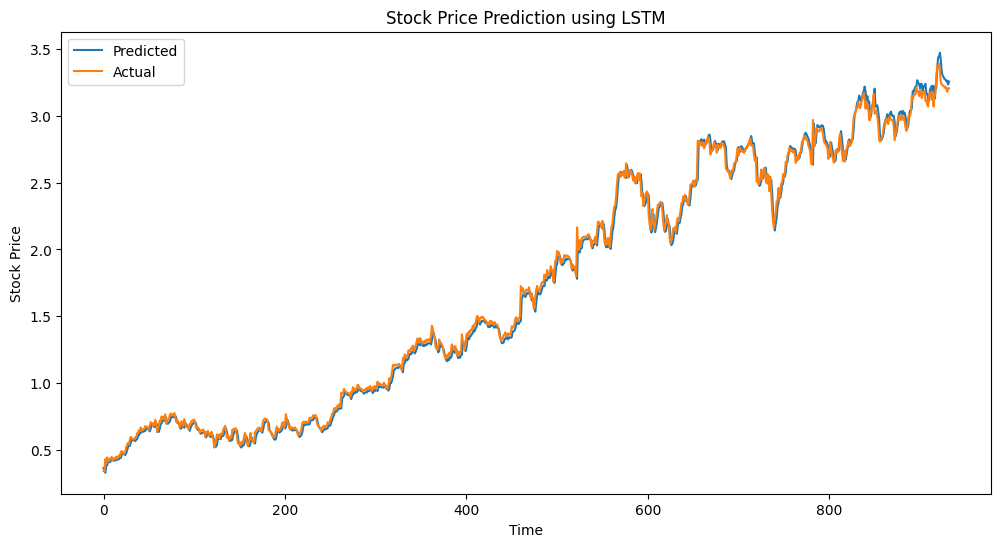

1/1 [==============================] - 0s 21ms/step
Additional Predictions:
Day 934: Predicted Price = 3.2551562786102295
Day 935: Predicted Price = 3.310035228729248


In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load historical stock data
data = pd.read_csv('s&p500filtered.csv')
data = data['RETURN 5'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_normalized = scaler.fit_transform(data)

# Split the data into training and testing sets
train_size = int(len(data_normalized) * 0.8)
train_data, test_data = data_normalized[:train_size], data_normalized[train_size:]

# Create sequences for training the LSTM model
def create_sequences(data, sequence_length):
    sequences = []
    targets = []
    for i in range(len(data) - sequence_length):
        sequence = data[i:i+sequence_length]
        target = data[i+sequence_length]
        sequences.append(sequence)
        targets.append(target)
    return np.array(sequences), np.array(targets)

sequence_length = 10  # You can adjust this parameter
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Evaluate the model on the test data
test_loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')

# Make predictions on the test data
predictions = model.predict(X_test)

# Inverse transform the predictions to get actual stock prices
predictions_actual = scaler.inverse_transform(predictions)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(predictions_actual, label='Predicted')
plt.plot(y_test_actual, label='Actual')
plt.title('Stock Price Prediction using LSTM')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Number of additional days to predict
additional_days = 2

# Last sequence from the test data
last_sequence = X_test[-1]

# List to store the predicted values
additional_predictions = []

# Iterate to predict additional days
for _ in range(additional_days):
    # Reshape the last sequence to match model input shape
    last_sequence = last_sequence.reshape((1, sequence_length, 1))

    # Predict the next day
    next_prediction = model.predict(last_sequence)[0][0]

    # Append the prediction to the list of predictions
    additional_predictions.append(next_prediction)

    # Update the last sequence by removing the first element and appending the prediction
    last_sequence = np.roll(last_sequence, -1, axis=1)
    last_sequence[-1][-1] = next_prediction

# Inverse transform the additional predictions to get actual stock prices
additional_predictions_actual = scaler.inverse_transform(np.array(additional_predictions).reshape(-1, 1))

# Print the additional predictions
print("Additional Predictions:")
for i, pred in enumerate(additional_predictions_actual, 1):
    print(f"Day {len(predictions_actual) + i}: Predicted Price = {pred[0]}")


Epoch 1/50
118/118 [==============================] - 2s 6ms/step - loss: 0.0087
Epoch 2/50
118/118 [==============================] - 1s 6ms/step - loss: 1.5249e-04
Epoch 3/50
118/118 [==============================] - 1s 11ms/step - loss: 1.3659e-04
Epoch 4/50
118/118 [==============================] - 1s 9ms/step - loss: 1.3220e-04
Epoch 5/50
118/118 [==============================] - 1s 8ms/step - loss: 1.3781e-04
Epoch 6/50
118/118 [==============================] - 1s 6ms/step - loss: 1.3281e-04
Epoch 7/50
118/118 [==============================] - 1s 6ms/step - loss: 1.3271e-04
Epoch 8/50
118/118 [==============================] - 1s 6ms/step - loss: 1.2607e-04
Epoch 9/50
118/118 [==============================] - 1s 6ms/step - loss: 1.2127e-04
Epoch 10/50
118/118 [==============================] - 1s 6ms/step - loss: 1.3025e-04
Epoch 11/50
118/118 [==============================] - 1s 8ms/step - loss: 1.2136e-04
Epoch 12/50
118/118 [==============================] - 1s 7ms/step

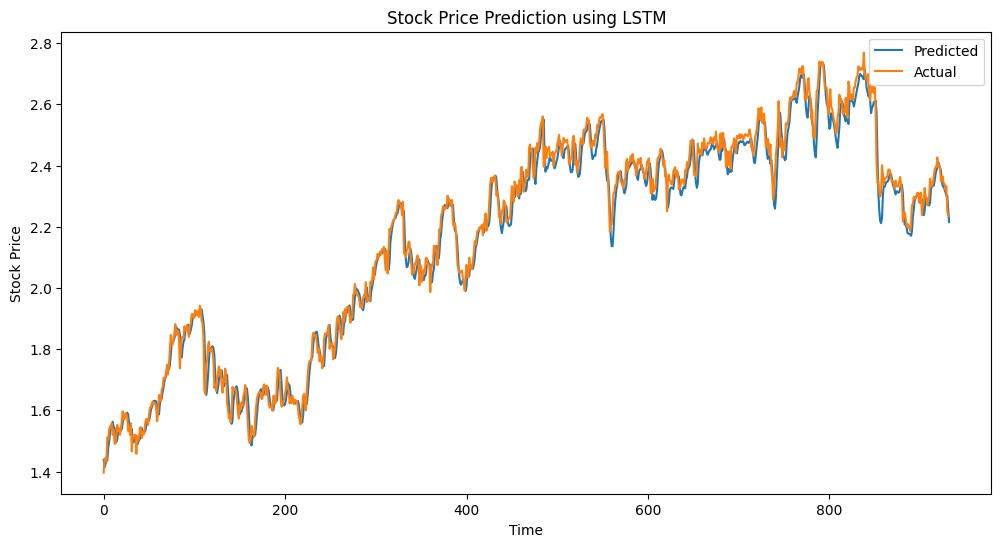

1/1 [==============================] - 0s 26ms/step
Additional Predictions:
Day 934: Predicted Price = 2.2154159545898438
Day 935: Predicted Price = 2.1884326934814453


In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load historical stock data
data = pd.read_csv('s&p500filtered.csv')
data = data['RETURN 6'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_normalized = scaler.fit_transform(data)

# Split the data into training and testing sets
train_size = int(len(data_normalized) * 0.8)
train_data, test_data = data_normalized[:train_size], data_normalized[train_size:]

# Create sequences for training the LSTM model
def create_sequences(data, sequence_length):
    sequences = []
    targets = []
    for i in range(len(data) - sequence_length):
        sequence = data[i:i+sequence_length]
        target = data[i+sequence_length]
        sequences.append(sequence)
        targets.append(target)
    return np.array(sequences), np.array(targets)

sequence_length = 10  # You can adjust this parameter
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Evaluate the model on the test data
test_loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')

# Make predictions on the test data
predictions = model.predict(X_test)

# Inverse transform the predictions to get actual stock prices
predictions_actual = scaler.inverse_transform(predictions)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(predictions_actual, label='Predicted')
plt.plot(y_test_actual, label='Actual')
plt.title('Stock Price Prediction using LSTM')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Number of additional days to predict
additional_days = 2

# Last sequence from the test data
last_sequence = X_test[-1]

# List to store the predicted values
additional_predictions = []

# Iterate to predict additional days
for _ in range(additional_days):
    # Reshape the last sequence to match model input shape
    last_sequence = last_sequence.reshape((1, sequence_length, 1))

    # Predict the next day
    next_prediction = model.predict(last_sequence)[0][0]

    # Append the prediction to the list of predictions
    additional_predictions.append(next_prediction)

    # Update the last sequence by removing the first element and appending the prediction
    last_sequence = np.roll(last_sequence, -1, axis=1)
    last_sequence[-1][-1] = next_prediction

# Inverse transform the additional predictions to get actual stock prices
additional_predictions_actual = scaler.inverse_transform(np.array(additional_predictions).reshape(-1, 1))

# Print the additional predictions
print("Additional Predictions:")
for i, pred in enumerate(additional_predictions_actual, 1):
    print(f"Day {len(predictions_actual) + i}: Predicted Price = {pred[0]}")


In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load historical stock data
data = pd.read_csv('s&p500filtered.csv')
data = data['RETURN 7].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_normalized = scaler.fit_transform(data)

# Split the data into training and testing sets
train_size = int(len(data_normalized) * 0.8)
train_data, test_data = data_normalized[:train_size], data_normalized[train_size:]

# Create sequences for training the LSTM model
def create_sequences(data, sequence_length):
    sequences = []
    targets = []
    for i in range(len(data) - sequence_length):
        sequence = data[i:i+sequence_length]
        target = data[i+sequence_length]
        sequences.append(sequence)
        targets.append(target)
    return np.array(sequences), np.array(targets)

sequence_length = 10  # You can adjust this parameter
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Evaluate the model on the test data
test_loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')

# Make predictions on the test data
predictions = model.predict(X_test)

# Inverse transform the predictions to get actual stock prices
predictions_actual = scaler.inverse_transform(predictions)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(predictions_actual, label='Predicted')
plt.plot(y_test_actual, label='Actual')
plt.title('Stock Price Prediction using LSTM')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Number of additional days to predict
additional_days = 2

# Last sequence from the test data
last_sequence = X_test[-1]

# List to store the predicted values
additional_predictions = []

# Iterate to predict additional days
for _ in range(additional_days):
    # Reshape the last sequence to match model input shape
    last_sequence = last_sequence.reshape((1, sequence_length, 1))

    # Predict the next day
    next_prediction = model.predict(last_sequence)[0][0]

    # Append the prediction to the list of predictions
    additional_predictions.append(next_prediction)

    # Update the last sequence by removing the first element and appending the prediction
    last_sequence = np.roll(last_sequence, -1, axis=1)
    last_sequence[-1][-1] = next_prediction

# Inverse transform the additional predictions to get actual stock prices
additional_predictions_actual = scaler.inverse_transform(np.array(additional_predictions).reshape(-1, 1))

# Print the additional predictions
print("Additional Predictions:")
for i, pred in enumerate(additional_predictions_actual, 1):
    print(f"Day {len(predictions_actual) + i}: Predicted Price = {pred[0]}")


SyntaxError: unterminated string literal (detected at line 11) (<ipython-input-1-049318023d51>, line 11)

Epoch 1/50
118/118 [==============================] - 2s 7ms/step - loss: 0.0194
Epoch 2/50
118/118 [==============================] - 1s 7ms/step - loss: 5.3944e-04
Epoch 3/50
118/118 [==============================] - 1s 6ms/step - loss: 5.1037e-04
Epoch 4/50
118/118 [==============================] - 1s 7ms/step - loss: 4.8960e-04
Epoch 5/50
118/118 [==============================] - 1s 12ms/step - loss: 4.8518e-04
Epoch 6/50
118/118 [==============================] - 1s 12ms/step - loss: 4.5631e-04
Epoch 7/50
118/118 [==============================] - 1s 11ms/step - loss: 4.2852e-04
Epoch 8/50
118/118 [==============================] - 1s 9ms/step - loss: 4.2344e-04
Epoch 9/50
118/118 [==============================] - 1s 7ms/step - loss: 3.9396e-04
Epoch 10/50
118/118 [==============================] - 1s 6ms/step - loss: 3.8134e-04
Epoch 11/50
118/118 [==============================] - 1s 6ms/step - loss: 3.7423e-04
Epoch 12/50
118/118 [==============================] - 1s 6ms/st

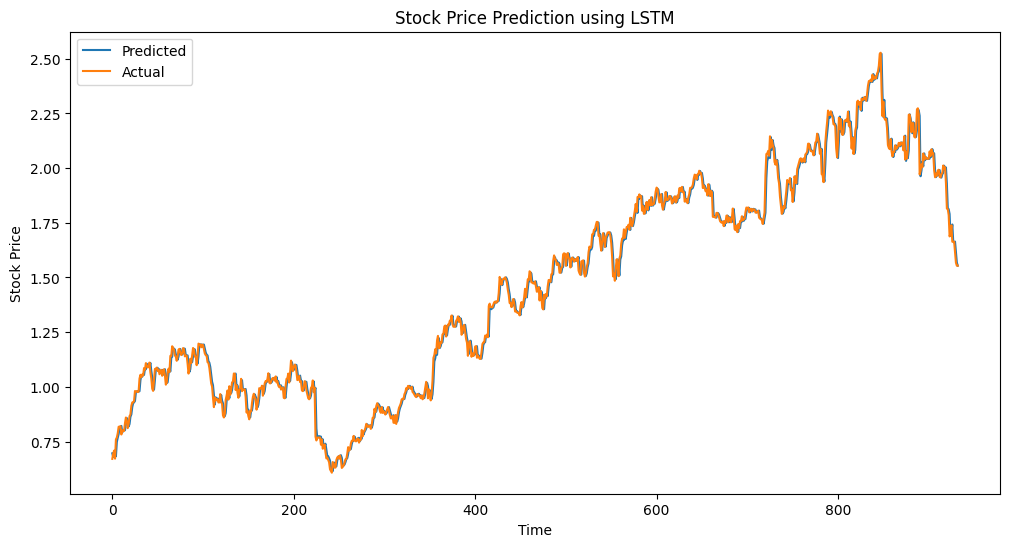

1/1 [==============================] - 0s 35ms/step
Additional Predictions:
Day 934: Predicted Price = 1.5542436838150024
Day 935: Predicted Price = 1.55559504032135


In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load historical stock data
data = pd.read_csv('s&p500filtered.csv')
data = data['RETURN 8'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_normalized = scaler.fit_transform(data)

# Split the data into training and testing sets
train_size = int(len(data_normalized) * 0.8)
train_data, test_data = data_normalized[:train_size], data_normalized[train_size:]

# Create sequences for training the LSTM model
def create_sequences(data, sequence_length):
    sequences = []
    targets = []
    for i in range(len(data) - sequence_length):
        sequence = data[i:i+sequence_length]
        target = data[i+sequence_length]
        sequences.append(sequence)
        targets.append(target)
    return np.array(sequences), np.array(targets)

sequence_length = 10  # You can adjust this parameter
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Evaluate the model on the test data
test_loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')

# Make predictions on the test data
predictions = model.predict(X_test)

# Inverse transform the predictions to get actual stock prices
predictions_actual = scaler.inverse_transform(predictions)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(predictions_actual, label='Predicted')
plt.plot(y_test_actual, label='Actual')
plt.title('Stock Price Prediction using LSTM')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Number of additional days to predict
additional_days = 2

# Last sequence from the test data
last_sequence = X_test[-1]

# List to store the predicted values
additional_predictions = []

# Iterate to predict additional days
for _ in range(additional_days):
    # Reshape the last sequence to match model input shape
    last_sequence = last_sequence.reshape((1, sequence_length, 1))

    # Predict the next day
    next_prediction = model.predict(last_sequence)[0][0]

    # Append the prediction to the list of predictions
    additional_predictions.append(next_prediction)

    # Update the last sequence by removing the first element and appending the prediction
    last_sequence = np.roll(last_sequence, -1, axis=1)
    last_sequence[-1][-1] = next_prediction

# Inverse transform the additional predictions to get actual stock prices
additional_predictions_actual = scaler.inverse_transform(np.array(additional_predictions).reshape(-1, 1))

# Print the additional predictions
print("Additional Predictions:")
for i, pred in enumerate(additional_predictions_actual, 1):
    print(f"Day {len(predictions_actual) + i}: Predicted Price = {pred[0]}")


Epoch 1/50
118/118 [==============================] - 2s 8ms/step - loss: 0.0286
Epoch 2/50
118/118 [==============================] - 1s 8ms/step - loss: 4.0926e-04
Epoch 3/50
118/118 [==============================] - 1s 6ms/step - loss: 3.6523e-04
Epoch 4/50
118/118 [==============================] - 1s 6ms/step - loss: 3.4787e-04
Epoch 5/50
118/118 [==============================] - 1s 6ms/step - loss: 3.3368e-04
Epoch 6/50
118/118 [==============================] - 1s 6ms/step - loss: 3.2527e-04
Epoch 7/50
118/118 [==============================] - 1s 7ms/step - loss: 3.2869e-04
Epoch 8/50
118/118 [==============================] - 1s 6ms/step - loss: 3.1876e-04
Epoch 9/50
118/118 [==============================] - 1s 6ms/step - loss: 2.9877e-04
Epoch 10/50
118/118 [==============================] - 1s 6ms/step - loss: 2.9666e-04
Epoch 11/50
118/118 [==============================] - 1s 7ms/step - loss: 2.8424e-04
Epoch 12/50
118/118 [==============================] - 1s 9ms/step 

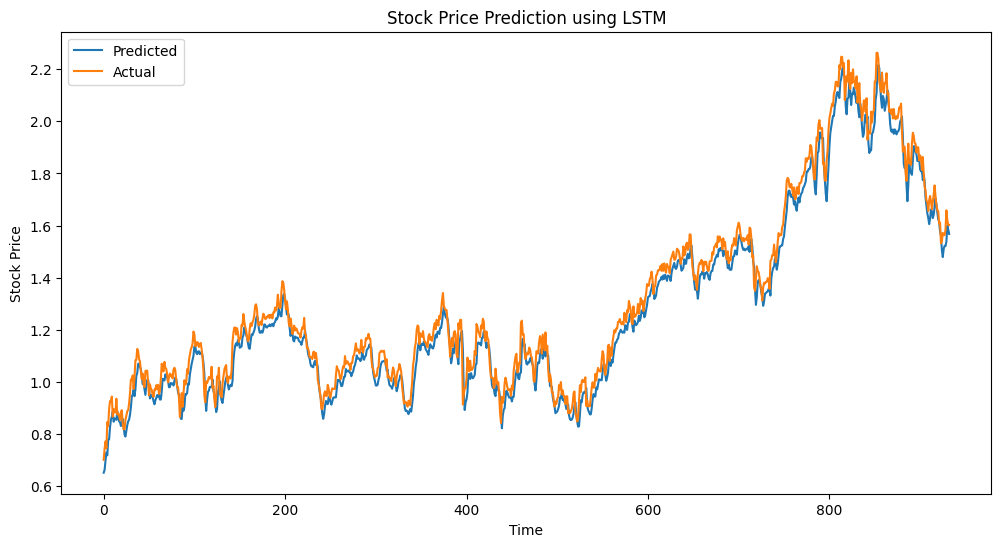

1/1 [==============================] - 0s 47ms/step
Additional Predictions:
Day 934: Predicted Price = 1.5675805807113647
Day 935: Predicted Price = 1.5403802394866943


In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load historical stock data
data = pd.read_csv('s&p500filtered.csv')
data = data['RETURN 9'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_normalized = scaler.fit_transform(data)

# Split the data into training and testing sets
train_size = int(len(data_normalized) * 0.8)
train_data, test_data = data_normalized[:train_size], data_normalized[train_size:]

# Create sequences for training the LSTM model
def create_sequences(data, sequence_length):
    sequences = []
    targets = []
    for i in range(len(data) - sequence_length):
        sequence = data[i:i+sequence_length]
        target = data[i+sequence_length]
        sequences.append(sequence)
        targets.append(target)
    return np.array(sequences), np.array(targets)

sequence_length = 10  # You can adjust this parameter
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Evaluate the model on the test data
test_loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')

# Make predictions on the test data
predictions = model.predict(X_test)

# Inverse transform the predictions to get actual stock prices
predictions_actual = scaler.inverse_transform(predictions)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(predictions_actual, label='Predicted')
plt.plot(y_test_actual, label='Actual')
plt.title('Stock Price Prediction using LSTM')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Number of additional days to predict
additional_days = 2

# Last sequence from the test data
last_sequence = X_test[-1]

# List to store the predicted values
additional_predictions = []

# Iterate to predict additional days
for _ in range(additional_days):
    # Reshape the last sequence to match model input shape
    last_sequence = last_sequence.reshape((1, sequence_length, 1))

    # Predict the next day
    next_prediction = model.predict(last_sequence)[0][0]

    # Append the prediction to the list of predictions
    additional_predictions.append(next_prediction)

    # Update the last sequence by removing the first element and appending the prediction
    last_sequence = np.roll(last_sequence, -1, axis=1)
    last_sequence[-1][-1] = next_prediction

# Inverse transform the additional predictions to get actual stock prices
additional_predictions_actual = scaler.inverse_transform(np.array(additional_predictions).reshape(-1, 1))

# Print the additional predictions
print("Additional Predictions:")
for i, pred in enumerate(additional_predictions_actual, 1):
    print(f"Day {len(predictions_actual) + i}: Predicted Price = {pred[0]}")


Epoch 1/50
118/118 [==============================] - 4s 13ms/step - loss: 0.0054
Epoch 2/50
118/118 [==============================] - 2s 14ms/step - loss: 1.5953e-04
Epoch 3/50
118/118 [==============================] - 1s 11ms/step - loss: 1.4972e-04
Epoch 4/50
118/118 [==============================] - 1s 10ms/step - loss: 1.5019e-04
Epoch 5/50
118/118 [==============================] - 1s 10ms/step - loss: 1.4589e-04
Epoch 6/50
118/118 [==============================] - 1s 12ms/step - loss: 1.3969e-04
Epoch 7/50
118/118 [==============================] - 1s 11ms/step - loss: 1.3658e-04
Epoch 8/50
118/118 [==============================] - 1s 11ms/step - loss: 1.3241e-04
Epoch 9/50
118/118 [==============================] - 1s 11ms/step - loss: 1.2855e-04
Epoch 10/50
118/118 [==============================] - 2s 13ms/step - loss: 1.2789e-04
Epoch 11/50
118/118 [==============================] - 2s 20ms/step - loss: 1.2081e-04
Epoch 12/50
118/118 [==============================] - 2

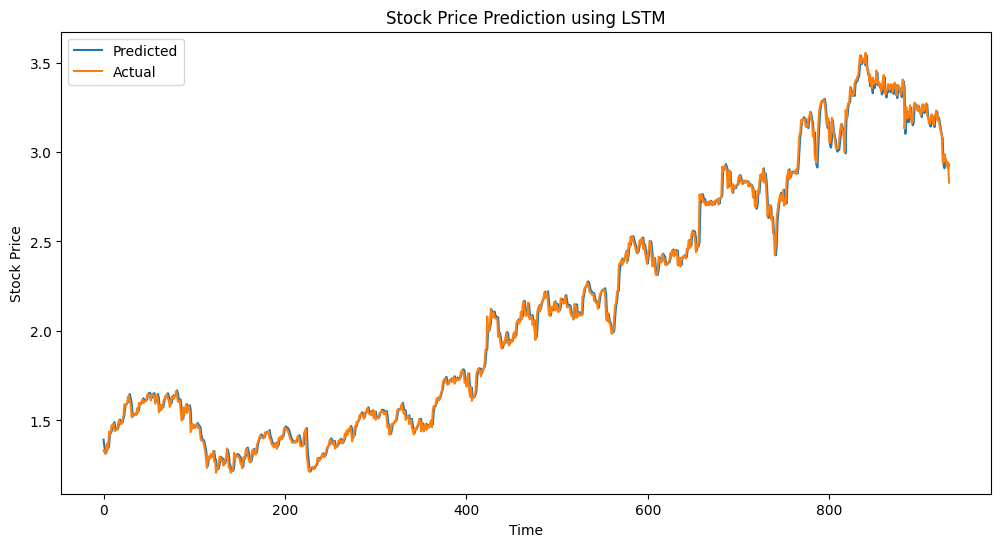

1/1 [==============================] - 0s 23ms/step
Additional Predictions:
Day 934: Predicted Price = 2.93009877204895
Day 935: Predicted Price = 2.9243226051330566


In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load historical stock data
data = pd.read_csv('Sss.csv')
data = data['RETURN 9'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_normalized = scaler.fit_transform(data)

# Split the data into training and testing sets
train_size = int(len(data_normalized) * 0.8)
train_data, test_data = data_normalized[:train_size], data_normalized[train_size:]

# Create sequences for training the LSTM model
def create_sequences(data, sequence_length):
    sequences = []
    targets = []
    for i in range(len(data) - sequence_length):
        sequence = data[i:i+sequence_length]
        target = data[i+sequence_length]
        sequences.append(sequence)
        targets.append(target)
    return np.array(sequences), np.array(targets)

sequence_length = 10  # You can adjust this parameter
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Evaluate the model on the test data
test_loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')

# Make predictions on the test data
predictions = model.predict(X_test)

# Inverse transform the predictions to get actual stock prices
predictions_actual = scaler.inverse_transform(predictions)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(predictions_actual, label='Predicted')
plt.plot(y_test_actual, label='Actual')
plt.title('Stock Price Prediction using LSTM')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Number of additional days to predict
additional_days = 2

# Last sequence from the test data
last_sequence = X_test[-1]

# List to store the predicted values
additional_predictions = []

# Iterate to predict additional days
for _ in range(additional_days):
    # Reshape the last sequence to match model input shape
    last_sequence = last_sequence.reshape((1, sequence_length, 1))

    # Predict the next day
    next_prediction = model.predict(last_sequence)[0][0]

    # Append the prediction to the list of predictions
    additional_predictions.append(next_prediction)

    # Update the last sequence by removing the first element and appending the prediction
    last_sequence = np.roll(last_sequence, -1, axis=1)
    last_sequence[-1][-1] = next_prediction

# Inverse transform the additional predictions to get actual stock prices
additional_predictions_actual = scaler.inverse_transform(np.array(additional_predictions).reshape(-1, 1))

# Print the additional predictions
print("Additional Predictions:")
for i, pred in enumerate(additional_predictions_actual, 1):
    print(f"Day {len(predictions_actual) + i}: Predicted Price = {pred[0]}")


Epoch 1/50
118/118 [==============================] - 2s 5ms/step - loss: 0.0074
Epoch 2/50
118/118 [==============================] - 0s 4ms/step - loss: 1.8723e-04
Epoch 3/50
118/118 [==============================] - 0s 4ms/step - loss: 1.7674e-04
Epoch 4/50
118/118 [==============================] - 0s 4ms/step - loss: 1.6728e-04
Epoch 5/50
118/118 [==============================] - 0s 4ms/step - loss: 1.6298e-04
Epoch 6/50
118/118 [==============================] - 0s 3ms/step - loss: 1.6987e-04
Epoch 7/50
118/118 [==============================] - 1s 5ms/step - loss: 1.5967e-04
Epoch 8/50
118/118 [==============================] - 1s 5ms/step - loss: 1.4875e-04
Epoch 9/50
118/118 [==============================] - 1s 6ms/step - loss: 1.5512e-04
Epoch 10/50
118/118 [==============================] - 0s 4ms/step - loss: 1.4322e-04
Epoch 11/50
118/118 [==============================] - 0s 4ms/step - loss: 1.4142e-04
Epoch 12/50
118/118 [==============================] - 0s 4ms/step 

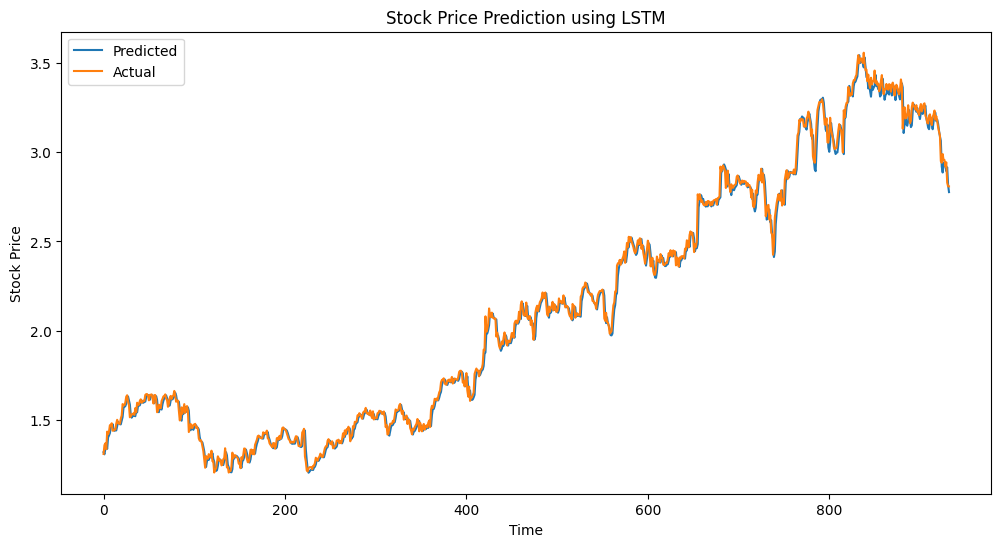

1/1 [==============================] - 0s 16ms/step
Additional Predictions:
Day 934: Predicted Price = 2.7756171226501465
Day 935: Predicted Price = 2.7476837635040283


In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load historical stock data
data = pd.read_csv('s&p500filtered.csv')
data = data['RETURN 7'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_normalized = scaler.fit_transform(data)

# Split the data into training and testing sets
train_size = int(len(data_normalized) * 0.8)
train_data, test_data = data_normalized[:train_size], data_normalized[train_size:]

# Create sequences for training the LSTM model
def create_sequences(data, sequence_length):
    sequences = []
    targets = []
    for i in range(len(data) - sequence_length):
        sequence = data[i:i+sequence_length]
        target = data[i+sequence_length]
        sequences.append(sequence)
        targets.append(target)
    return np.array(sequences), np.array(targets)

sequence_length = 10  # You can adjust this parameter
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Evaluate the model on the test data
test_loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')

# Make predictions on the test data
predictions = model.predict(X_test)

# Inverse transform the predictions to get actual stock prices
predictions_actual = scaler.inverse_transform(predictions)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(predictions_actual, label='Predicted')
plt.plot(y_test_actual, label='Actual')
plt.title('Stock Price Prediction using LSTM')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Number of additional days to predict
additional_days = 2

# Last sequence from the test data
last_sequence = X_test[-1]

# List to store the predicted values
additional_predictions = []

# Iterate to predict additional days
for _ in range(additional_days):
    # Reshape the last sequence to match model input shape
    last_sequence = last_sequence.reshape((1, sequence_length, 1))

    # Predict the next day
    next_prediction = model.predict(last_sequence)[0][0]

    # Append the prediction to the list of predictions
    additional_predictions.append(next_prediction)

    # Update the last sequence by removing the first element and appending the prediction
    last_sequence = np.roll(last_sequence, -1, axis=1)
    last_sequence[-1][-1] = next_prediction

# Inverse transform the additional predictions to get actual stock prices
additional_predictions_actual = scaler.inverse_transform(np.array(additional_predictions).reshape(-1, 1))

# Print the additional predictions
print("Additional Predictions:")
for i, pred in enumerate(additional_predictions_actual, 1):
    print(f"Day {len(predictions_actual) + i}: Predicted Price = {pred[0]}")


Epoch 1/50
118/118 [==============================] - 7s 14ms/step - loss: 0.0036
Epoch 2/50
118/118 [==============================] - 2s 14ms/step - loss: 1.8569e-04
Epoch 3/50
118/118 [==============================] - 2s 21ms/step - loss: 1.6861e-04
Epoch 4/50
118/118 [==============================] - 2s 21ms/step - loss: 1.6252e-04
Epoch 5/50
118/118 [==============================] - 2s 15ms/step - loss: 1.6080e-04
Epoch 6/50
118/118 [==============================] - 2s 15ms/step - loss: 1.6281e-04
Epoch 7/50
118/118 [==============================] - 2s 14ms/step - loss: 1.4929e-04
Epoch 8/50
118/118 [==============================] - 2s 14ms/step - loss: 1.6176e-04
Epoch 9/50
118/118 [==============================] - 2s 14ms/step - loss: 1.4940e-04
Epoch 10/50
118/118 [==============================] - 2s 19ms/step - loss: 1.4903e-04
Epoch 11/50
118/118 [==============================] - 3s 22ms/step - loss: 1.4915e-04
Epoch 12/50
118/118 [==============================] - 2

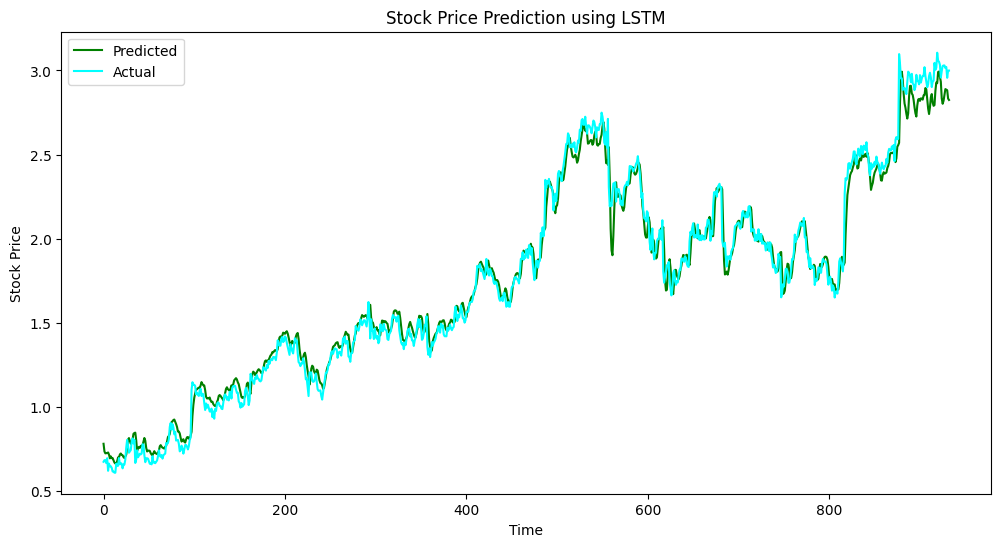

1/1 [==============================] - 0s 22ms/step
Additional Predictions:
Day 934: Predicted Price = 2.8249049186706543
Day 935: Predicted Price = 2.698054552078247


In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load historical stock data
data = pd.read_csv('s&p500filtered.csv')
data = data['RETURN 1'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_normalized = scaler.fit_transform(data)

# Split the data into training and testing sets
train_size = int(len(data_normalized) * 0.8)
train_data, test_data = data_normalized[:train_size], data_normalized[train_size:]

# Create sequences for training the LSTM model
def create_sequences(data, sequence_length):
    sequences = []
    targets = []
    for i in range(len(data) - sequence_length):
        sequence = data[i:i+sequence_length]
        target = data[i+sequence_length]
        sequences.append(sequence)
        targets.append(target)
    return np.array(sequences), np.array(targets)

sequence_length = 10  # You can adjust this parameter
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)

# Build the LSTM model with LSTM output layer
model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(sequence_length, 1)))
model.add(LSTM(units=50, activation='relu', return_sequences=True))  # Second LSTM layer returns sequences
model.add(LSTM(units=1, activation=None))  # LSTM output layer directly
model.compile(optimizer='adam', loss='mean_squared_error')


# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Evaluate the model on the test data
test_loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')

# Make predictions on the test data
predictions = model.predict(X_test)

# Inverse transform the predictions to get actual stock prices
predictions_actual = scaler.inverse_transform(predictions)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(predictions_actual, color="green",label='Predicted')
plt.plot(y_test_actual, color="cyan", label='Actual')
plt.title('Stock Price Prediction using LSTM')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Number of additional days to predict
additional_days = 2

# Last sequence from the test data
last_sequence = X_test[-1]

# List to store the predicted values
additional_predictions = []

# Iterate to predict additional days
for _ in range(additional_days):
    # Reshape the last sequence to match model input shape
    last_sequence = last_sequence.reshape((1, sequence_length, 1))

    # Predict the next day
    next_prediction = model.predict(last_sequence)[0][0]

    # Append the prediction to the list of predictions
    additional_predictions.append(next_prediction)

    # Update the last sequence by removing the first element and appending the prediction
    last_sequence = np.roll(last_sequence, -1, axis=1)
    last_sequence[-1][-1] = next_prediction

# Inverse transform the additional predictions to get actual stock prices
additional_predictions_actual = scaler.inverse_transform(np.array(additional_predictions).reshape(-1, 1))

# Print the additional predictions
print("Additional Predictions:")
for i, pred in enumerate(additional_predictions_actual, 1):
    print(f"Day {len(predictions_actual) + i}: Predicted Price = {pred[0]}")


Epoch 1/50
117/117 [==============================] - 7s 43ms/step - loss: 0.0052
Epoch 2/50
117/117 [==============================] - 5s 46ms/step - loss: 1.2312e-04
Epoch 3/50
117/117 [==============================] - 3s 24ms/step - loss: 1.1648e-04
Epoch 4/50
117/117 [==============================] - 3s 22ms/step - loss: 1.0266e-04
Epoch 5/50
117/117 [==============================] - 3s 26ms/step - loss: 1.0475e-04
Epoch 6/50
117/117 [==============================] - 4s 30ms/step - loss: 9.5962e-05
Epoch 7/50
117/117 [==============================] - 3s 23ms/step - loss: 9.2277e-05
Epoch 8/50
117/117 [==============================] - 3s 23ms/step - loss: 9.2085e-05
Epoch 9/50
117/117 [==============================] - 3s 22ms/step - loss: 8.5173e-05
Epoch 10/50
117/117 [==============================] - 4s 32ms/step - loss: 8.2016e-05
Epoch 11/50
117/117 [==============================] - 3s 25ms/step - loss: 7.9956e-05
Epoch 12/50
117/117 [==============================] - 3

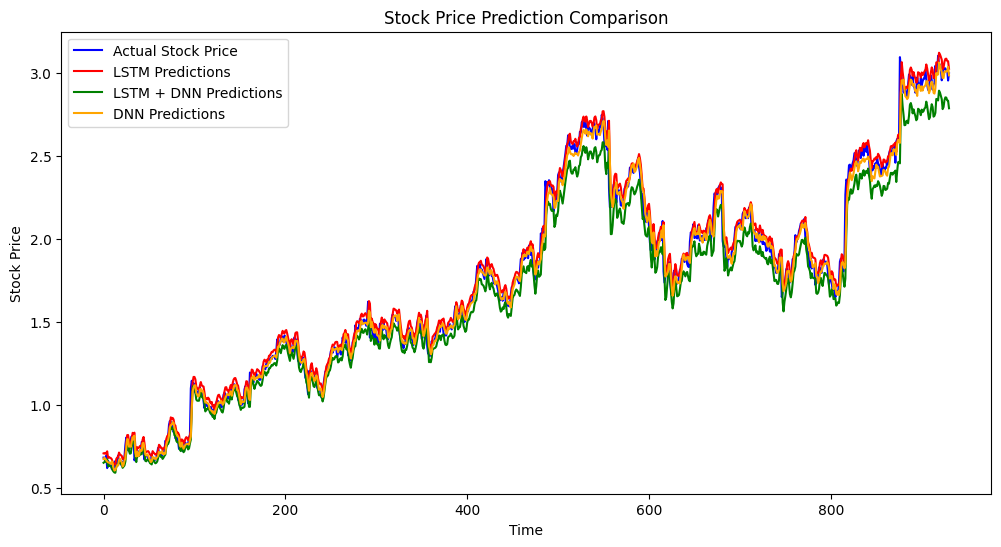

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load data
data = pd.read_csv("s&p500filtered.csv")

# Preprocess data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['RETURN 1'].values.reshape(-1, 1))

# Define look-back period
look_back = 60

# Create dataset
def create_dataset(data, look_back=1):
    X, y = [], []
    for i in range(len(data) - look_back - 1):
        X.append(data[i:(i + look_back), 0])
        y.append(data[i + look_back, 0])
    return np.array(X), np.array(y)

X, y = create_dataset(scaled_data, look_back)

# Split data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Define the LSTM model with multiple output layers
def build_lstm_model(look_back):
    model = Sequential()
    model.add(LSTM(units=50, activation='relu', input_shape=(look_back, 1)))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Train the LSTM model with multiple output layers
lstm_model = build_lstm_model(look_back)
lstm_model.fit(X_train, y_train, epochs=50, batch_size=32)

# Define the LSTM model with single output layer
def build_single_lstm_model(look_back):
    model = Sequential()
    model.add(LSTM(units=50, activation='relu', input_shape=(look_back, 1)))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Train the LSTM model with single output layer
single_lstm_model = build_single_lstm_model(look_back)
single_lstm_model.fit(X_train, y_train, epochs=50, batch_size=32)

# Define the DNN model
def build_dnn_model(look_back):
    model = Sequential()
    model.add(Dense(units=64, activation='relu', input_dim=look_back))
    model.add(Dense(units=32, activation='relu'))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Train the DNN model
dnn_model = build_dnn_model(look_back)
dnn_model.fit(X_train, y_train, epochs=100, batch_size=32)

# Make predictions
lstm_predictions = lstm_model.predict(X_test)
single_lstm_predictions = single_lstm_model.predict(X_test)
dnn_predictions = dnn_model.predict(X_test)

# Inverse scaling for predictions
lstm_predictions = scaler.inverse_transform(lstm_predictions)
single_lstm_predictions = scaler.inverse_transform(single_lstm_predictions)
dnn_predictions = scaler.inverse_transform(dnn_predictions)
actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(actual, color='blue', label='Actual Stock Price')
plt.plot(lstm_predictions, color='red', label='LSTM Predictions')
plt.plot(single_lstm_predictions, color='green', label='LSTM + DNN Predictions')
plt.plot(dnn_predictions, color='orange', label='DNN Predictions')
plt.title('Stock Price Prediction Comparison')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


Epoch 1/50
117/117 [==============================] - 7s 39ms/step - loss: 0.0078
Epoch 2/50
117/117 [==============================] - 5s 45ms/step - loss: 3.3482e-04
Epoch 3/50
117/117 [==============================] - 5s 43ms/step - loss: 2.8883e-04
Epoch 4/50
117/117 [==============================] - 3s 23ms/step - loss: 2.6619e-04
Epoch 5/50
117/117 [==============================] - 3s 22ms/step - loss: 2.4159e-04
Epoch 6/50
117/117 [==============================] - 3s 27ms/step - loss: 2.2265e-04
Epoch 7/50
117/117 [==============================] - 4s 31ms/step - loss: 2.0677e-04
Epoch 8/50
117/117 [==============================] - 3s 23ms/step - loss: 1.9171e-04
Epoch 9/50
117/117 [==============================] - 3s 22ms/step - loss: 1.8907e-04
Epoch 10/50
117/117 [==============================] - 3s 22ms/step - loss: 1.7462e-04
Epoch 11/50
117/117 [==============================] - 4s 31ms/step - loss: 1.7249e-04
Epoch 12/50
117/117 [==============================] - 3

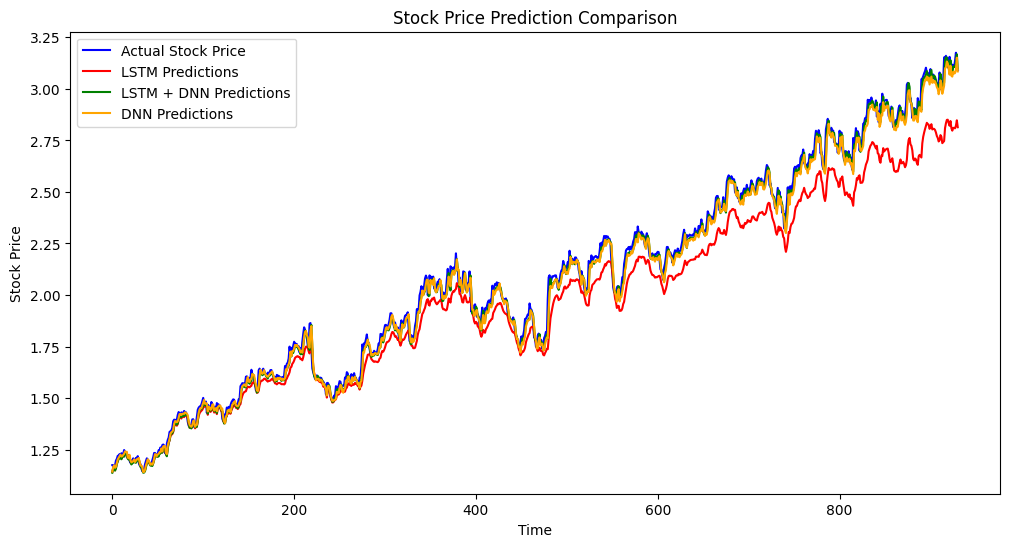

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load data
data = pd.read_csv("s&p500filtered.csv")

# Preprocess data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['RETURN 2'].values.reshape(-1, 1))

# Define look-back period
look_back = 60

# Create dataset
def create_dataset(data, look_back=1):
    X, y = [], []
    for i in range(len(data) - look_back - 1):
        X.append(data[i:(i + look_back), 0])
        y.append(data[i + look_back, 0])
    return np.array(X), np.array(y)

X, y = create_dataset(scaled_data, look_back)

# Split data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Define the LSTM model with multiple output layers
def build_lstm_model(look_back):
    model = Sequential()
    model.add(LSTM(units=50, activation='relu', input_shape=(look_back, 1)))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Train the LSTM model with multiple output layers
lstm_model = build_lstm_model(look_back)
lstm_model.fit(X_train, y_train, epochs=50, batch_size=32)

# Define the LSTM model with single output layer
def build_single_lstm_model(look_back):
    model = Sequential()
    model.add(LSTM(units=50, activation='relu', input_shape=(look_back, 1)))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Train the LSTM model with single output layer
single_lstm_model = build_single_lstm_model(look_back)
single_lstm_model.fit(X_train, y_train, epochs=50, batch_size=32)

# Define the DNN model
def build_dnn_model(look_back):
    model = Sequential()
    model.add(Dense(units=64, activation='relu', input_dim=look_back))
    model.add(Dense(units=32, activation='relu'))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Train the DNN model
dnn_model = build_dnn_model(look_back)
dnn_model.fit(X_train, y_train, epochs=100, batch_size=32)

# Make predictions
lstm_predictions = lstm_model.predict(X_test)
single_lstm_predictions = single_lstm_model.predict(X_test)
dnn_predictions = dnn_model.predict(X_test)

# Inverse scaling for predictions
lstm_predictions = scaler.inverse_transform(lstm_predictions)
single_lstm_predictions = scaler.inverse_transform(single_lstm_predictions)
dnn_predictions = scaler.inverse_transform(dnn_predictions)
actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(actual, color='blue', label='Actual Stock Price')
plt.plot(lstm_predictions, color='red', label='LSTM Predictions')
plt.plot(single_lstm_predictions, color='green', label='LSTM + DNN Predictions')
plt.plot(dnn_predictions, color='orange', label='DNN Predictions')
plt.title('Stock Price Prediction Comparison')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


Epoch 1/50
117/117 [==============================] - 9s 49ms/step - loss: 0.0174
Epoch 2/50
117/117 [==============================] - 5s 44ms/step - loss: 5.8652e-04
Epoch 3/50
117/117 [==============================] - 5s 43ms/step - loss: 4.2962e-04
Epoch 4/50
117/117 [==============================] - 3s 23ms/step - loss: 3.6534e-04
Epoch 5/50
117/117 [==============================] - 3s 22ms/step - loss: 3.3520e-04
Epoch 6/50
117/117 [==============================] - 3s 24ms/step - loss: 3.1816e-04
Epoch 7/50
117/117 [==============================] - 4s 34ms/step - loss: 3.1485e-04
Epoch 8/50
117/117 [==============================] - 3s 22ms/step - loss: 2.8119e-04
Epoch 9/50
117/117 [==============================] - 3s 22ms/step - loss: 2.9004e-04
Epoch 10/50
117/117 [==============================] - 3s 22ms/step - loss: 2.5789e-04
Epoch 11/50
117/117 [==============================] - 3s 27ms/step - loss: 2.6700e-04
Epoch 12/50
117/117 [==============================] - 4

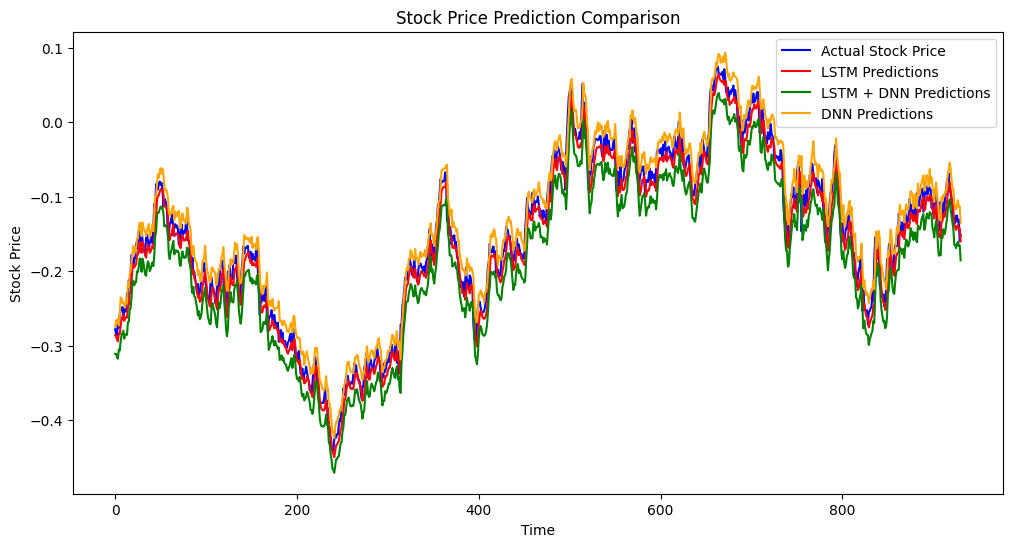

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load data
data = pd.read_csv("s&p500filtered.csv")

# Preprocess data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['RETURN 3'].values.reshape(-1, 1))

# Define look-back period
look_back = 60

# Create dataset
def create_dataset(data, look_back=1):
    X, y = [], []
    for i in range(len(data) - look_back - 1):
        X.append(data[i:(i + look_back), 0])
        y.append(data[i + look_back, 0])
    return np.array(X), np.array(y)

X, y = create_dataset(scaled_data, look_back)

# Split data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Define the LSTM model with multiple output layers
def build_lstm_model(look_back):
    model = Sequential()
    model.add(LSTM(units=50, activation='relu', input_shape=(look_back, 1)))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Train the LSTM model with multiple output layers
lstm_model = build_lstm_model(look_back)
lstm_model.fit(X_train, y_train, epochs=50, batch_size=32)

# Define the LSTM model with single output layer
def build_single_lstm_model(look_back):
    model = Sequential()
    model.add(LSTM(units=50, activation='relu', input_shape=(look_back, 1)))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Train the LSTM model with single output layer
single_lstm_model = build_single_lstm_model(look_back)
single_lstm_model.fit(X_train, y_train, epochs=50, batch_size=32)

# Define the DNN model
def build_dnn_model(look_back):
    model = Sequential()
    model.add(Dense(units=64, activation='relu', input_dim=look_back))
    model.add(Dense(units=32, activation='relu'))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Train the DNN model
dnn_model = build_dnn_model(look_back)
dnn_model.fit(X_train, y_train, epochs=100, batch_size=32)

# Make predictions
lstm_predictions = lstm_model.predict(X_test)
single_lstm_predictions = single_lstm_model.predict(X_test)
dnn_predictions = dnn_model.predict(X_test)

# Inverse scaling for predictions
lstm_predictions = scaler.inverse_transform(lstm_predictions)
single_lstm_predictions = scaler.inverse_transform(single_lstm_predictions)
dnn_predictions = scaler.inverse_transform(dnn_predictions)
actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(actual, color='blue', label='Actual Stock Price')
plt.plot(lstm_predictions, color='red', label='LSTM Predictions')
plt.plot(single_lstm_predictions, color='green', label='LSTM + DNN Predictions')
plt.plot(dnn_predictions, color='orange', label='DNN Predictions')
plt.title('Stock Price Prediction Comparison')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


Epoch 1/50
117/117 [==============================] - 9s 42ms/step - loss: 0.0164
Epoch 2/50
117/117 [==============================] - 4s 38ms/step - loss: 4.8330e-04
Epoch 3/50
117/117 [==============================] - 6s 49ms/step - loss: 3.9796e-04
Epoch 4/50
117/117 [==============================] - 6s 49ms/step - loss: 3.7553e-04
Epoch 5/50
117/117 [==============================] - 5s 40ms/step - loss: 3.5192e-04
Epoch 6/50
117/117 [==============================] - 6s 48ms/step - loss: 3.4152e-04
Epoch 7/50
117/117 [==============================] - 5s 39ms/step - loss: 3.1883e-04
Epoch 8/50
117/117 [==============================] - 5s 43ms/step - loss: 3.0279e-04
Epoch 9/50
117/117 [==============================] - 5s 45ms/step - loss: 2.8606e-04
Epoch 10/50
117/117 [==============================] - 3s 24ms/step - loss: 2.8448e-04
Epoch 11/50
117/117 [==============================] - 3s 22ms/step - loss: 2.8692e-04
Epoch 12/50
117/117 [==============================] - 3

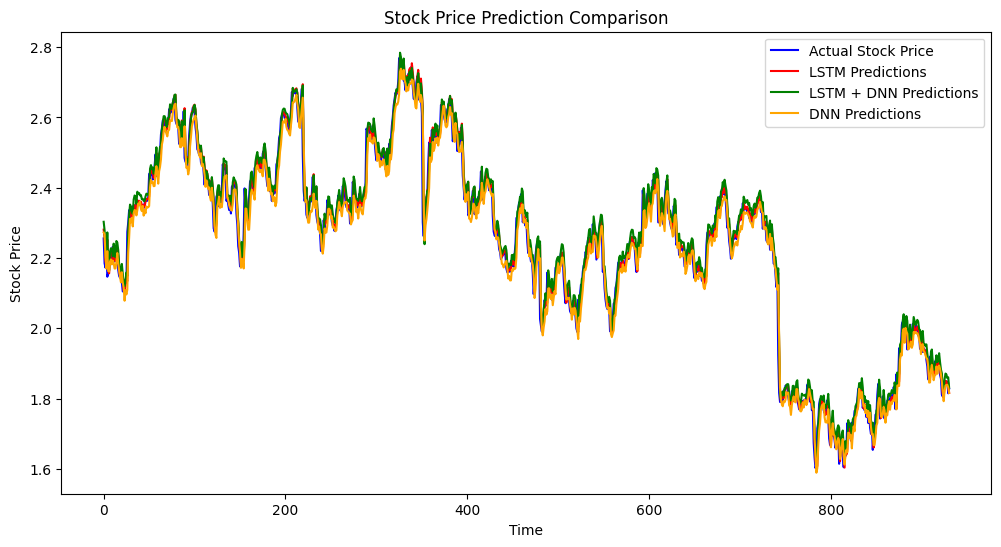

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load data
data = pd.read_csv("s&p500filtered.csv")

# Preprocess data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['REURN 4'].values.reshape(-1, 1))

# Define look-back period
look_back = 60

# Create dataset
def create_dataset(data, look_back=1):
    X, y = [], []
    for i in range(len(data) - look_back - 1):
        X.append(data[i:(i + look_back), 0])
        y.append(data[i + look_back, 0])
    return np.array(X), np.array(y)

X, y = create_dataset(scaled_data, look_back)

# Split data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Define the LSTM model with multiple output layers
def build_lstm_model(look_back):
    model = Sequential()
    model.add(LSTM(units=50, activation='relu', input_shape=(look_back, 1)))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Train the LSTM model with multiple output layers
lstm_model = build_lstm_model(look_back)
lstm_model.fit(X_train, y_train, epochs=50, batch_size=32)

# Define the LSTM model with single output layer
def build_single_lstm_model(look_back):
    model = Sequential()
    model.add(LSTM(units=50, activation='relu', input_shape=(look_back, 1)))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Train the LSTM model with single output layer
single_lstm_model = build_single_lstm_model(look_back)
single_lstm_model.fit(X_train, y_train, epochs=50, batch_size=32)

# Define the DNN model
def build_dnn_model(look_back):
    model = Sequential()
    model.add(Dense(units=64, activation='relu', input_dim=look_back))
    model.add(Dense(units=32, activation='relu'))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Train the DNN model
dnn_model = build_dnn_model(look_back)
dnn_model.fit(X_train, y_train, epochs=100, batch_size=32)

# Make predictions
lstm_predictions = lstm_model.predict(X_test)
single_lstm_predictions = single_lstm_model.predict(X_test)
dnn_predictions = dnn_model.predict(X_test)

# Inverse scaling for predictions
lstm_predictions = scaler.inverse_transform(lstm_predictions)
single_lstm_predictions = scaler.inverse_transform(single_lstm_predictions)
dnn_predictions = scaler.inverse_transform(dnn_predictions)
actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(actual, color='blue', label='Actual Stock Price')
plt.plot(lstm_predictions, color='red', label='LSTM Predictions')
plt.plot(single_lstm_predictions, color='green', label='LSTM + DNN Predictions')
plt.plot(dnn_predictions, color='orange', label='DNN Predictions')
plt.title('Stock Price Prediction Comparison')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


Epoch 1/50
117/117 [==============================] - 4s 22ms/step - loss: 0.0172
Epoch 2/50
117/117 [==============================] - 3s 23ms/step - loss: 2.7383e-04
Epoch 3/50
117/117 [==============================] - 5s 43ms/step - loss: 2.4937e-04
Epoch 4/50
117/117 [==============================] - 3s 28ms/step - loss: 2.4537e-04
Epoch 5/50
117/117 [==============================] - 3s 23ms/step - loss: 2.4667e-04
Epoch 6/50
117/117 [==============================] - 3s 22ms/step - loss: 2.3536e-04
Epoch 7/50
117/117 [==============================] - 3s 29ms/step - loss: 2.1115e-04
Epoch 8/50
117/117 [==============================] - 3s 29ms/step - loss: 2.0591e-04
Epoch 9/50
117/117 [==============================] - 3s 23ms/step - loss: 1.9394e-04
Epoch 10/50
117/117 [==============================] - 3s 23ms/step - loss: 1.9401e-04
Epoch 11/50
117/117 [==============================] - 3s 22ms/step - loss: 1.8072e-04
Epoch 12/50
117/117 [==============================] - 4

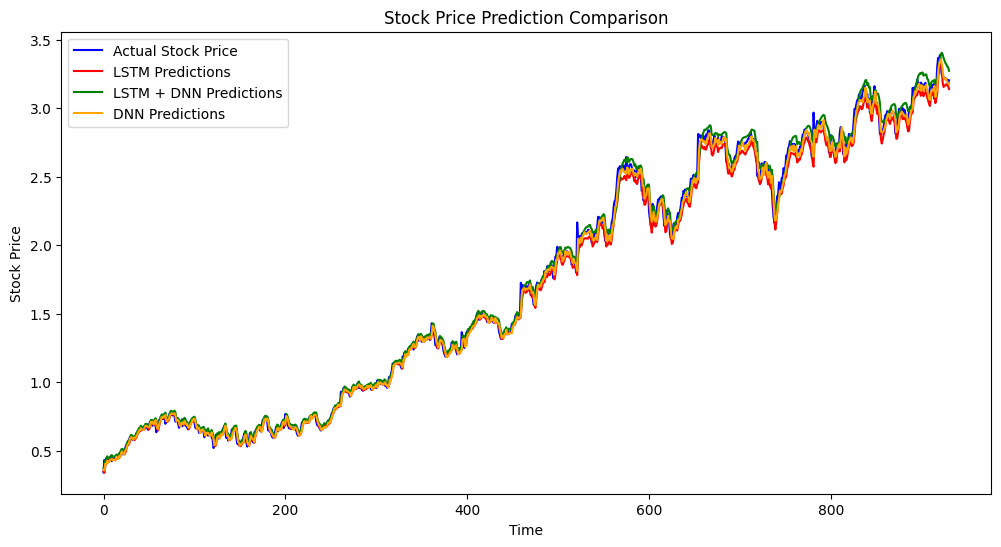

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load data
data = pd.read_csv("s&p500filtered.csv")

# Preprocess data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['RETURN 5'].values.reshape(-1, 1))

# Define look-back period
look_back = 60

# Create dataset
def create_dataset(data, look_back=1):
    X, y = [], []
    for i in range(len(data) - look_back - 1):
        X.append(data[i:(i + look_back), 0])
        y.append(data[i + look_back, 0])
    return np.array(X), np.array(y)

X, y = create_dataset(scaled_data, look_back)

# Split data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Define the LSTM model with multiple output layers
def build_lstm_model(look_back):
    model = Sequential()
    model.add(LSTM(units=50, activation='relu', input_shape=(look_back, 1)))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Train the LSTM model with multiple output layers
lstm_model = build_lstm_model(look_back)
lstm_model.fit(X_train, y_train, epochs=50, batch_size=32)

# Define the LSTM model with single output layer
def build_single_lstm_model(look_back):
    model = Sequential()
    model.add(LSTM(units=50, activation='relu', input_shape=(look_back, 1)))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Train the LSTM model with single output layer
single_lstm_model = build_single_lstm_model(look_back)
single_lstm_model.fit(X_train, y_train, epochs=50, batch_size=32)

# Define the DNN model
def build_dnn_model(look_back):
    model = Sequential()
    model.add(Dense(units=64, activation='relu', input_dim=look_back))
    model.add(Dense(units=32, activation='relu'))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Train the DNN model
dnn_model = build_dnn_model(look_back)
dnn_model.fit(X_train, y_train, epochs=100, batch_size=32)

# Make predictions
lstm_predictions = lstm_model.predict(X_test)
single_lstm_predictions = single_lstm_model.predict(X_test)
dnn_predictions = dnn_model.predict(X_test)

# Inverse scaling for predictions
lstm_predictions = scaler.inverse_transform(lstm_predictions)
single_lstm_predictions = scaler.inverse_transform(single_lstm_predictions)
dnn_predictions = scaler.inverse_transform(dnn_predictions)
actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(actual, color='blue', label='Actual Stock Price')
plt.plot(lstm_predictions, color='red', label='LSTM Predictions')
plt.plot(single_lstm_predictions, color='green', label='LSTM + DNN Predictions')
plt.plot(dnn_predictions, color='orange', label='DNN Predictions')
plt.title('Stock Price Prediction Comparison')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


Epoch 1/50
117/117 [==============================] - 4s 23ms/step - loss: 0.0106
Epoch 2/50
117/117 [==============================] - 4s 35ms/step - loss: 1.6070e-04
Epoch 3/50
117/117 [==============================] - 3s 22ms/step - loss: 1.4729e-04
Epoch 4/50
117/117 [==============================] - 3s 23ms/step - loss: 1.4728e-04
Epoch 5/50
117/117 [==============================] - 3s 22ms/step - loss: 1.3376e-04
Epoch 6/50
117/117 [==============================] - 3s 26ms/step - loss: 1.2860e-04
Epoch 7/50
117/117 [==============================] - 4s 31ms/step - loss: 1.2427e-04
Epoch 8/50
117/117 [==============================] - 3s 22ms/step - loss: 1.2195e-04
Epoch 9/50
117/117 [==============================] - 3s 22ms/step - loss: 1.1387e-04
Epoch 10/50
117/117 [==============================] - 3s 22ms/step - loss: 1.1291e-04
Epoch 11/50
117/117 [==============================] - 3s 30ms/step - loss: 1.0648e-04
Epoch 12/50
117/117 [==============================] - 3

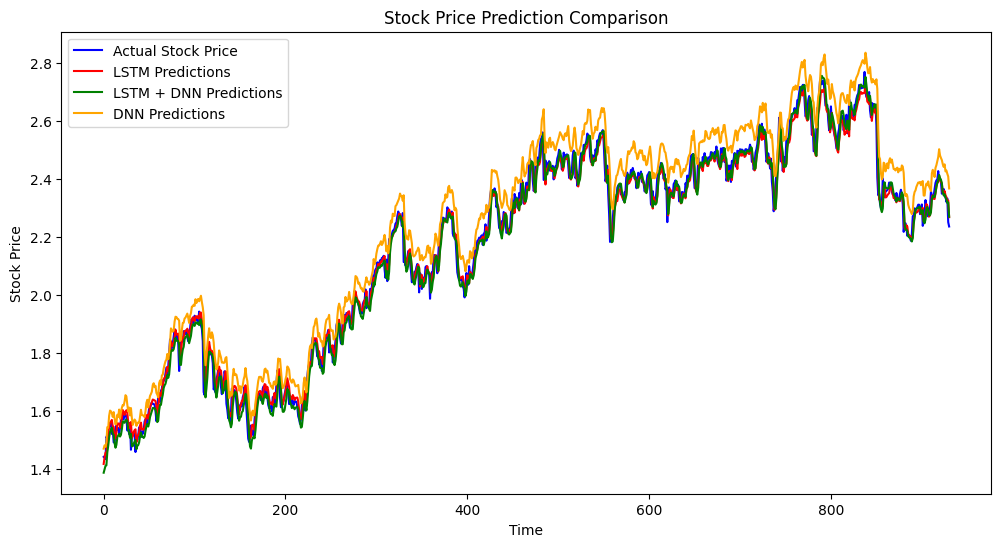

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load data
data = pd.read_csv("s&p500filtered.csv")

# Preprocess data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['RETURN 6'].values.reshape(-1, 1))

# Define look-back period
look_back = 60

# Create dataset
def create_dataset(data, look_back=1):
    X, y = [], []
    for i in range(len(data) - look_back - 1):
        X.append(data[i:(i + look_back), 0])
        y.append(data[i + look_back, 0])
    return np.array(X), np.array(y)

X, y = create_dataset(scaled_data, look_back)

# Split data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Define the LSTM model with multiple output layers
def build_lstm_model(look_back):
    model = Sequential()
    model.add(LSTM(units=50, activation='relu', input_shape=(look_back, 1)))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Train the LSTM model with multiple output layers
lstm_model = build_lstm_model(look_back)
lstm_model.fit(X_train, y_train, epochs=50, batch_size=32)

# Define the LSTM model with single output layer
def build_single_lstm_model(look_back):
    model = Sequential()
    model.add(LSTM(units=50, activation='relu', input_shape=(look_back, 1)))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Train the LSTM model with single output layer
single_lstm_model = build_single_lstm_model(look_back)
single_lstm_model.fit(X_train, y_train, epochs=50, batch_size=32)

# Define the DNN model
def build_dnn_model(look_back):
    model = Sequential()
    model.add(Dense(units=64, activation='relu', input_dim=look_back))
    model.add(Dense(units=32, activation='relu'))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Train the DNN model
dnn_model = build_dnn_model(look_back)
dnn_model.fit(X_train, y_train, epochs=100, batch_size=32)

# Make predictions
lstm_predictions = lstm_model.predict(X_test)
single_lstm_predictions = single_lstm_model.predict(X_test)
dnn_predictions = dnn_model.predict(X_test)

# Inverse scaling for predictions
lstm_predictions = scaler.inverse_transform(lstm_predictions)
single_lstm_predictions = scaler.inverse_transform(single_lstm_predictions)
dnn_predictions = scaler.inverse_transform(dnn_predictions)
actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(actual, color='blue', label='Actual Stock Price')
plt.plot(lstm_predictions, color='red', label='LSTM Predictions')
plt.plot(single_lstm_predictions, color='green', label='LSTM + DNN Predictions')
plt.plot(dnn_predictions, color='orange', label='DNN Predictions')
plt.title('Stock Price Prediction Comparison')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


Epoch 1/50
117/117 [==============================] - 19s 106ms/step - loss: 0.0034
Epoch 2/50
117/117 [==============================] - 9s 77ms/step - loss: 2.2985e-04
Epoch 3/50
117/117 [==============================] - 9s 80ms/step - loss: 2.2414e-04
Epoch 4/50
117/117 [==============================] - 8s 65ms/step - loss: 2.0791e-04
Epoch 5/50
117/117 [==============================] - 9s 78ms/step - loss: 1.9406e-04
Epoch 6/50
117/117 [==============================] - 9s 77ms/step - loss: 1.9675e-04
Epoch 7/50
117/117 [==============================] - 8s 68ms/step - loss: 1.9141e-04
Epoch 8/50
117/117 [==============================] - 9s 79ms/step - loss: 1.8758e-04
Epoch 9/50
117/117 [==============================] - 8s 69ms/step - loss: 1.7358e-04
Epoch 10/50
117/117 [==============================] - 9s 79ms/step - loss: 1.7051e-04
Epoch 11/50
117/117 [==============================] - 9s 80ms/step - loss: 1.6864e-04
Epoch 12/50
117/117 [==============================] -

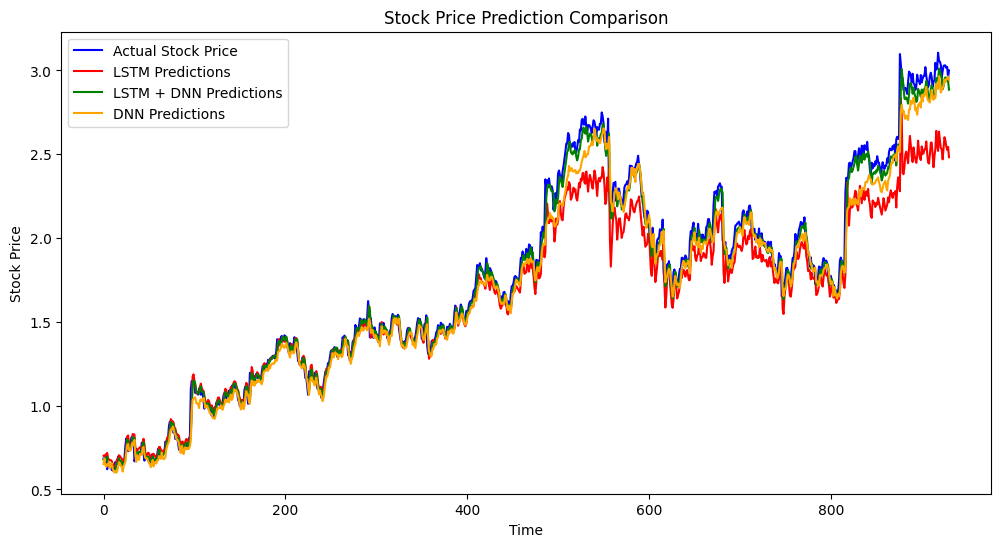

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load data
data = pd.read_csv("s&p500filtered.csv")

# Preprocess data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['RETURN 1'].values.reshape(-1, 1))

# Define look-back period
look_back = 60

# Create dataset
def create_dataset(data, look_back=1):
    X, y = [], []
    for i in range(len(data) - look_back - 1):
        X.append(data[i:(i + look_back), 0])
        y.append(data[i + look_back, 0])
    return np.array(X), np.array(y)

X, y = create_dataset(scaled_data, look_back)

# Split data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Define the LSTM model with multiple output layers
def build_lstm_model(look_back):
    model = Sequential()
    model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(look_back, 1)))
    model.add(LSTM(units=50, activation='relu', return_sequences=True))  # Second LSTM layer returns sequences
    model.add(LSTM(units=1, activation=None))  # LSTM output layer directly
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Train the LSTM model with multiple output layers
lstm_model = build_lstm_model(look_back)
lstm_model.fit(X_train, y_train, epochs=50, batch_size=32)

# Define the LSTM model with single output layer
def build_single_lstm_model(look_back):
    model = Sequential()
    model.add(LSTM(units=50, activation='relu', input_shape=(look_back, 1)))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Train the LSTM model with single output layer
single_lstm_model = build_single_lstm_model(look_back)
single_lstm_model.fit(X_train, y_train, epochs=50, batch_size=32)

# Define the DNN model
def build_dnn_model(look_back):
    model = Sequential()
    model.add(Dense(units=64, activation='relu', input_dim=look_back))
    model.add(Dense(units=32, activation='relu'))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Train the DNN model
dnn_model = build_dnn_model(look_back)
dnn_model.fit(X_train, y_train, epochs=100, batch_size=32)

# Make predictions
lstm_predictions = lstm_model.predict(X_test)
single_lstm_predictions = single_lstm_model.predict(X_test)
dnn_predictions = dnn_model.predict(X_test)

# Inverse scaling for predictions
lstm_predictions = scaler.inverse_transform(lstm_predictions)
single_lstm_predictions = scaler.inverse_transform(single_lstm_predictions)
dnn_predictions = scaler.inverse_transform(dnn_predictions)
actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(actual, color='blue', label='Actual Stock Price')
plt.plot(lstm_predictions, color='red', label='LSTM Predictions')
plt.plot(single_lstm_predictions, color='green', label='LSTM + DNN Predictions')
plt.plot(dnn_predictions, color='orange', label='DNN Predictions')
plt.title('Stock Price Prediction Comparison')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


Epoch 1/50
117/117 [==============================] - 22s 105ms/step - loss: 0.0064
Epoch 2/50
117/117 [==============================] - 9s 78ms/step - loss: 5.0858e-04
Epoch 3/50
117/117 [==============================] - 8s 65ms/step - loss: 4.6165e-04
Epoch 4/50
117/117 [==============================] - 9s 78ms/step - loss: 4.0751e-04
Epoch 5/50
117/117 [==============================] - 9s 73ms/step - loss: 3.8434e-04
Epoch 6/50
117/117 [==============================] - 8s 69ms/step - loss: 3.6676e-04
Epoch 7/50
117/117 [==============================] - 9s 80ms/step - loss: 3.3025e-04
Epoch 8/50
117/117 [==============================] - 8s 68ms/step - loss: 3.0912e-04
Epoch 9/50
117/117 [==============================] - 9s 77ms/step - loss: 2.9481e-04
Epoch 10/50
117/117 [==============================] - 9s 80ms/step - loss: 2.6179e-04
Epoch 11/50
117/117 [==============================] - 8s 66ms/step - loss: 2.6232e-04
Epoch 12/50
117/117 [==============================] -

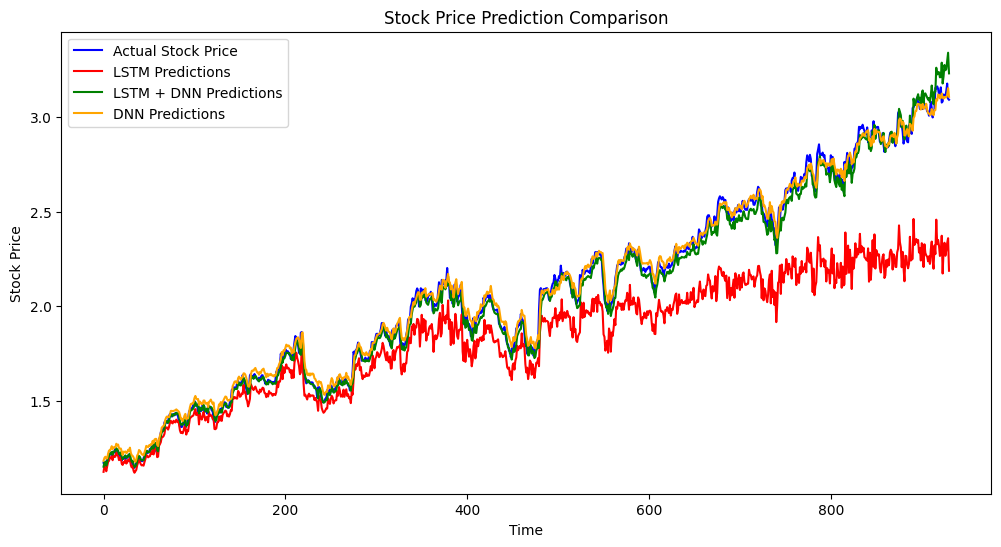

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load data
data = pd.read_csv("s&p500filtered.csv")

# Preprocess data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['RETURN 2'].values.reshape(-1, 1))

# Define look-back period
look_back = 60

# Create dataset
def create_dataset(data, look_back=1):
    X, y = [], []
    for i in range(len(data) - look_back - 1):
        X.append(data[i:(i + look_back), 0])
        y.append(data[i + look_back, 0])
    return np.array(X), np.array(y)

X, y = create_dataset(scaled_data, look_back)

# Split data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Define the LSTM model with multiple output layers
def build_lstm_model(look_back):
    model = Sequential()
    model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(look_back, 1)))
    model.add(LSTM(units=50, activation='relu', return_sequences=True))  # Second LSTM layer returns sequences
    model.add(LSTM(units=1, activation=None))  # LSTM output layer directly
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Train the LSTM model with multiple output layers
lstm_model = build_lstm_model(look_back)
lstm_model.fit(X_train, y_train, epochs=50, batch_size=32)

# Define the LSTM model with single output layer
def build_single_lstm_model(look_back):
    model = Sequential()
    model.add(LSTM(units=50, activation='relu', input_shape=(look_back, 1)))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Train the LSTM model with single output layer
single_lstm_model = build_single_lstm_model(look_back)
single_lstm_model.fit(X_train, y_train, epochs=50, batch_size=32)

# Define the DNN model
def build_dnn_model(look_back):
    model = Sequential()
    model.add(Dense(units=64, activation='relu', input_dim=look_back))
    model.add(Dense(units=32, activation='relu'))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Train the DNN model
dnn_model = build_dnn_model(look_back)
dnn_model.fit(X_train, y_train, epochs=100, batch_size=32)

# Make predictions
lstm_predictions = lstm_model.predict(X_test)
single_lstm_predictions = single_lstm_model.predict(X_test)
dnn_predictions = dnn_model.predict(X_test)

# Inverse scaling for predictions
lstm_predictions = scaler.inverse_transform(lstm_predictions)
single_lstm_predictions = scaler.inverse_transform(single_lstm_predictions)
dnn_predictions = scaler.inverse_transform(dnn_predictions)
actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(actual, color='blue', label='Actual Stock Price')
plt.plot(lstm_predictions, color='red', label='LSTM Predictions')
plt.plot(single_lstm_predictions, color='green', label='LSTM + DNN Predictions')
plt.plot(dnn_predictions, color='orange', label='DNN Predictions')
plt.title('Stock Price Prediction Comparison')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


Epoch 1/50
117/117 [==============================] - 22s 129ms/step - loss: 0.0093
Epoch 2/50
117/117 [==============================] - 9s 76ms/step - loss: 9.6299e-04
Epoch 3/50
117/117 [==============================] - 8s 67ms/step - loss: 7.6842e-04
Epoch 4/50
117/117 [==============================] - 9s 78ms/step - loss: 6.6545e-04
Epoch 5/50
117/117 [==============================] - 8s 70ms/step - loss: 6.1780e-04
Epoch 6/50
117/117 [==============================] - 9s 74ms/step - loss: 5.2125e-04
Epoch 7/50
117/117 [==============================] - 9s 79ms/step - loss: 5.1412e-04
Epoch 8/50
117/117 [==============================] - 8s 66ms/step - loss: 4.7668e-04
Epoch 9/50
117/117 [==============================] - 9s 80ms/step - loss: 5.4370e-04
Epoch 10/50
117/117 [==============================] - 9s 79ms/step - loss: 3.8382e-04
Epoch 11/50
117/117 [==============================] - 8s 66ms/step - loss: 3.7032e-04
Epoch 12/50
117/117 [==============================] -

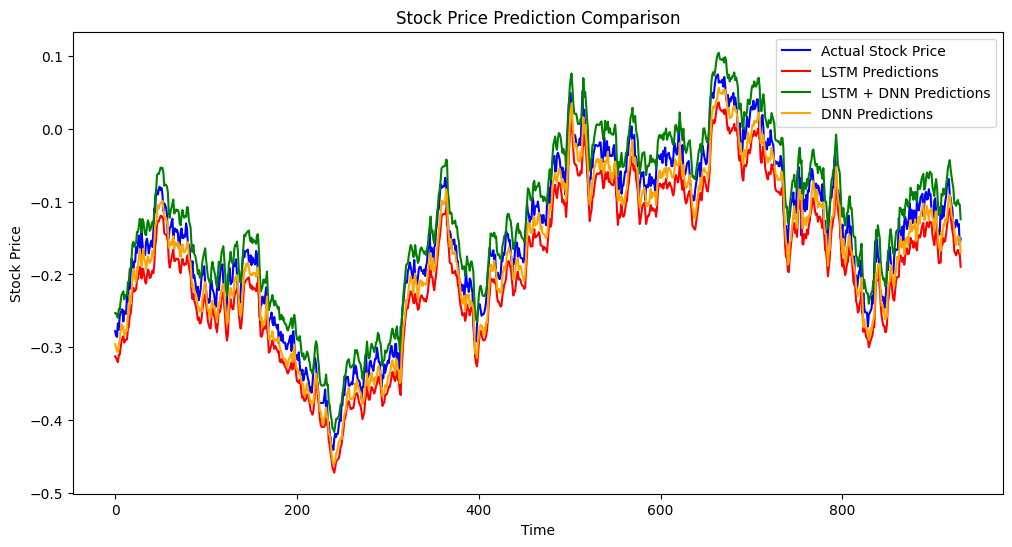

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load data
data = pd.read_csv("s&p500filtered.csv")

# Preprocess data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['RETURN 3'].values.reshape(-1, 1))

# Define look-back period
look_back = 60

# Create dataset
def create_dataset(data, look_back=1):
    X, y = [], []
    for i in range(len(data) - look_back - 1):
        X.append(data[i:(i + look_back), 0])
        y.append(data[i + look_back, 0])
    return np.array(X), np.array(y)

X, y = create_dataset(scaled_data, look_back)

# Split data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Define the LSTM model with multiple output layers
def build_lstm_model(look_back):
    model = Sequential()
    model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(look_back, 1)))
    model.add(LSTM(units=50, activation='relu', return_sequences=True))  # Second LSTM layer returns sequences
    model.add(LSTM(units=1, activation=None))  # LSTM output layer directly
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Train the LSTM model with multiple output layers
lstm_model = build_lstm_model(look_back)
lstm_model.fit(X_train, y_train, epochs=50, batch_size=32)

# Define the LSTM model with single output layer
def build_single_lstm_model(look_back):
    model = Sequential()
    model.add(LSTM(units=50, activation='relu', input_shape=(look_back, 1)))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Train the LSTM model with single output layer
single_lstm_model = build_single_lstm_model(look_back)
single_lstm_model.fit(X_train, y_train, epochs=50, batch_size=32)

# Define the DNN model
def build_dnn_model(look_back):
    model = Sequential()
    model.add(Dense(units=64, activation='relu', input_dim=look_back))
    model.add(Dense(units=32, activation='relu'))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Train the DNN model
dnn_model = build_dnn_model(look_back)
dnn_model.fit(X_train, y_train, epochs=100, batch_size=32)

# Make predictions
lstm_predictions = lstm_model.predict(X_test)
single_lstm_predictions = single_lstm_model.predict(X_test)
dnn_predictions = dnn_model.predict(X_test)

# Inverse scaling for predictions
lstm_predictions = scaler.inverse_transform(lstm_predictions)
single_lstm_predictions = scaler.inverse_transform(single_lstm_predictions)
dnn_predictions = scaler.inverse_transform(dnn_predictions)
actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(actual, color='blue', label='Actual Stock Price')
plt.plot(lstm_predictions, color='red', label='LSTM Predictions')
plt.plot(single_lstm_predictions, color='green', label='LSTM + DNN Predictions')
plt.plot(dnn_predictions, color='orange', label='DNN Predictions')
plt.title('Stock Price Prediction Comparison')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


Epoch 1/50
117/117 [==============================] - 20s 117ms/step - loss: 0.0186
Epoch 2/50
117/117 [==============================] - 9s 79ms/step - loss: 0.0010
Epoch 3/50
117/117 [==============================] - 8s 67ms/step - loss: 8.7722e-04
Epoch 4/50
117/117 [==============================] - 9s 77ms/step - loss: 7.3463e-04
Epoch 5/50
117/117 [==============================] - 9s 79ms/step - loss: 6.1950e-04
Epoch 6/50
117/117 [==============================] - 8s 65ms/step - loss: 5.6013e-04
Epoch 7/50
117/117 [==============================] - 9s 78ms/step - loss: 5.2739e-04
Epoch 8/50
117/117 [==============================] - 9s 79ms/step - loss: 4.7006e-04
Epoch 9/50
117/117 [==============================] - 8s 66ms/step - loss: 4.6125e-04
Epoch 10/50
117/117 [==============================] - 9s 79ms/step - loss: 4.5242e-04
Epoch 11/50
117/117 [==============================] - 9s 78ms/step - loss: 4.1915e-04
Epoch 12/50
117/117 [==============================] - 8s 

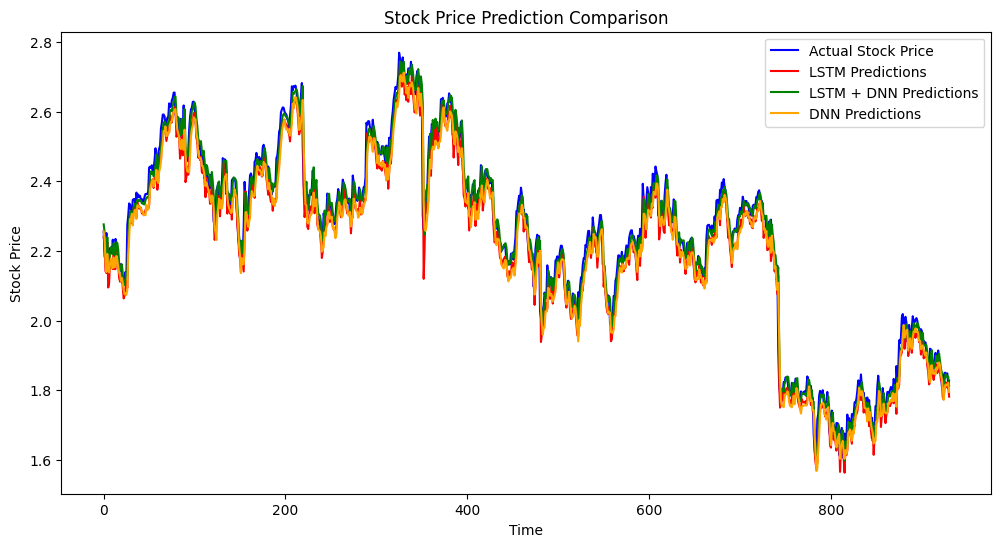

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load data
data = pd.read_csv("s&p500filtered.csv")

# Preprocess data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['REURN 4'].values.reshape(-1, 1))

# Define look-back period
look_back = 60

# Create dataset
def create_dataset(data, look_back=1):
    X, y = [], []
    for i in range(len(data) - look_back - 1):
        X.append(data[i:(i + look_back), 0])
        y.append(data[i + look_back, 0])
    return np.array(X), np.array(y)

X, y = create_dataset(scaled_data, look_back)

# Split data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Define the LSTM model with multiple output layers
def build_lstm_model(look_back):
    model = Sequential()
    model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(look_back, 1)))
    model.add(LSTM(units=50, activation='relu', return_sequences=True))  # Second LSTM layer returns sequences
    model.add(LSTM(units=1, activation=None))  # LSTM output layer directly
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Train the LSTM model with multiple output layers
lstm_model = build_lstm_model(look_back)
lstm_model.fit(X_train, y_train, epochs=50, batch_size=32)

# Define the LSTM model with single output layer
def build_single_lstm_model(look_back):
    model = Sequential()
    model.add(LSTM(units=50, activation='relu', input_shape=(look_back, 1)))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Train the LSTM model with single output layer
single_lstm_model = build_single_lstm_model(look_back)
single_lstm_model.fit(X_train, y_train, epochs=50, batch_size=32)

# Define the DNN model
def build_dnn_model(look_back):
    model = Sequential()
    model.add(Dense(units=64, activation='relu', input_dim=look_back))
    model.add(Dense(units=32, activation='relu'))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Train the DNN model
dnn_model = build_dnn_model(look_back)
dnn_model.fit(X_train, y_train, epochs=100, batch_size=32)

# Make predictions
lstm_predictions = lstm_model.predict(X_test)
single_lstm_predictions = single_lstm_model.predict(X_test)
dnn_predictions = dnn_model.predict(X_test)

# Inverse scaling for predictions
lstm_predictions = scaler.inverse_transform(lstm_predictions)
single_lstm_predictions = scaler.inverse_transform(single_lstm_predictions)
dnn_predictions = scaler.inverse_transform(dnn_predictions)
actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(actual, color='blue', label='Actual Stock Price')
plt.plot(lstm_predictions, color='red', label='LSTM Predictions')
plt.plot(single_lstm_predictions, color='green', label='LSTM + DNN Predictions')
plt.plot(dnn_predictions, color='orange', label='DNN Predictions')
plt.title('Stock Price Prediction Comparison')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


Epoch 1/50
117/117 [==============================] - 21s 110ms/step - loss: 0.0097
Epoch 2/50
117/117 [==============================] - 8s 66ms/step - loss: 5.7288e-04
Epoch 3/50
117/117 [==============================] - 9s 79ms/step - loss: 5.1685e-04
Epoch 4/50
117/117 [==============================] - 11s 94ms/step - loss: 4.9992e-04
Epoch 5/50
117/117 [==============================] - 8s 68ms/step - loss: 4.4239e-04
Epoch 6/50
117/117 [==============================] - 9s 79ms/step - loss: 4.0528e-04
Epoch 7/50
117/117 [==============================] - 9s 79ms/step - loss: 3.6510e-04
Epoch 8/50
117/117 [==============================] - 8s 67ms/step - loss: 3.3298e-04
Epoch 9/50
117/117 [==============================] - 9s 79ms/step - loss: 3.2349e-04
Epoch 10/50
117/117 [==============================] - 9s 78ms/step - loss: 2.8883e-04
Epoch 11/50
117/117 [==============================] - 8s 65ms/step - loss: 2.8950e-04
Epoch 12/50
117/117 [==============================] 

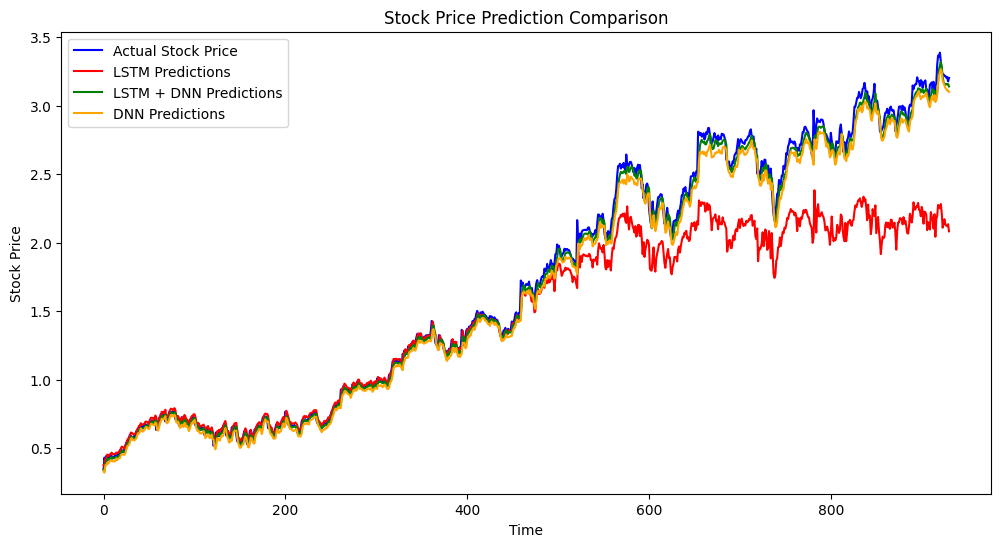

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load data
data = pd.read_csv("s&p500filtered.csv")

# Preprocess data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['RETURN 5'].values.reshape(-1, 1))

# Define look-back period
look_back = 60

# Create dataset
def create_dataset(data, look_back=1):
    X, y = [], []
    for i in range(len(data) - look_back - 1):
        X.append(data[i:(i + look_back), 0])
        y.append(data[i + look_back, 0])
    return np.array(X), np.array(y)

X, y = create_dataset(scaled_data, look_back)

# Split data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Define the LSTM model with multiple output layers
def build_lstm_model(look_back):
    model = Sequential()
    model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(look_back, 1)))
    model.add(LSTM(units=50, activation='relu', return_sequences=True))  # Second LSTM layer returns sequences
    model.add(LSTM(units=1, activation=None))  # LSTM output layer directly
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Train the LSTM model with multiple output layers
lstm_model = build_lstm_model(look_back)
lstm_model.fit(X_train, y_train, epochs=50, batch_size=32)

# Define the LSTM model with single output layer
def build_single_lstm_model(look_back):
    model = Sequential()
    model.add(LSTM(units=50, activation='relu', input_shape=(look_back, 1)))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Train the LSTM model with single output layer
single_lstm_model = build_single_lstm_model(look_back)
single_lstm_model.fit(X_train, y_train, epochs=50, batch_size=32)

# Define the DNN model
def build_dnn_model(look_back):
    model = Sequential()
    model.add(Dense(units=64, activation='relu', input_dim=look_back))
    model.add(Dense(units=32, activation='relu'))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Train the DNN model
dnn_model = build_dnn_model(look_back)
dnn_model.fit(X_train, y_train, epochs=100, batch_size=32)

# Make predictions
lstm_predictions = lstm_model.predict(X_test)
single_lstm_predictions = single_lstm_model.predict(X_test)
dnn_predictions = dnn_model.predict(X_test)

# Inverse scaling for predictions
lstm_predictions = scaler.inverse_transform(lstm_predictions)
single_lstm_predictions = scaler.inverse_transform(single_lstm_predictions)
dnn_predictions = scaler.inverse_transform(dnn_predictions)
actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(actual, color='blue', label='Actual Stock Price')
plt.plot(lstm_predictions, color='red', label='LSTM Predictions')
plt.plot(single_lstm_predictions, color='green', label='LSTM + DNN Predictions')
plt.plot(dnn_predictions, color='orange', label='DNN Predictions')
plt.title('Stock Price Prediction Comparison')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


Epoch 1/50
117/117 [==============================] - 19s 107ms/step - loss: 0.0050
Epoch 2/50
117/117 [==============================] - 9s 78ms/step - loss: 3.1277e-04
Epoch 3/50
117/117 [==============================] - 9s 79ms/step - loss: 3.1498e-04
Epoch 4/50
117/117 [==============================] - 8s 66ms/step - loss: 2.7833e-04
Epoch 5/50
117/117 [==============================] - 9s 79ms/step - loss: 2.6049e-04
Epoch 6/50
117/117 [==============================] - 9s 81ms/step - loss: 2.4361e-04
Epoch 7/50
117/117 [==============================] - 8s 66ms/step - loss: 2.6008e-04
Epoch 8/50
117/117 [==============================] - 9s 78ms/step - loss: 2.3133e-04
Epoch 9/50
117/117 [==============================] - 9s 73ms/step - loss: 2.2844e-04
Epoch 10/50
117/117 [==============================] - 8s 72ms/step - loss: 2.2876e-04
Epoch 11/50
117/117 [==============================] - 9s 79ms/step - loss: 2.2329e-04
Epoch 12/50
117/117 [==============================] -

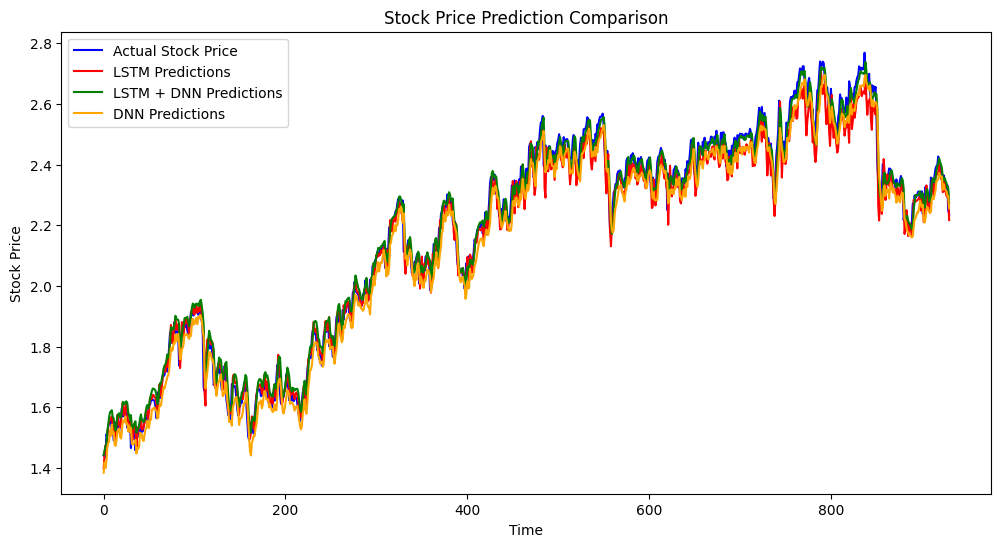

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load data
data = pd.read_csv("s&p500filtered.csv")

# Preprocess data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['RETURN 6'].values.reshape(-1, 1))

# Define look-back period
look_back = 60

# Create dataset
def create_dataset(data, look_back=1):
    X, y = [], []
    for i in range(len(data) - look_back - 1):
        X.append(data[i:(i + look_back), 0])
        y.append(data[i + look_back, 0])
    return np.array(X), np.array(y)

X, y = create_dataset(scaled_data, look_back)

# Split data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Define the LSTM model with multiple output layers
def build_lstm_model(look_back):
    model = Sequential()
    model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(look_back, 1)))
    model.add(LSTM(units=50, activation='relu', return_sequences=True))  # Second LSTM layer returns sequences
    model.add(LSTM(units=1, activation=None))  # LSTM output layer directly
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Train the LSTM model with multiple output layers
lstm_model = build_lstm_model(look_back)
lstm_model.fit(X_train, y_train, epochs=50, batch_size=32)

# Define the LSTM model with single output layer
def build_single_lstm_model(look_back):
    model = Sequential()
    model.add(LSTM(units=50, activation='relu', input_shape=(look_back, 1)))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Train the LSTM model with single output layer
single_lstm_model = build_single_lstm_model(look_back)
single_lstm_model.fit(X_train, y_train, epochs=50, batch_size=32)

# Define the DNN model
def build_dnn_model(look_back):
    model = Sequential()
    model.add(Dense(units=64, activation='relu', input_dim=look_back))
    model.add(Dense(units=32, activation='relu'))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Train the DNN model
dnn_model = build_dnn_model(look_back)
dnn_model.fit(X_train, y_train, epochs=100, batch_size=32)

# Make predictions
lstm_predictions = lstm_model.predict(X_test)
single_lstm_predictions = single_lstm_model.predict(X_test)
dnn_predictions = dnn_model.predict(X_test)

# Inverse scaling for predictions
lstm_predictions = scaler.inverse_transform(lstm_predictions)
single_lstm_predictions = scaler.inverse_transform(single_lstm_predictions)
dnn_predictions = scaler.inverse_transform(dnn_predictions)
actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(actual, color='blue', label='Actual Stock Price')
plt.plot(lstm_predictions, color='red', label='LSTM Predictions')
plt.plot(single_lstm_predictions, color='green', label='LSTM + DNN Predictions')
plt.plot(dnn_predictions, color='orange', label='DNN Predictions')
plt.title('Stock Price Prediction Comparison')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


Epoch 1/50
117/117 [==============================] - 23s 118ms/step - loss: 0.0090
Epoch 2/50
117/117 [==============================] - 8s 65ms/step - loss: 5.3252e-04
Epoch 3/50
117/117 [==============================] - 9s 79ms/step - loss: 4.7799e-04
Epoch 4/50
117/117 [==============================] - 9s 80ms/step - loss: 4.1065e-04
Epoch 5/50
117/117 [==============================] - 8s 66ms/step - loss: 3.6562e-04
Epoch 6/50
117/117 [==============================] - 9s 77ms/step - loss: 3.2650e-04
Epoch 7/50
117/117 [==============================] - 9s 75ms/step - loss: 2.8983e-04
Epoch 8/50
117/117 [==============================] - 8s 71ms/step - loss: 2.7986e-04
Epoch 9/50
117/117 [==============================] - 9s 80ms/step - loss: 2.5296e-04
Epoch 10/50
117/117 [==============================] - 8s 67ms/step - loss: 2.5994e-04
Epoch 11/50
117/117 [==============================] - 10s 82ms/step - loss: 2.3499e-04
Epoch 12/50
117/117 [==============================] 

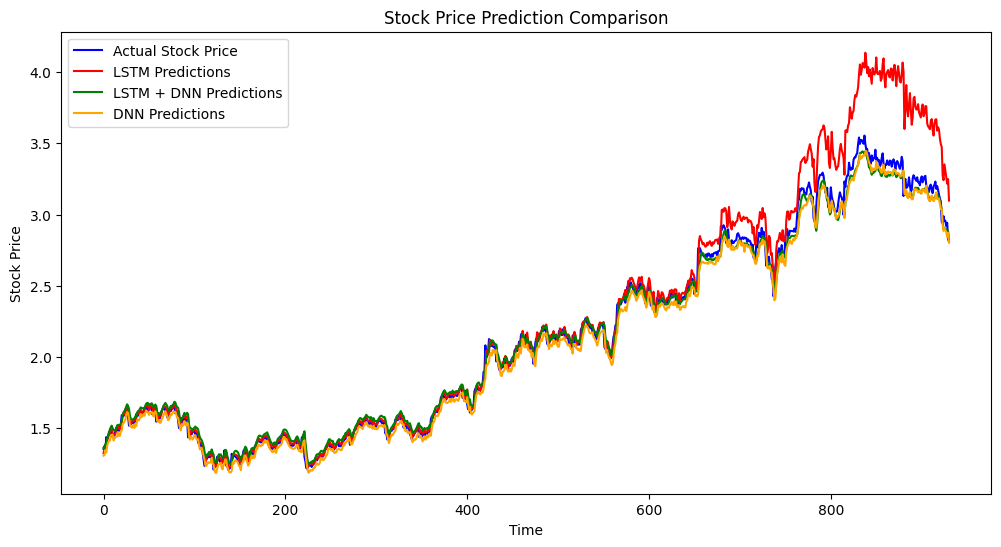

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load data
data = pd.read_csv("s&p500filtered.csv")

# Preprocess data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['RETURN 7'].values.reshape(-1, 1))

# Define look-back period
look_back = 60

# Create dataset
def create_dataset(data, look_back=1):
    X, y = [], []
    for i in range(len(data) - look_back - 1):
        X.append(data[i:(i + look_back), 0])
        y.append(data[i + look_back, 0])
    return np.array(X), np.array(y)

X, y = create_dataset(scaled_data, look_back)

# Split data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Define the LSTM model with multiple output layers
def build_lstm_model(look_back):
    model = Sequential()
    model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(look_back, 1)))
    model.add(LSTM(units=50, activation='relu', return_sequences=True))  # Second LSTM layer returns sequences
    model.add(LSTM(units=1, activation=None))  # LSTM output layer directly
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Train the LSTM model with multiple output layers
lstm_model = build_lstm_model(look_back)
lstm_model.fit(X_train, y_train, epochs=50, batch_size=32)

# Define the LSTM model with single output layer
def build_single_lstm_model(look_back):
    model = Sequential()
    model.add(LSTM(units=50, activation='relu', input_shape=(look_back, 1)))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Train the LSTM model with single output layer
single_lstm_model = build_single_lstm_model(look_back)
single_lstm_model.fit(X_train, y_train, epochs=50, batch_size=32)

# Define the DNN model
def build_dnn_model(look_back):
    model = Sequential()
    model.add(Dense(units=64, activation='relu', input_dim=look_back))
    model.add(Dense(units=32, activation='relu'))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Train the DNN model
dnn_model = build_dnn_model(look_back)
dnn_model.fit(X_train, y_train, epochs=100, batch_size=32)

# Make predictions
lstm_predictions = lstm_model.predict(X_test)
single_lstm_predictions = single_lstm_model.predict(X_test)
dnn_predictions = dnn_model.predict(X_test)

# Inverse scaling for predictions
lstm_predictions = scaler.inverse_transform(lstm_predictions)
single_lstm_predictions = scaler.inverse_transform(single_lstm_predictions)
dnn_predictions = scaler.inverse_transform(dnn_predictions)
actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(actual, color='blue', label='Actual Stock Price')
plt.plot(lstm_predictions, color='red', label='LSTM Predictions')
plt.plot(single_lstm_predictions, color='green', label='LSTM + DNN Predictions')
plt.plot(dnn_predictions, color='orange', label='DNN Predictions')
plt.title('Stock Price Prediction Comparison')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


Epoch 1/50
117/117 [==============================] - 25s 144ms/step - loss: 0.0266
Epoch 2/50
117/117 [==============================] - 14s 118ms/step - loss: 0.0013
Epoch 3/50
117/117 [==============================] - 9s 77ms/step - loss: 0.0012
Epoch 4/50
117/117 [==============================] - 8s 66ms/step - loss: 0.0011
Epoch 5/50
117/117 [==============================] - 9s 79ms/step - loss: 8.8976e-04
Epoch 6/50
117/117 [==============================] - 8s 69ms/step - loss: 8.3169e-04
Epoch 7/50
117/117 [==============================] - 9s 75ms/step - loss: 7.5025e-04
Epoch 8/50
117/117 [==============================] - 9s 79ms/step - loss: 6.7505e-04
Epoch 9/50
117/117 [==============================] - 8s 66ms/step - loss: 6.2866e-04
Epoch 10/50
117/117 [==============================] - 9s 78ms/step - loss: 5.6522e-04
Epoch 11/50
117/117 [==============================] - 9s 79ms/step - loss: 5.6636e-04
Epoch 12/50
117/117 [==============================] - 8s 70ms/s

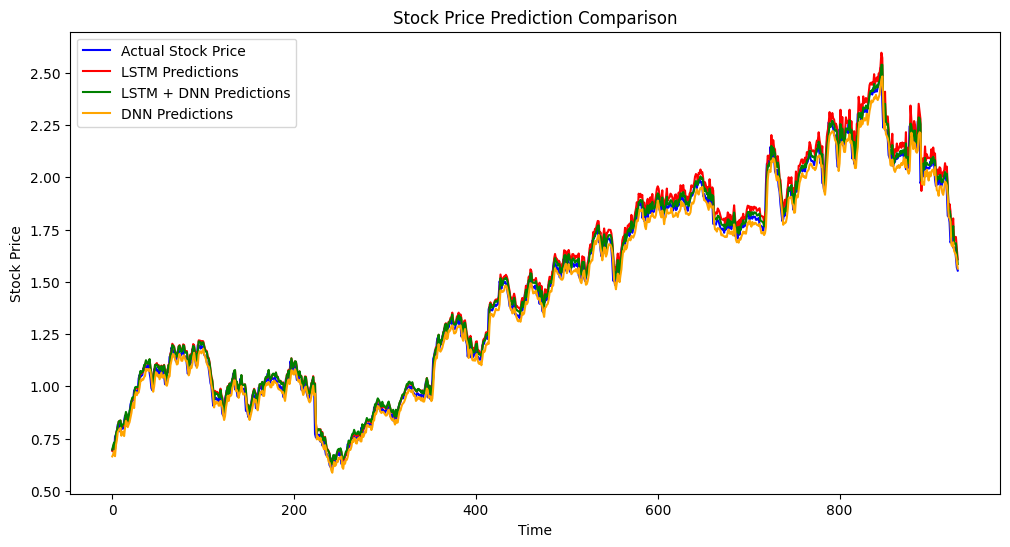

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load data
data = pd.read_csv("s&p500filtered.csv")

# Preprocess data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['RETURN 8'].values.reshape(-1, 1))

# Define look-back period
look_back = 60

# Create dataset
def create_dataset(data, look_back=1):
    X, y = [], []
    for i in range(len(data) - look_back - 1):
        X.append(data[i:(i + look_back), 0])
        y.append(data[i + look_back, 0])
    return np.array(X), np.array(y)

X, y = create_dataset(scaled_data, look_back)

# Split data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Define the LSTM model with multiple output layers
def build_lstm_model(look_back):
    model = Sequential()
    model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(look_back, 1)))
    model.add(LSTM(units=50, activation='relu', return_sequences=True))  # Second LSTM layer returns sequences
    model.add(LSTM(units=1, activation=None))  # LSTM output layer directly
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Train the LSTM model with multiple output layers
lstm_model = build_lstm_model(look_back)
lstm_model.fit(X_train, y_train, epochs=50, batch_size=32)

# Define the LSTM model with single output layer
def build_single_lstm_model(look_back):
    model = Sequential()
    model.add(LSTM(units=50, activation='relu', input_shape=(look_back, 1)))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Train the LSTM model with single output layer
single_lstm_model = build_single_lstm_model(look_back)
single_lstm_model.fit(X_train, y_train, epochs=50, batch_size=32)

# Define the DNN model
def build_dnn_model(look_back):
    model = Sequential()
    model.add(Dense(units=64, activation='relu', input_dim=look_back))
    model.add(Dense(units=32, activation='relu'))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Train the DNN model
dnn_model = build_dnn_model(look_back)
dnn_model.fit(X_train, y_train, epochs=100, batch_size=32)

# Make predictions
lstm_predictions = lstm_model.predict(X_test)
single_lstm_predictions = single_lstm_model.predict(X_test)
dnn_predictions = dnn_model.predict(X_test)

# Inverse scaling for predictions
lstm_predictions = scaler.inverse_transform(lstm_predictions)
single_lstm_predictions = scaler.inverse_transform(single_lstm_predictions)
dnn_predictions = scaler.inverse_transform(dnn_predictions)
actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(actual, color='blue', label='Actual Stock Price')
plt.plot(lstm_predictions, color='red', label='LSTM Predictions')
plt.plot(single_lstm_predictions, color='green', label='LSTM + DNN Predictions')
plt.plot(dnn_predictions, color='orange', label='DNN Predictions')
plt.title('Stock Price Prediction Comparison')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


Epoch 1/50
117/117 [==============================] - 13s 78ms/step - loss: 0.0140
Epoch 2/50
117/117 [==============================] - 8s 66ms/step - loss: 6.7050e-04
Epoch 3/50
117/117 [==============================] - 9s 80ms/step - loss: 6.4073e-04
Epoch 4/50
117/117 [==============================] - 9s 78ms/step - loss: 6.1527e-04
Epoch 5/50
117/117 [==============================] - 8s 67ms/step - loss: 5.7643e-04
Epoch 6/50
117/117 [==============================] - 9s 79ms/step - loss: 5.3056e-04
Epoch 7/50
117/117 [==============================] - 8s 70ms/step - loss: 5.1001e-04
Epoch 8/50
117/117 [==============================] - 9s 75ms/step - loss: 4.9754e-04
Epoch 9/50
117/117 [==============================] - 9s 78ms/step - loss: 4.4910e-04
Epoch 10/50
117/117 [==============================] - 8s 66ms/step - loss: 4.4244e-04
Epoch 11/50
117/117 [==============================] - 9s 79ms/step - loss: 3.9052e-04
Epoch 12/50
117/117 [==============================] - 

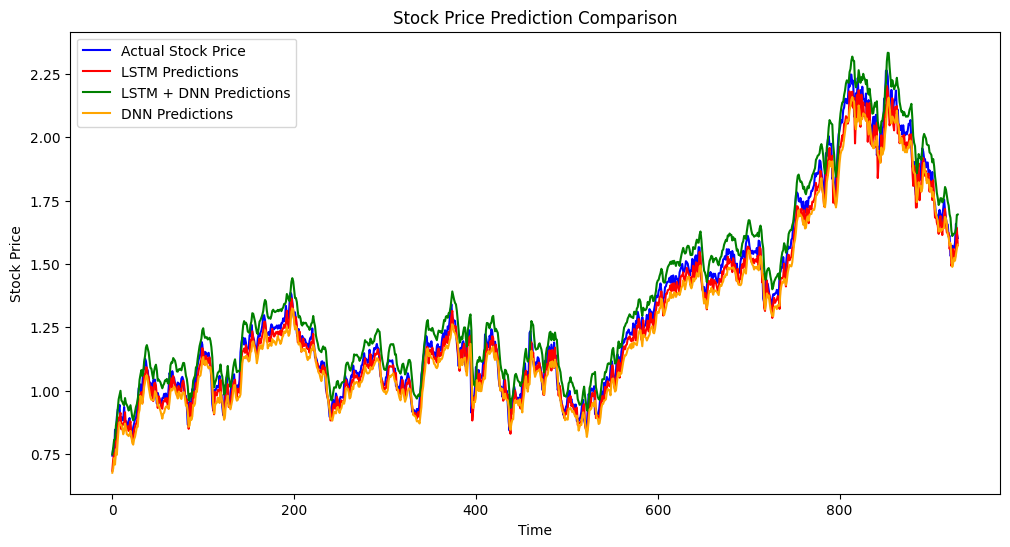

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load data
data = pd.read_csv("s&p500filtered.csv")

# Preprocess data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['RETURN 9'].values.reshape(-1, 1))

# Define look-back period
look_back = 60

# Create dataset
def create_dataset(data, look_back=1):
    X, y = [], []
    for i in range(len(data) - look_back - 1):
        X.append(data[i:(i + look_back), 0])
        y.append(data[i + look_back, 0])
    return np.array(X), np.array(y)

X, y = create_dataset(scaled_data, look_back)

# Split data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Define the LSTM model with multiple output layers
def build_lstm_model(look_back):
    model = Sequential()
    model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(look_back, 1)))
    model.add(LSTM(units=50, activation='relu', return_sequences=True))  # Second LSTM layer returns sequences
    model.add(LSTM(units=1, activation=None))  # LSTM output layer directly
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Train the LSTM model with multiple output layers
lstm_model = build_lstm_model(look_back)
lstm_model.fit(X_train, y_train, epochs=50, batch_size=32)

# Define the LSTM model with single output layer
def build_single_lstm_model(look_back):
    model = Sequential()
    model.add(LSTM(units=50, activation='relu', input_shape=(look_back, 1)))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Train the LSTM model with single output layer
single_lstm_model = build_single_lstm_model(look_back)
single_lstm_model.fit(X_train, y_train, epochs=50, batch_size=32)

# Define the DNN model
def build_dnn_model(look_back):
    model = Sequential()
    model.add(Dense(units=64, activation='relu', input_dim=look_back))
    model.add(Dense(units=32, activation='relu'))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Train the DNN model
dnn_model = build_dnn_model(look_back)
dnn_model.fit(X_train, y_train, epochs=100, batch_size=32)

# Make predictions
lstm_predictions = lstm_model.predict(X_test)
single_lstm_predictions = single_lstm_model.predict(X_test)
dnn_predictions = dnn_model.predict(X_test)

# Inverse scaling for predictions
lstm_predictions = scaler.inverse_transform(lstm_predictions)
single_lstm_predictions = scaler.inverse_transform(single_lstm_predictions)
dnn_predictions = scaler.inverse_transform(dnn_predictions)
actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(actual, color='blue', label='Actual Stock Price')
plt.plot(lstm_predictions, color='red', label='LSTM Predictions')
plt.plot(single_lstm_predictions, color='green', label='LSTM + DNN Predictions')
plt.plot(dnn_predictions, color='orange', label='DNN Predictions')
plt.title('Stock Price Prediction Comparison')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
